<h1>ML HW2</h1>
<h2>students:</h2>
Guy Yehezkel 313551608<br>
Aviv Lugasi 207941261

<h1>Table of content</h1>
<br>
<ol>
<li><a href="#Data">Data</a></li>
<li><a href="#libraries">Libraries</a></li>
<li><a href="#VisualizationExploration">Section A - Data Exploration and Visualization</a></li>
    <ol>
        <li><a href="#ExplorationSales">Sales Dataset Exploration</a><br></li>
        <li><a href="#ExplorationKey">Key Dataset Exploration</a><br></li>
        <li><a href="#ExplorationWeather">Weather Dataset Exploration</a></li>
    </ol>
<li><a href="#PreProcessing">Section B - PreProcessing</a></li>
    <ol>
        <li><a href="#codesumencod">One hot encoding for codesum</a><br></li>
        <li><a href="#merging">Merging sales_df and weatherdf</a><br></li>
        <li><a href="#exclusion">Exclusion</a></li>
        <li><a href="#seperating">Seperating to sections C,D,E datasets</a></li>
        <li><a href="#sectionc">Section C pre processing</a></li>
        <li><a href="#sectiond">Section D pre processing</a></li>
        <li><a href="#sectione">Section E pre processing</a></li>
        <li><a href="#exploring">More exploring</a></li>
    </ol>
<li><a href="#sectioncpredicting">Section C - Unit Sales Prediction</a></li>
    <ol>
        <li><a href="#modelspredicting">Checking different ML models</a><br></li>
        <li><a href="#comparing">Comparing models results</a></li>
        <li><a href="#summary">Models performances Summary</a></li>
        <li><a href="#featuresimportancerun">Running the 2 best models again with selecting features based on importance</a></li>
    </ol>
<li><a href="#sectiondpredicting">Section D - Rainy Day Prediction</a></li>
     <ol>
        <li><a href="#classifymodelspredicting">Checking different ML models</a><br></li>
        <li><a href="#classifysummary">Models performances Summary</a></li>
    </ol>
<li><a href="#sectionetask">Section E - Elevation Estimation</a></li>
    <ol>
        <li><a href="#formula">Barometric formula</a><br></li>
        <li><a href="#IOMformula">Inches of Mercury to Pascals formula</a></li>
        <li><a href="#consts">Consts</a></li>
        <li><a href="#calcelevation">Elevation calculating</a></li>
        <li><a href="#visualizeresult">Visualize result</a></li>
    </ol>
<li><a href="#sectionFtask">Section F - Clustering the weather stations</a></li>
    <ol>
        <li><a href="#pca">PCA</a><br></li>
        <li><a href="#clustersmodels">Checking different Clustering models</a></li>
        <li><a href="#clusterssummary">Summary</a></li>
    </ol>
</ol>

<h2 id="Data">Data</h2>

<p>
Sales data (sales.csv) for 111 products (such as milk, bread, umbrellas, etc.) whose sales may be affected by the weather .<br>
These 111 products are sold in stores at 45 different Walmart locations.<br>
Some of the products may be a similar item (such as milk) but have a different id in different stores/regions/suppliers.<br>
The 45 stores are covered by 20 weather stations (i.e., some of the stores are nearby and share a weather station).<br>
The key data (key.csv) indicates for each store to which weather station it belongs.<br>
In addition, we have been provided with the weather data (weather.csv) of each weather station.<br>
The sales and weather data are daily observations, from January 2012 to October 2014.<br>

Training = observations from the years 2012-2013.<br>
Test = observations from the year 2014.<br>
</p>


<h2 id="libraries">Libraries</h2>
<p>Importing libraries for data visualizetion and exploretion, pre-processing,<br>
prediction and evaluation
</p>

In [1]:
import warnings

import numpy

warnings.filterwarnings('ignore')


# 2 - data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 3 - pre-processing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


# 4 - prediction

# model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


# model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score

# random forest
from sklearn.ensemble import RandomForestClassifier
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier


# decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# random forest
from sklearn.ensemble import  RandomForestRegressor

# model building
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import metrics as met
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# model building
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation
from sklearn.metrics import accuracy_score, mean_squared_error

#for log's calculations
import math

from math import e
import random
import time
import warnings
warnings.filterwarnings("ignore")

# seed
RSEED = 10

#print float number with 6 digit after the decimal point
pd.set_option('display.float_format', lambda x: '%.6f' % x)

<h2 id ="VisualizationExploration">Section A (Data Exploration and Visualization)</h2>

In [2]:
# import dataset
sales_df = pd.read_csv('sales.csv')
weather_df = pd.read_csv('weather.csv')
key_df = pd.read_csv('key.csv')

<h3 id ="ExplorationSales">Exploring sales_df Dataset</h3>

In [3]:
# look at 5 random observations
sales_df.head()

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [4]:
# data shape (rows, columns)
sales_df.shape

(4617600, 4)

In [5]:
# variables data types
sales_df.dtypes

date         object
store_nbr     int64
item_nbr      int64
units         int64
dtype: object

<p>The data contains 4 features (1 datetime, 2 categorial, and 1 numeric)<br>
there are 4617600 rows.
</p>

In [6]:
# missing values by variable
sales_df.isnull().sum()

date         0
store_nbr    0
item_nbr     0
units        0
dtype: int64

<p>
There are 0 missing values.
</p>

In [7]:
# Change store_nbr data and item_nbr type to category and date to date
sales_df['store_nbr'] = sales_df['store_nbr'].astype('category')
sales_df['item_nbr'] = sales_df['item_nbr'].astype('category')
sales_df['date'] = pd.to_datetime(sales_df['date'])

In [8]:
sales_df.dtypes

date         datetime64[ns]
store_nbr          category
item_nbr           category
units                 int64
dtype: object

In [9]:
# A look at the statistics of the feature "units" (label) of the dataset
sales_df['units'].describe()

count   4617600.000000
mean          0.986876
std           9.875798
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        5568.000000
Name: units, dtype: float64

<p>As we see most unit sales are 0 .<br>
Let's see the statistics of sales greater then 0.
</p>

In [10]:
# We see that the "units" value of the most samples in the dataset is 0, so we would also like to look at the statistics of
# all observations whose "unit" value (label) is greater than zero.
sales_df.loc[sales_df['units'] >0]['units'].describe()

count   118696.000000
mean        38.392170
std         48.561169
min          1.000000
25%          4.000000
50%         24.000000
75%         56.000000
max       5568.000000
Name: units, dtype: float64

[Text(0.5, 1.0, 'histplot of sales units 2012-2014')]

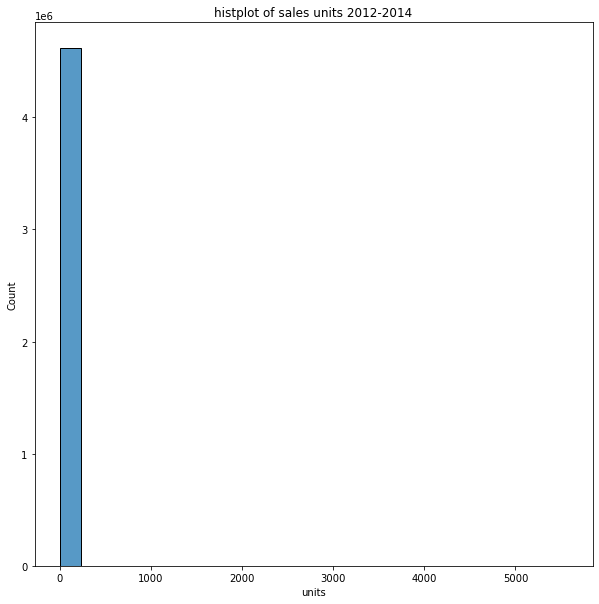

In [11]:
plt.figure(figsize=(10, 10))
sns.histplot(data=sales_df, x="units").set(title='histplot of sales units 2012-2014')

<p>As we can see the max value is very far from the 75% sample therefor<br>
there might be some outliers or maybe the feature is very skewed.<br>
We will create a histogram to find out
</p>

[Text(0.5, 1.0, 'histplot of sales units 2012-2014, units greater then 0')]

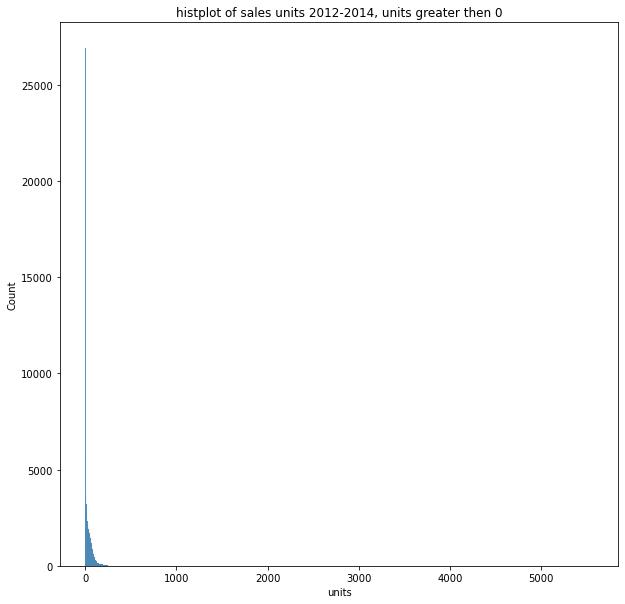

In [12]:
#Let us now look at the distribution of the value "units" using a histogram. As we have shown, the "units" value of the multivariate is 0,
# so in order to obtain insights into the data, we chose to present the distribution only of the samples whose "unit value" is greater than 0.
plt.figure(figsize=(10, 10))
sns.histplot(data=sales_df.loc[sales_df['units'] >0], x="units").set(title='histplot of sales units 2012-2014, units greater then 0')

<p>As we can see the data is very positive skewed.<br>
Lets see how much units sales samples are greater then 75% percentile (56)</p>

In [13]:
sales_df[sales_df['units'] > 56]

,date,store_nbr,item_nbr,units
115,2012-01-01,2,5,191
154,2012-01-01,2,44,215
226,2012-01-01,3,5,214
266,2012-01-01,3,45,112
341,2012-01-01,4,9,61
...,...,...,...,...
4615277,2014-10-31,25,9,103
4615867,2014-10-31,30,44,69
4616165,2014-10-31,33,9,73
4616200,2014-10-31,33,44,264


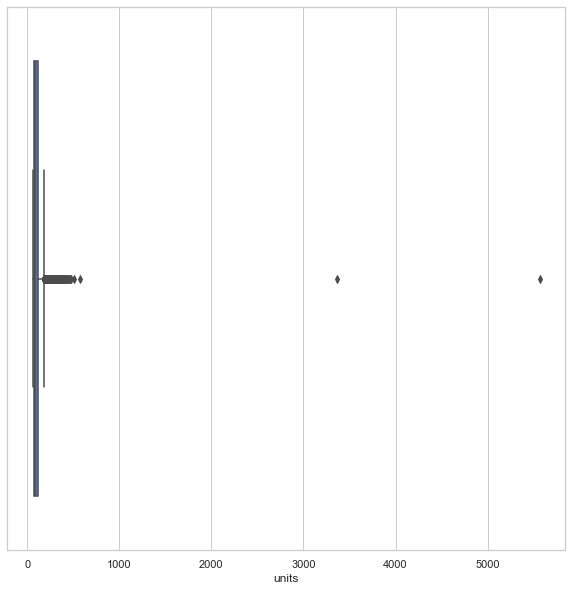

In [14]:
# To deal with outliers, we will need to find them.
# Let's look at the data in the box plot.
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=sales_df[sales_df['units'] > 56]['units'])

Tthe distribution is positive skewed. However, most of the samples that are greater than 75% are not outliers.
However, the "units" value of all samples is on a scale between 0 and 1000, except for 2 samples.
These two are the outliers (that are greater than 1000).

<p id="outliers">lets see the outliers</p>

In [15]:
sales_df[sales_df['units'] > 1000]

,date,store_nbr,item_nbr,units
1580533,2012-11-15,37,5,5568
3190033,2013-11-21,37,5,3369


As we can see both outliers samples belong to the same store and the same item.<br>
The two observations are very close in terms of month and day of the month and were taken in subsequent years.<br>
For better visualization and models Performance lets change the units values<br>
to the median of the samples that are greater than 0.
 <a href="#outliersdatesreaserch">we will check the weather at those dates in the relevant station later</a><br>
 to see if there were any anomalies that may caused to those high sales.

In [16]:
sales_df.loc[1580533,'units'] = 24
sales_df.loc[3190033,'units'] = 24

lets see again the distribution of the sales greater than 0

[Text(0.5, 1.0, 'histplot of sales units 2012-2014')]

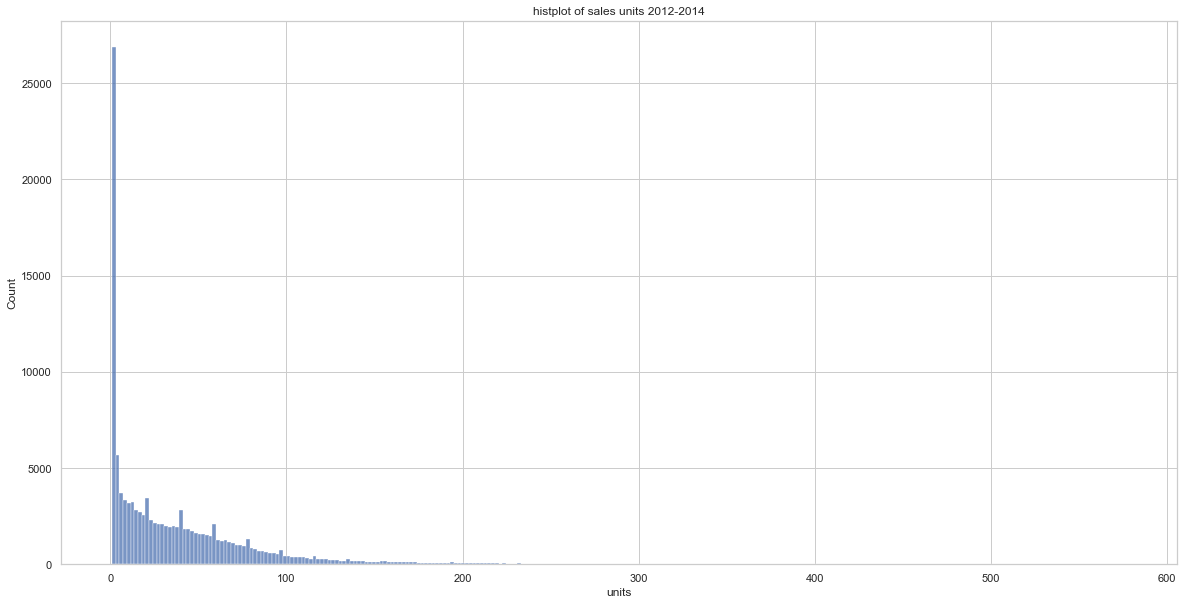

In [17]:
plt.figure(figsize=(20, 10))
sns.histplot(data=sales_df.loc[sales_df['units'] >0], x="units").set(title='histplot of sales units 2012-2014')

As wee can see there are many samples that their units sales is close to 0, in order<br>
to see more easily the much greater once's lets see those which are greater then the 25% (4)

[Text(0.5, 1.0, 'histplot of sales units 2012-2014')]

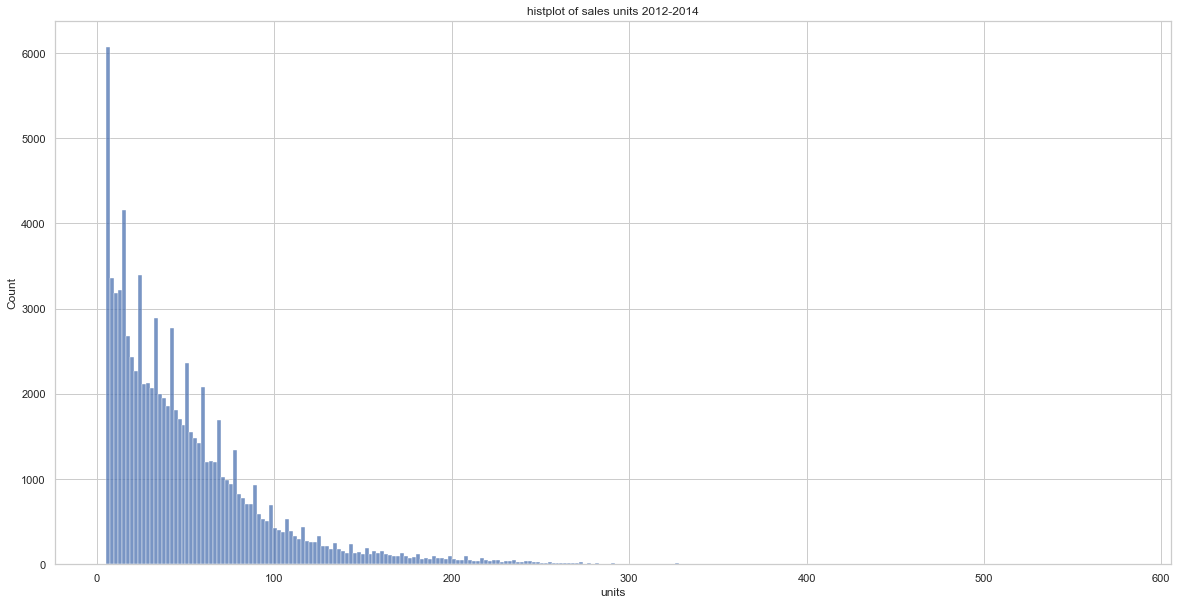

In [18]:
plt.figure(figsize=(20, 10))
sns.histplot(data=sales_df.loc[sales_df['units'] >4], x="units").set(title='histplot of sales units 2012-2014')

<p>As we can see the data is very positive skewed.<br></p>

Lets check at what store each item is sold

In [19]:
#Checking in how many stores each item is being sold
groupby_item_nbr =  sales_df.groupby(['item_nbr'])
item_storecount = dict()
for key,item in groupby_item_nbr:
    units_sales_per_item = groupby_item_nbr.get_group(key)
    store_num = len((np.unique(units_sales_per_item['store_nbr'])))
    item_storecount[key] = store_num

In [20]:
num_of_stores_item_is_sold_df = pd.DataFrame.from_dict(item_storecount, orient='index')
num_of_stores_item_is_sold_df = num_of_stores_item_is_sold_df.rename(columns={0: 'store count'}, index={'': 'item_nbr'})

In [21]:
num_of_stores_item_is_sold_df

,store count
1,45
2,45
3,45
4,45
5,45
...,...
107,45
108,45
109,45
110,45


In [22]:
np.unique(num_of_stores_item_is_sold_df['store count'])

array([45], dtype=int64)

As you can see each of the products is sold in each of the stores

<h3>Sales of products in the Walmart stores by months in the years 2012-2014</h3>

In [23]:
#This function get dataset as input and returb a dataset of units sales per month
def return_sales_per_year_for_month(df):
    sales = df
    sales['month'] = pd.DatetimeIndex(df['date']).month
    sales = sales.groupby(['month'])
    sales_month_count =  dict()

    for key,item in sales:
        a_group = sales.get_group(key)
        units_num = a_group['units'].sum()
        sales_month_count[key] = units_num

    data = {'month': sales_month_count.keys(), 'units': sales_month_count.values()}
    df = pd.DataFrame.from_dict(data)
    return df

<h4>Sales of products in the Walmart stores by months in 2012</h4>


In [24]:
split_date = pd.datetime(2013,1,1)
df_sales_2012 = sales_df.loc[sales_df['date'] < split_date] # All samples from 2012
df_sales_2012 = return_sales_per_year_for_month(df_sales_2012) # Data frame that describe for each month how many key_sum units were sold
df_sales_2012['year'] = 2012

Now let's have a look on maximun and minimun key_sum units sales per month in 2012

In [25]:
print(df_sales_2012['units'].min())
print(df_sales_2012['units'].max())

153246
183746


<h4>Sales of products in the Walmart stores by months in 2013</h4>

In [26]:
split_date_start = pd.datetime(2013,1,1)
split_date_end = pd.datetime(2014,1,1)
df_sales_2013 = sales_df.loc[sales_df['date'] >= split_date_start]
df_sales_2013 = df_sales_2013.loc[df_sales_2013['date'] < split_date_end]
df_sales_2013 = return_sales_per_year_for_month(df_sales_2013)
df_sales_2013['year'] = 2013

Now let's have a look on maximun and minimun key_sum units sales per month in 2013

In [27]:
print(df_sales_2013['units'].min())
print(df_sales_2013['units'].max())

107368
167990


<h4>Sales of products in the Walmart stores by months in 2014</h4>

In [28]:
split_date = pd.datetime(2014,1,1)
df_sales_2014 = sales_df.loc[sales_df['date'] >= split_date]
df_sales_2014 = return_sales_per_year_for_month(df_sales_2014)
df_sales_2014['year'] = 2014

Now let's have a look on maximun and minimun key_sum units sales per month in 2014


In [29]:
print(df_sales_2014['units'].min())
print(df_sales_2014['units'].max())

85593
132311


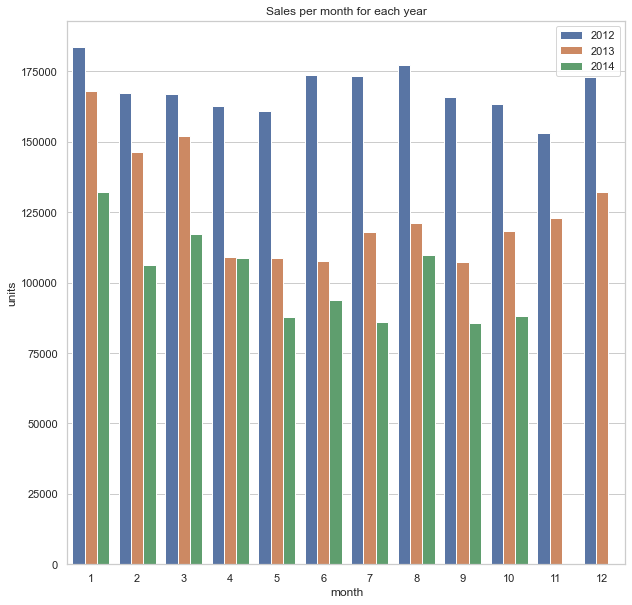

In [30]:
plt.figure(figsize=(10, 10))
sales = pd.concat([df_sales_2012,df_sales_2013,df_sales_2014])
sales_plot = sns.barplot(x="month", y="units", hue="year", data=sales).set(title='Sales per month for each year')
plt.legend(loc='upper right')

<p>As we can see the sales distribution through the months in 2012 is more or less the same:<br>
January is the month with the max sales and May is the month with the least amount of sales</p>

<p>We can see the sales through the months in 2013 are the greatest at the beginnig of the year<br>
then there is a downfall at the middle, and then an a rise at the end of it.<br>
January is the month with the max sales and June is the month with the least amount of sales.</p>

<p>We can also see there is deacrese in the sales trough the years (with minor rises), still janueary is the month with<br>
the largest sales and July is the one with the least sales.<br>
Finally, we can also see that we have no records of sales after october 2014<br></p>


<h4>Sales per day</h4>
<p>
Now, we will try to investigate the effect of dates on sales.<br>
We will first explore the impact of a day of the month on sales.<br>
We will then look at the relationship between day a week and sales.<br>
</p>

In [31]:
#adding month ,day in week,  day num in year and day num in month columns
connect_days_in_months_sales_df = sales_df.copy(deep=True)
connect_days_in_months_sales_df['month'] = pd.DatetimeIndex(sales_df['date']).month
connect_days_in_months_sales_df['day_in_week'] =sales_df['date'].dt.weekday
connect_days_in_months_sales_df['daynum_in_year'] =sales_df['date'].dt.dayofyear
connect_days_in_months_sales_df['daynum_in_month'] =sales_df['date'].dt.strftime("%d")
connect_days_in_months_sales_df

,date,store_nbr,item_nbr,units,month,day_in_week,daynum_in_year,daynum_in_month
0,2012-01-01,1,1,0,1,6,1,01
1,2012-01-01,1,2,0,1,6,1,01
2,2012-01-01,1,3,0,1,6,1,01
3,2012-01-01,1,4,0,1,6,1,01
4,2012-01-01,1,5,0,1,6,1,01
...,...,...,...,...,...,...,...,...
4617595,2014-10-31,45,107,0,10,4,304,31
4617596,2014-10-31,45,108,0,10,4,304,31
4617597,2014-10-31,45,109,0,10,4,304,31
4617598,2014-10-31,45,110,0,10,4,304,31


In [32]:
#this function return sales per day at the month
def return_sales_per_day_in_month(df):
    sales = df
    sales = sales.groupby(['daynum_in_month'])
    sales_month_count =  dict()

    for key,item in sales:
        a_group = sales.get_group(key)
        units_num = a_group['units'].sum()
        sales_month_count[key] = units_num

    data = {'day_month': sales_month_count.keys(), 'units': sales_month_count.values()}
    df = pd.DataFrame.from_dict(data)
    return df

Sales days in month 2012

In [33]:
split_date = pd.datetime(2013,1,1)
df_sales_day_month_2012 = connect_days_in_months_sales_df.loc[connect_days_in_months_sales_df['date'] < split_date]
df_sales_day_month_2012 = return_sales_per_day_in_month(df_sales_day_month_2012)
df_sales_day_month_2012['year'] = 2012

Now let's have a look on maximun and minimun units sales per day in month in 2012

In [34]:
print(df_sales_day_month_2012['units'].min())
print(df_sales_day_month_2012['units'].max())

31649
86396


Sales days in week 2013

In [35]:
split_date_start = pd.datetime(2013,1,1)
split_date_end = pd.datetime(2014,1,1)
df_sales_day_month_2013 = connect_days_in_months_sales_df.loc[connect_days_in_months_sales_df['date'] >= split_date_start]
df_sales_day_month_2013 = df_sales_day_month_2013.loc[df_sales_day_month_2013['date'] < split_date_end]
df_sales_day_month_2013 = return_sales_per_day_in_month(df_sales_day_month_2013)
df_sales_day_month_2013['year'] = 2013

Now let's have a look on maximun and minimun units sales per day in month in 2013

In [36]:
print(df_sales_day_month_2013['units'].min())
print(df_sales_day_month_2013['units'].max())

22727
64630


Sales days in month 2014

In [37]:
split_date = pd.datetime(2014,1,1)
df_sales_day_month_2014 = connect_days_in_months_sales_df.loc[connect_days_in_months_sales_df['date'] >= split_date]
df_sales_day_month_2014 = return_sales_per_day_in_month(df_sales_day_month_2014)
df_sales_day_month_2014['year'] = 2014

Now let's have a look on maximun and minimun units sales per day in month in 2014

In [38]:
print(df_sales_day_month_2014['units'].min())
print(df_sales_day_month_2014['units'].max())

17250
43649


<h4>Sales of products in the Walmart stores by day at months across the years</h4>

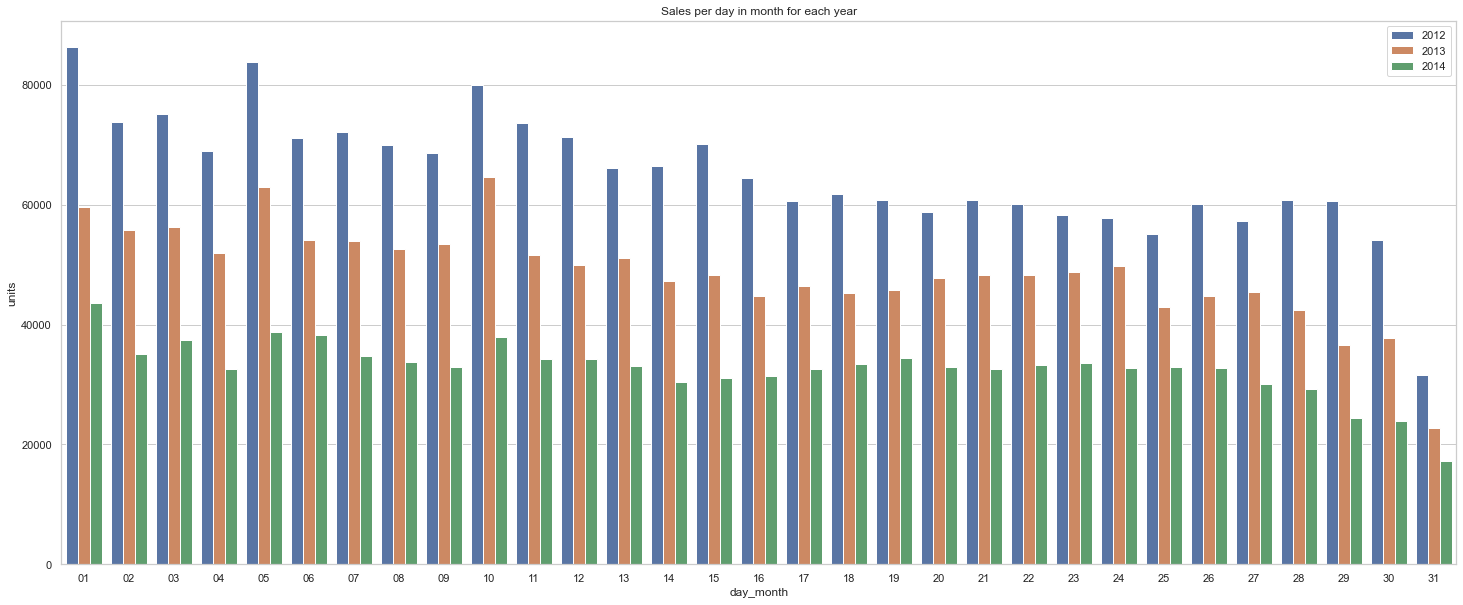

In [39]:
plt.figure(figsize=(25, 10))
sales = pd.concat([df_sales_day_month_2012,df_sales_day_month_2013,df_sales_day_month_2014])
sales_plot = sns.barplot(x="day_month", y="units", hue="year", data=sales).set(title='Sales per day in month for each year')
plt.legend(loc='upper right')

We examine the sales along the days in a month in each year.
As we can see the highest sales are at the beginning of month, and that the sales at the end are drastically lower for each year.
The decline in sales between the first five days of the month and the last five days of the month is estimated at about 51% on average.
Then there are some peeks at the 1th, 5th and the 10th days of the month, also for each year.
We assume that the reason for that peeks is that these days are the days which the salary come in to all employees accounts.

In [40]:
#this function return sales per day at the week(where 0 is monday and 6 is sunday)
def return_sales_per_day_in_week(df):
    sales = df
    sales = sales.groupby(['day_in_week'])
    sales_month_count =  dict()

    for key,item in sales:
        a_group = sales.get_group(key)
        units_num = a_group['units'].sum()
        sales_month_count[key] = units_num

    data = {'day_in_week': sales_month_count.keys(), 'units': sales_month_count.values()}
    df = pd.DataFrame.from_dict(data)
    return df

Sales days in week 2012

In [41]:
split_date = pd.datetime(2013,1,1)
df_sales_day_week_2012 = connect_days_in_months_sales_df.loc[connect_days_in_months_sales_df['date'] < split_date]
df_sales_day_week_2012 = return_sales_per_day_in_week(df_sales_day_week_2012)
df_sales_day_week_2012['year'] = 2012

Now let's have a look on maximun and minimun units sales per day in month in 2012

In [42]:
print(df_sales_day_week_2012['units'].min())
print(df_sales_day_week_2012['units'].max())

244290
370220


Sales days in week 2013

In [43]:
split_date_start = pd.datetime(2013,1,1)
split_date_end = pd.datetime(2014,1,1)
df_sales_day_week_2013 = connect_days_in_months_sales_df.loc[connect_days_in_months_sales_df['date'] >= split_date_start]
df_sales_day_week_2013 = df_sales_day_week_2013.loc[df_sales_day_week_2013['date'] < split_date_end]
df_sales_day_week_2013 = return_sales_per_day_in_week(df_sales_day_week_2013)
df_sales_day_week_2013['year'] = 2013

Now let's have a look on maximun and minimun units sales per day in month in 2013

In [44]:
print(df_sales_day_week_2013['units'].min())
print(df_sales_day_week_2013['units'].max())

180320
273487


Sales days in week 2014

In [45]:
split_date = pd.datetime(2014,1,1)
df_sales_day_week_2014 = connect_days_in_months_sales_df.loc[connect_days_in_months_sales_df['date'] >= split_date]
df_sales_day_week_2014 = return_sales_per_day_in_week(df_sales_day_week_2014)
df_sales_day_week_2014['year'] = 2014

Now let's have a look on maximun and minimun units sales per day in month in 2014

In [46]:
print(df_sales_day_week_2014['units'].min())
print(df_sales_day_week_2014['units'].max())

123463
183057


<h4>Sales of products in the Walmart stores by day in the week across the years</h4>

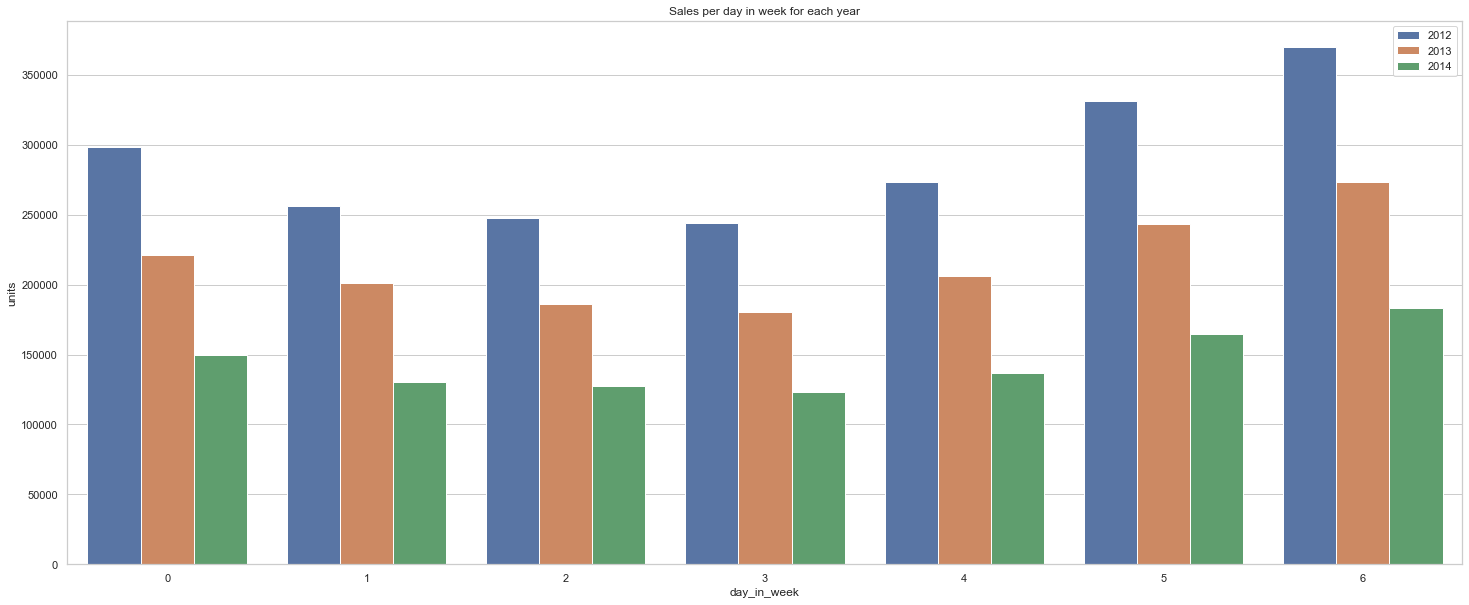

In [47]:
plt.figure(figsize=(25, 10))
sales = pd.concat([df_sales_day_week_2012,df_sales_day_week_2013,df_sales_day_week_2014])
sales_plot = sns.barplot(x="day_in_week", y="units", hue="year", data=sales).set(title='Sales per day in week for each year')
plt.legend(loc='upper right')

we can see, sales are higher on Fridays, Saturdays and Sundays which is the weekend, compared to midweek.

<h3>Sales by stores</h3>

In [48]:
sales_per_stores = sales_df.groupby('store_nbr')
sales_per_stores_dict = dict()
sales_per_stores_dict['units_sum']=list()
sales_per_stores_dict['store_nbr']=list()
for key,item in sales_per_stores:
    sales_per_store = sales_per_stores.get_group(key)
    sales_per_stores_dict['units_sum'].append(sales_per_store['units'].sum())
    sales_per_stores_dict['store_nbr'].append(key)
sales_per_stores_df = pd.DataFrame(sales_per_stores_dict)

In [49]:
sales_per_stores_df.sort_values(by='units_sum', ascending=False)

,units_sum,store_nbr
32,292616,33
16,271413,17
24,185025,25
1,173643,2
29,172604,30
15,165851,16
14,160554,15
37,148750,38
12,143602,13
33,141546,34


In [50]:
sales_per_stores_df['units_sum'].describe()

count       45.000000
mean    101069.066667
std      59635.771582
min      14931.000000
25%      64441.000000
50%      92556.000000
75%     131278.000000
max     292616.000000
Name: units_sum, dtype: float64

In [51]:
#stores that their units_sum is at most the 25%
sales_per_stores_df.loc[sales_per_stores_df['units_sum'] <= 64441]

,units_sum,store_nbr
0,37629,1
4,36454,5
7,45427,8
11,50448,12
13,28590,14
17,29158,18
18,29037,19
26,64441,27
34,38275,35
38,14931,39


In [52]:
#stores that their units_sum is more than the 75%
sales_per_stores_df.loc[sales_per_stores_df['units_sum'] > 131287]

,units_sum,store_nbr
1,173643,2
12,143602,13
14,160554,15
15,165851,16
16,271413,17
24,185025,25
29,172604,30
30,136907,31
32,292616,33
33,141546,34


No handles with labels found to put in legend.


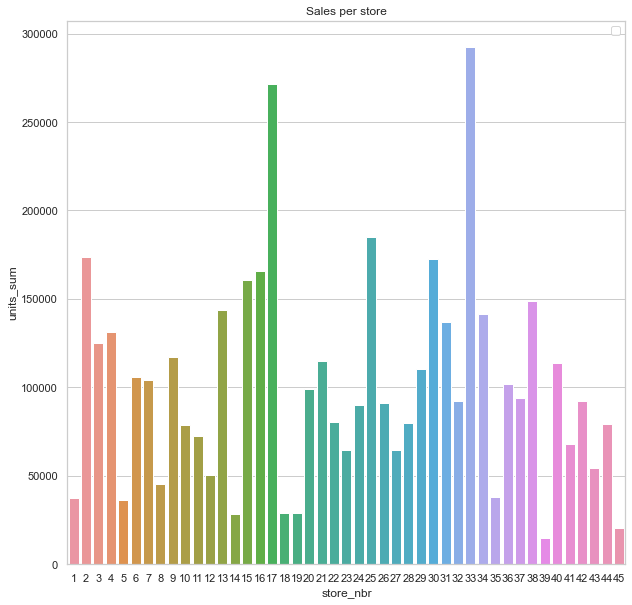

In [53]:
plt.figure(figsize=(10, 10))
sales_plot = sns.barplot(x="store_nbr", y="units_sum", data=sales_per_stores_df).set(title='Sales per store')
plt.legend(loc='upper right')

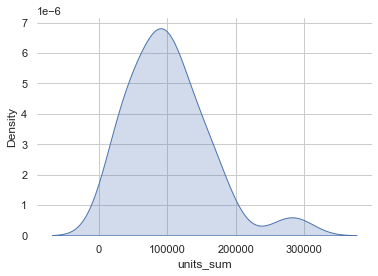

In [54]:
sns.kdeplot(sales_per_stores_df['units_sum'],fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)

<p>We can see that stores 33 and 17 have the highest sales(292616, 271413)<br>
and stores 39 and 45 have the least amount of sales(14391,20252)<br>
<a href="#mappingstoresstations">based on the mapping of each store to weather station</a>(which group the stores geographly)<br>
we can see that there is a differance between the sales of stores that are close to each other in many cases<br>
like:<br>
stors 7 vs 13<br>
stores 21,29 vs 33<br>
stores 4 vs 24<br>
stores 5 vs 10<br>
stores 15 vs 25 vs 32 vs 37 vs 40<br>
stores 6,42 vs 2,38<br>
stores 9,31,34 vs 18 vs 23,26<br>
<br><br>
Also we can divide the stores to 2 groups based on sum of sales(33,17 and all the others)
</p>

<h3 id ="ExplorationKey">Exploring the key_df Dataset</h3>

First, lets take a look at weather dataframe


In [55]:
key_df

,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12
5,6,14
6,7,6
7,8,4
8,9,17
9,10,12


Let's look of the stores of any station

In [56]:
stores_per_staion = key_df.groupby(['station_nbr'])
#This stores_per_staion_dic contains station number as key and list of store number as value
stores_per_staion_dic = dict()
for key,item in stores_per_staion:
        stores = stores_per_staion.get_group(key)
        stores_per_staion_dic[key] = stores['store_nbr'].values

#ptint the dictionary
for i in range(1,len(stores_per_staion_dic)+1):
    print('station ', i, '  stores:', stores_per_staion_dic[i])


station  1   stores: [1]
station  2   stores: [16]
station  3   stores: [21 29 33]
station  4   stores: [8]
station  5   stores: [35]
station  6   stores: [ 7 13]
station  7   stores: [ 3 20 28]
station  8   stores: [39]
station  9   stores: [ 4 24]
station  10   stores: [11 22 27]
station  11   stores: [12 43]
station  12   stores: [ 5 10 41 44]
station  13   stores: [15 25 32 37 40]
station  14   stores: [ 2  6 38 42]
station  15   stores: [19]
station  16   stores: [14 45]
station  17   stores: [ 9 18 23 26 31 34]
station  18   stores: [36]
station  19   stores: [30]
station  20   stores: [17]


Adding station column to sales_df based on key_df dataset

In [57]:
#gatering all the store ids
stores_ids = np.unique(key_df['store_nbr'].values)

# creating a dict that map each store(key) to its station(value)
staions_per_store_dic = dict()
for i in range(0, len(key_df)):
    staions_per_store_dic[key_df.iloc[i]['store_nbr']] = key_df.iloc[i]['station_nbr']

#adding station column to the sales dataset
sales_df['station_nbr'] = None
sales_df['station_nbr'] = sales_df['store_nbr'].map(staions_per_store_dic)

sales_df

,date,store_nbr,item_nbr,units,station_nbr
0,2012-01-01,1,1,0,1
1,2012-01-01,1,2,0,1
2,2012-01-01,1,3,0,1
3,2012-01-01,1,4,0,1
4,2012-01-01,1,5,0,1
...,...,...,...,...,...
4617595,2014-10-31,45,107,0,16
4617596,2014-10-31,45,108,0,16
4617597,2014-10-31,45,109,0,16
4617598,2014-10-31,45,110,0,16


<h3 id ="ExplorationWeather">Exploring the weather_df Dataset</h3>

First, lets take a look at weather dataframe

In [58]:
weather_df = pd.read_csv('weather.csv')
weather_df.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,1/1/2012,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,1/1/2012,48,33,41,16,37,39,24,0,716,1626,RA,0,0.07,28.82,29.91,9.1,23,11.3
2,3,1/1/2012,55,34,45,9,24,36,20,0,735,1720,,0,0,29.77,30.47,9.9,31,10
3,4,1/1/2012,63,47,55,4,28,43,10,0,728,1742,,0,0,29.79,30.48,8,35,8.2
4,6,1/1/2012,63,34,49,0,31,43,16,0,727,1742,,0,0,29.95,30.47,14,36,13.8


In [59]:
# data shape (rows, columns)
weather_df.shape

(20517, 20)

As we can see the data contains 20517 rows and 20 features(1 date, 1 time, 1 id type, 1 categorical, 16 numeric)

In [60]:
# variables data types
weather_df.dtypes

station_nbr     int64
date           object
tmax           object
tmin           object
tavg           object
depart         object
dewpoint       object
wetbulb        object
heat           object
cool           object
sunrise        object
sunset         object
codesum        object
snowfall       object
preciptotal    object
stnpressure    object
sealevel       object
resultspeed    object
resultdir      object
avgspeed       object
dtype: object

In [61]:
# missing values by variable
weather_df.isnull().sum()

station_nbr    0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
codesum        0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
dtype: int64

In the weather dataset we received, we had to make conversions to the values of certain features.
The process of converting features values is usually performed in the pre-processing stage,
but in order to improve the visualization, we have chosen to perform the conversions right now.

In [62]:
#some measurements (snowfall, preciptotal) contains Trace samples(when the variable value is greater than 0
# but to small to be measured(smaller than 0.1) there for we assigned Trace samples with a very small positive number)
T_val = 0.01

In [63]:
#replacing  Missing values with Nan
weather_df.replace(to_replace = ['M'], value = np.nan, inplace= True)
#replacing Trace values with a very small number
weather_df.replace(to_replace = ['  T'], value = T_val, inplace= True)
#replacing ' ' with moderate weather value
weather_df = weather_df.replace(to_replace = [' '], value = 'MODERATE')
#replacing  Missing values with Nan
weather_df.replace(to_replace = '-',value = np.nan, inplace= True)

Printing the dataset after the changes

In [64]:
weather_df

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,1/1/2012,52,31,42,NaN,36,40,23,0,NaN,NaN,RA FZFG BR,NaN,0.05,29.78,29.92,3.6,20,4.6
1,2,1/1/2012,48,33,41,16,37,39,24,0,716,1626,RA,0,0.07,28.82,29.91,9.1,23,11.3
2,3,1/1/2012,55,34,45,9,24,36,20,0,735,1720,MODERATE,0,0,29.77,30.47,9.9,31,10
3,4,1/1/2012,63,47,55,4,28,43,10,0,728,1742,MODERATE,0,0,29.79,30.48,8,35,8.2
4,6,1/1/2012,63,34,49,0,31,43,16,0,727,1742,MODERATE,0,0,29.95,30.47,14,36,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,16,10/31/2014,53,34,44,NaN,35,41,21,0,NaN,NaN,MODERATE,NaN,0,29.9,29.99,4.5,3,5.3
20513,17,10/31/2014,59,34,47,NaN,32,41,18,0,NaN,NaN,RA,0,0,29.72,30.39,9.2,1,9.3
20514,18,10/31/2014,67,49,58,-4,40,50,7,0,644,1738,MODERATE,0,0,29.78,30.28,10.6,36,11.2
20515,19,10/31/2014,45,33,39,-6,24,32,26,0,624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9


In [65]:
weather_df.dtypes

station_nbr     int64
date           object
tmax           object
tmin           object
tavg           object
depart         object
dewpoint       object
wetbulb        object
heat           object
cool           object
sunrise        object
sunset         object
codesum        object
snowfall       object
preciptotal    object
stnpressure    object
sealevel       object
resultspeed    object
resultdir      object
avgspeed       object
dtype: object

Now let's look at the data types of the features in the Air Set dataset.
Here, too, we chose to change the data types already at the visualization stage to improve the process.

In [66]:
# changing category feature type from object to category
weather_df['date'] = pd.to_datetime(weather_df['date'])

#changing numeric features type from object to float64
weather_df[['tmax', 'tmin', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'tavg', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']] = weather_df[['tmax', 'tmin', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'tavg', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']].astype('float64')

# changing codesum feature type from object to category
weather_df['codesum'] = weather_df['codesum'].astype('category')
weather_df['station_nbr'] = weather_df['station_nbr'].astype('category')

# change sunrise &  sunset features type from object to float64. NOTE: The larger the number, the later it is.
weather_df[['sunrise', 'sunset']] = weather_df[['sunrise', 'sunset']].astype('float64')

In [67]:
# variables data types
weather_df.dtypes

station_nbr          category
date           datetime64[ns]
tmax                  float64
tmin                  float64
tavg                  float64
depart                float64
dewpoint              float64
wetbulb               float64
heat                  float64
cool                  float64
sunrise               float64
sunset                float64
codesum              category
snowfall              float64
preciptotal           float64
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir             float64
avgspeed              float64
dtype: object

Checking samples with mostly nulls values

In [68]:
#There are 13 numeric features so we chose to drop all samples that has more then 50% missing values
#as we show before only numeric features(13 features) have null values in this dataset
#so 50% will be 13/2
most_nulls_df = weather_df.iloc[weather_df[(weather_df.isnull().sum(axis=1) >= int(13/2) )].index]

In [69]:
most_nulls_df

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
6,8,2012-01-01,66.000000,45.000000,NaN,NaN,34.000000,46.000000,NaN,NaN,NaN,NaN,RA BR,NaN,0.000000,30.050000,NaN,11.000000,36.000000,10.900000
25,8,2012-01-02,59.000000,36.000000,NaN,NaN,29.000000,40.000000,NaN,NaN,NaN,NaN,MODERATE,NaN,0.000000,30.250000,NaN,6.200000,36.000000,6.700000
44,8,2012-01-03,61.000000,30.000000,NaN,NaN,28.000000,38.000000,NaN,NaN,NaN,NaN,MODERATE,NaN,0.000000,30.120000,NaN,3.900000,16.000000,3.900000
63,8,2012-01-04,72.000000,37.000000,NaN,NaN,45.000000,49.000000,NaN,NaN,NaN,NaN,MODERATE,NaN,0.000000,29.900000,NaN,1.400000,24.000000,2.600000
82,8,2012-01-05,70.000000,46.000000,NaN,NaN,46.000000,52.000000,NaN,NaN,NaN,NaN,MODERATE,NaN,0.000000,29.870000,NaN,0.900000,33.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20441,5,2014-10-28,NaN,NaN,NaN,NaN,47.000000,NaN,NaN,NaN,612.000000,1644.000000,MODERATE,NaN,NaN,NaN,30.030000,7.000000,19.000000,NaN
20461,5,2014-10-29,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,613.000000,1643.000000,MODERATE,NaN,NaN,NaN,29.870000,8.200000,23.000000,NaN
20481,5,2014-10-30,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,615.000000,1641.000000,MODERATE,NaN,NaN,NaN,29.950000,8.300000,30.000000,NaN
20501,5,2014-10-31,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,616.000000,1640.000000,MODERATE,NaN,NaN,NaN,30.010000,10.800000,5.000000,NaN


<Figure size 1080x1080 with 0 Axes>

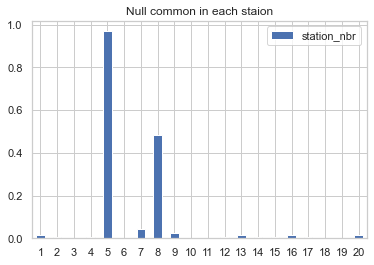

In [70]:
# visualize the stations variable with most nulls values, The plot shows the percentage of nulls of each staion
plt.figure(figsize=(15, 15))
null_values = pd.DataFrame(most_nulls_df['station_nbr'].value_counts() / weather_df['station_nbr'].value_counts())
null_values.rename(index={'': 'station_nbr'}, inplace = True)
nulls_plot = null_values.plot.bar(use_index=True, y='station_nbr', rot=0).set(title = "Null common in each staion")

<p>As we can see station 5 has significantly more null values than others per samples with trashhold 6 that is 50% of sample's numeric values.</p>

In [71]:
num_of_sampels_staion_5 =  len(weather_df.loc[weather_df['station_nbr']==5])
num_of_sampels_staion_8 = len(weather_df.loc[weather_df['station_nbr']==8])
print('The number of samples which taken on station 5 is ', num_of_sampels_staion_5, ' among them', len(most_nulls_df.loc[weather_df['station_nbr']==5]) ,'have more the 50% missing values')
print('The number of samples which taken on station 8 is ',num_of_sampels_staion_8, ' among them', len(most_nulls_df.loc[weather_df['station_nbr']==8]) ,'have more the 50% missing values')

The number of samples which taken on station 5 is  852  among them 826 have more the 50% missing values
The number of samples which taken on station 8 is  1035  among them 502 have more the 50% missing values


As we can see 97% of samples were taken from staion 5 contain more then 50% missing values, So we decided to remove staion 5 and store 35 from our datasets

<h4>Display descriptive statistics for numeric variables</h4>

In [72]:
weather_df.iloc[:,1:].describe() #We did iloc because we don't want to describe the station_nbr feature

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,19611.000000,19609.000000,19048.000000,9006.000000,19851.000000,19265.000000,19048.000000,19048.000000,10861.000000,10861.000000,13293.000000,19657.000000,19588.000000,18793.000000,19928.000000,19928.000000,19642.000000
mean,71.621131,50.654546,61.240130,1.363091,47.270918,53.888243,9.704536,5.944666,585.038578,1823.387073,0.044092,0.101864,29.162770,30.009160,6.468326,18.729928,7.914077
std,19.847451,19.139055,19.194357,7.646759,19.400495,17.017772,13.843873,7.834796,90.916758,92.148402,0.499653,0.343404,1.245414,0.191134,4.192577,9.675662,3.933458
min,-11.000000,-21.000000,-16.000000,-35.000000,-24.000000,-15.000000,0.000000,0.000000,406.000000,1611.000000,0.000000,0.000000,23.720000,29.160000,0.000000,1.000000,0.000000
25%,59.000000,37.000000,48.000000,-3.000000,33.000000,42.000000,0.000000,0.000000,527.000000,1745.000000,0.000000,0.000000,29.110000,29.890000,3.200000,13.000000,5.100000
50%,76.000000,53.000000,65.000000,2.000000,51.000000,57.000000,0.000000,0.000000,602.000000,1833.000000,0.000000,0.000000,29.410000,30.000000,5.700000,18.000000,7.300000
75%,87.000000,67.000000,77.000000,6.000000,64.000000,68.000000,17.000000,12.000000,646.000000,1915.000000,0.000000,0.010000,29.780000,30.130000,8.900000,26.000000,10.100000
max,114.000000,88.000000,100.000000,33.000000,77.000000,80.000000,81.000000,35.000000,740.000000,1949.000000,16.200000,7.360000,30.610000,30.800000,28.400000,36.000000,28.700000


<p>Its seems like the tmax, tmin , dewpoint, wetbulb and tavg distributions are negative skewed,  and that<br>
heat, cool, snowfall, avgspeed and result speed distributions are very positive skewed.<br>
The rest seems to be close to normal distributions.<br>
In order to understand more we will have to create distributions plots.</p>

<h4 id="outliersdatesreaserch">checking station 13 descriptive statistics</h3>
<p>
<a href="#outliers">As we saw earlier</a> we had 2 outliers in the sales in store 37 (that under station 13).<br>
We want to check if there were any anomaly weather features values at those dates,<br>
For that, first we look at the descriptive statistics of the stations<br>
</p>

In [73]:
stat13_df = weather_df.loc[weather_df['station_nbr'] == 13]
stat13_df.select_dtypes(include='number').describe()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,1034.000000,1034.000000,1021.000000,0.000000,1035.000000,1032.000000,1021.000000,1021.000000,0.000000,0.000000,0.000000,1034.000000,1032.000000,1032.000000,1035.000000,1035.000000,1034.000000
mean,65.259188,37.817215,51.769833,NaN,28.871498,40.882752,15.385896,2.155730,NaN,NaN,NaN,0.046509,24.235184,29.973062,4.444541,19.344928,7.905319
std,19.362356,17.208658,17.931704,NaN,14.541806,13.596899,15.440142,4.092346,NaN,NaN,NaN,0.172948,0.154120,0.207735,3.322745,8.786852,2.930552
min,2.000000,-17.000000,-7.000000,NaN,-11.000000,-7.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,23.720000,29.300000,0.200000,1.000000,0.700000
25%,52.000000,25.000000,39.000000,NaN,17.000000,31.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,24.140000,29.850000,2.200000,15.000000,6.000000
50%,67.000000,38.000000,53.000000,NaN,28.000000,42.000000,12.000000,0.000000,NaN,NaN,NaN,0.000000,24.250000,29.980000,3.600000,19.000000,7.300000
75%,81.000000,53.000000,67.000000,NaN,41.000000,53.000000,26.000000,2.000000,NaN,NaN,NaN,0.010000,24.350000,30.110000,5.700000,25.000000,9.200000
max,100.000000,67.000000,82.000000,NaN,59.000000,62.000000,72.000000,17.000000,NaN,NaN,NaN,2.210000,24.640000,30.670000,22.600000,36.000000,22.900000


now we check the weather features values of the outliers

In [74]:
stat13_df_outlier1 = stat13_df.loc[stat13_df['date'] == pd.datetime(2012,11,15)]
stat13_df_outlier2 = stat13_df.loc[stat13_df['date'] == pd.datetime(2013,11,21)]
stat13_df_outlier1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
6240,13,2012-11-15,44.000000,24.000000,34.000000,NaN,26.000000,31.000000,31.000000,0.000000,NaN,NaN,MODERATE,NaN,0.000000,24.480000,30.380000,2.500000,15.000000,4.800000


In [75]:
stat13_df_outlier2

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
13629,13,2013-11-21,28.000000,11.000000,20.000000,NaN,11.000000,14.000000,45.000000,0.000000,NaN,NaN,SN BR,NaN,0.080000,24.470000,30.440000,7.000000,2.000000,7.500000


<p>As we can see the outliers dates were colder, but not drasticly.<br>
Beside that is seems that there no any anomalies at those dates.<br>
Therefor the highly sales of in store 37 at those dates could accoured from special holydays or sales discounts<br>
but we cant konw it based on our data.
</p>

<h3>Splitting the dataset to numeric and categorical<h3>

In [76]:
numeric_ds = weather_df.select_dtypes(include='number')
categorical_ds = weather_df.select_dtypes(include='category')

In [77]:
# look at numeric features of the observations
numeric_ds

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,NaN,NaN,NaN,0.050000,29.780000,29.920000,3.600000,20.000000,4.600000
1,48.000000,33.000000,41.000000,16.000000,37.000000,39.000000,24.000000,0.000000,716.000000,1626.000000,0.000000,0.070000,28.820000,29.910000,9.100000,23.000000,11.300000
2,55.000000,34.000000,45.000000,9.000000,24.000000,36.000000,20.000000,0.000000,735.000000,1720.000000,0.000000,0.000000,29.770000,30.470000,9.900000,31.000000,10.000000
3,63.000000,47.000000,55.000000,4.000000,28.000000,43.000000,10.000000,0.000000,728.000000,1742.000000,0.000000,0.000000,29.790000,30.480000,8.000000,35.000000,8.200000
4,63.000000,34.000000,49.000000,0.000000,31.000000,43.000000,16.000000,0.000000,727.000000,1742.000000,0.000000,0.000000,29.950000,30.470000,14.000000,36.000000,13.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,53.000000,34.000000,44.000000,NaN,35.000000,41.000000,21.000000,0.000000,NaN,NaN,NaN,0.000000,29.900000,29.990000,4.500000,3.000000,5.300000
20513,59.000000,34.000000,47.000000,NaN,32.000000,41.000000,18.000000,0.000000,NaN,NaN,0.000000,0.000000,29.720000,30.390000,9.200000,1.000000,9.300000
20514,67.000000,49.000000,58.000000,-4.000000,40.000000,50.000000,7.000000,0.000000,644.000000,1738.000000,0.000000,0.000000,29.780000,30.280000,10.600000,36.000000,11.200000
20515,45.000000,33.000000,39.000000,-6.000000,24.000000,32.000000,26.000000,0.000000,624.000000,1646.000000,0.100000,0.020000,29.510000,30.240000,20.400000,34.000000,20.900000


In [78]:
# look at categorial features of the observations
categorical_ds

,station_nbr,codesum
0,1,RA FZFG BR
1,2,RA
2,3,MODERATE
3,4,MODERATE
4,6,MODERATE
...,...,...
20512,16,MODERATE
20513,17,RA
20514,18,MODERATE
20515,19,RA SN


Distributions of the numeric features

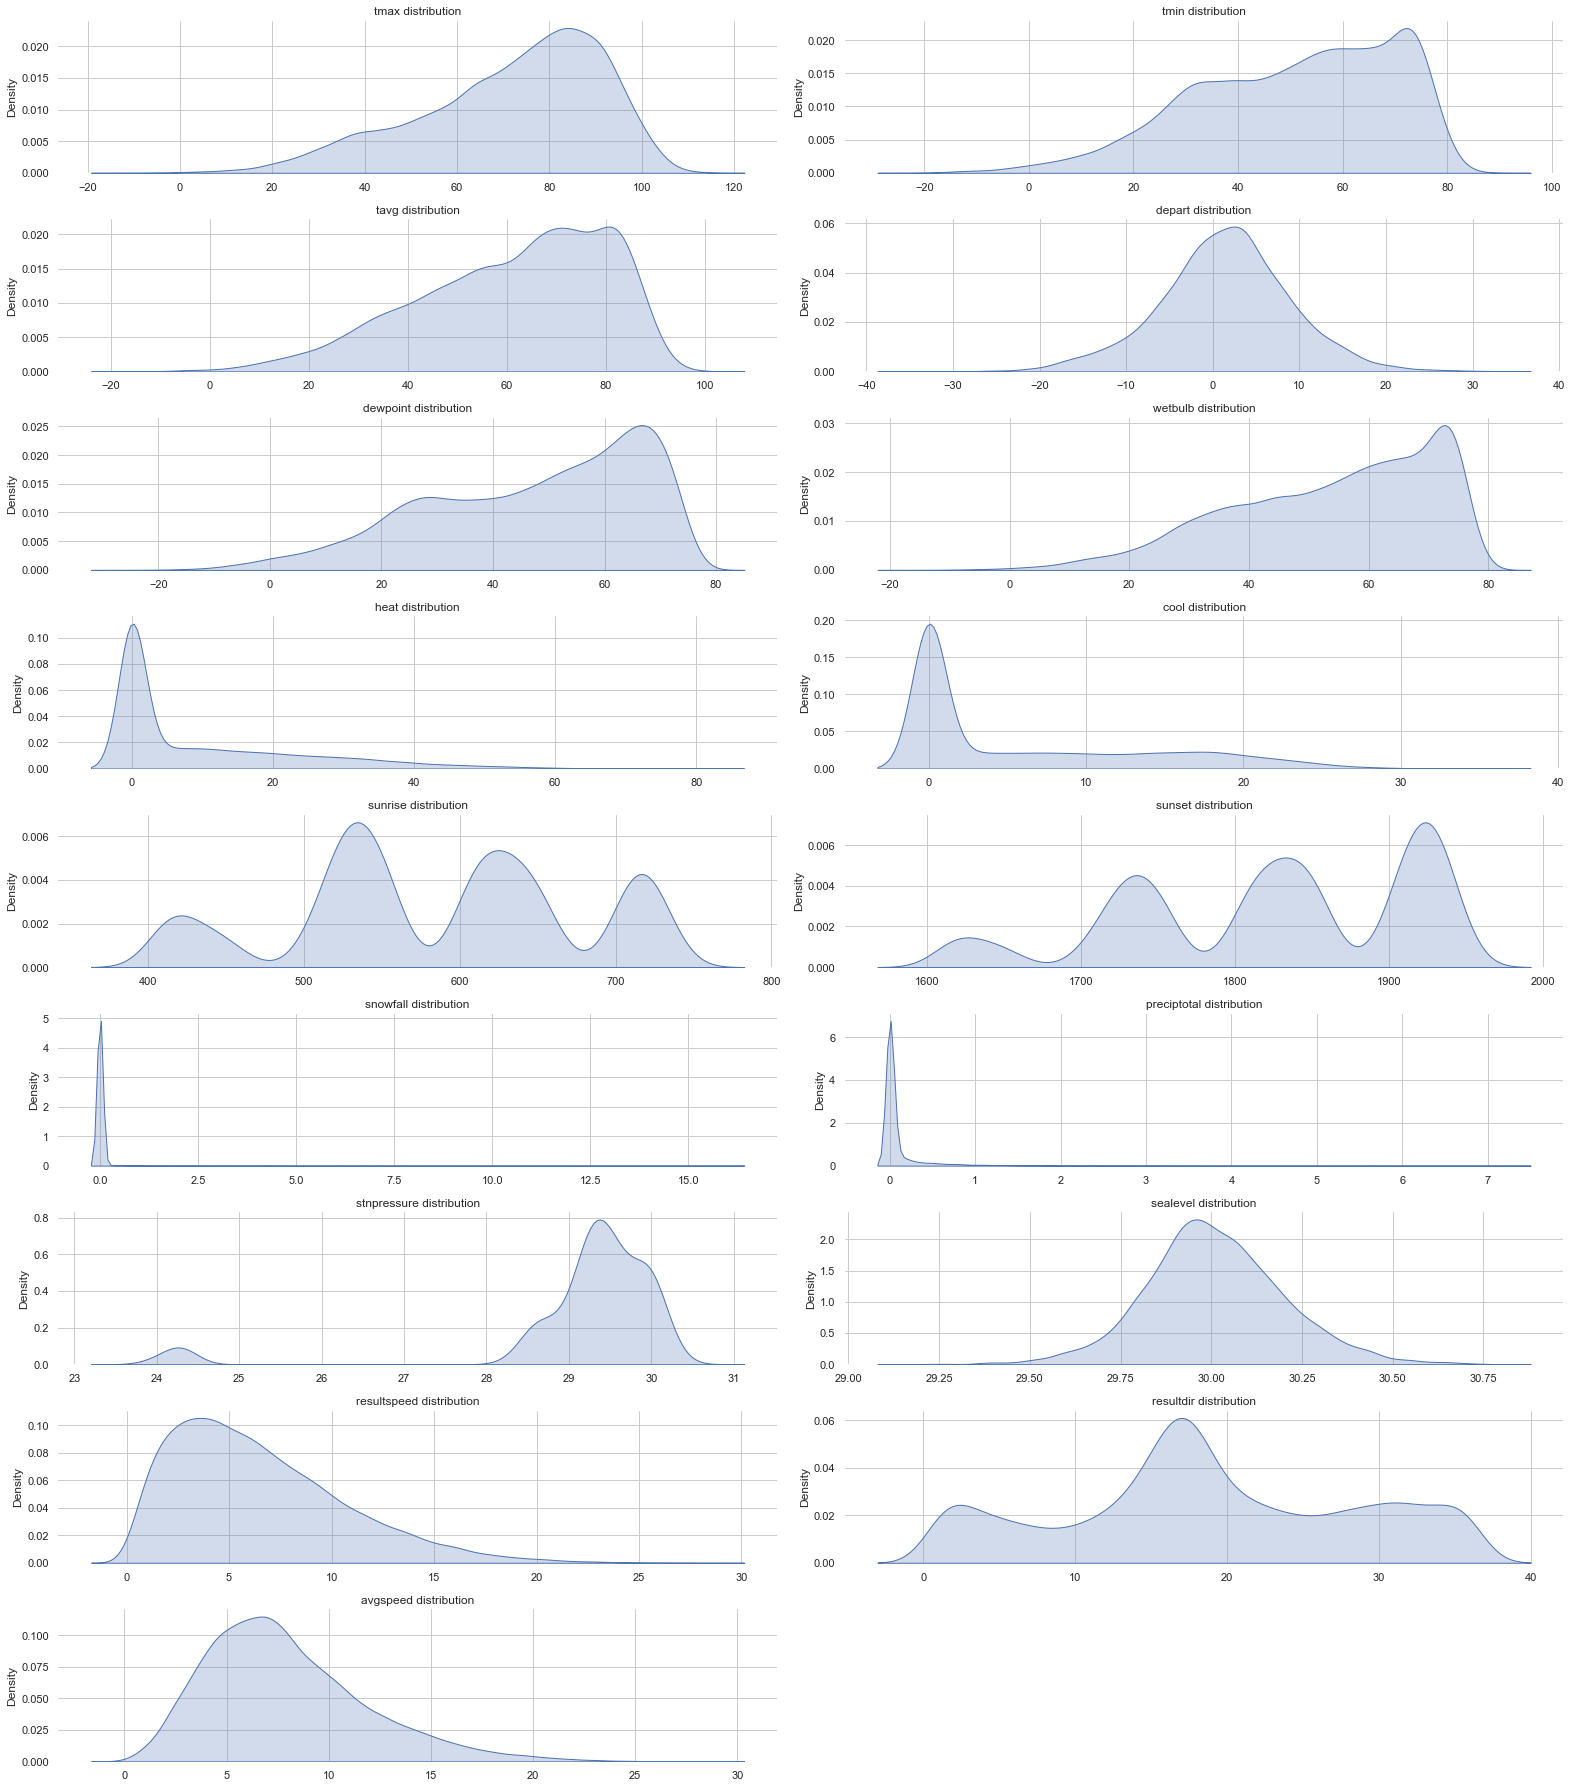

In [79]:
plt.figure(figsize=(22, 25))
for i in numeric_ds.columns:
    plt.subplot(9, 2, numeric_ds.columns.get_loc(i)+1)
    plt.title(i + " distribution")
    sns.kdeplot(numeric_ds[i],fill=True, palette='Blues', common_norm=True)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.xlabel('')
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.tight_layout()

<p>
The most interesting graph we found from those of the numerical features is pressure.<br>
As we can see there are 2 gruops in the station pressure feature<br>
lets see the distributions of this feature for each station<br>
Now, we'll explore the Presure feature in the various weather stations
</p>

<h3 id = "investigatingPressure" >investigating atmospheric pressure on stations</h3>

Text(0.5, 1.0, 'stnpressure Distribution Across station_nbr')

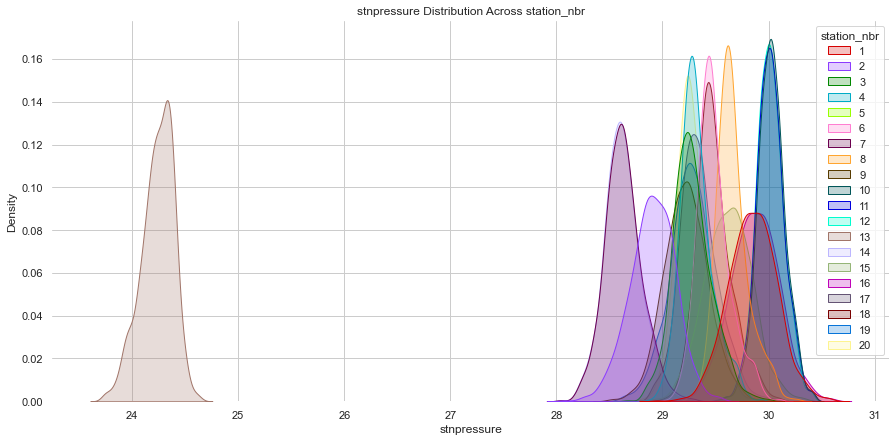

In [80]:
import colorcet as cc
plt.figure(figsize=(15, 7))
palette = sns.color_palette(cc.glasbey, n_colors=20)
numeric_features =  weather_df["stnpressure"]

sns.kdeplot(weather_df["stnpressure"], hue=weather_df['station_nbr'], palette = palette,fill=True, common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('stnpressure')
plt.title('stnpressure Distribution Across station_nbr')

<p>As we can see most stations have atmostperic pressure between 28-31 Inches of HG, and <br>
stations 13 has atmostperic pressure between 23.5-~24.7 Inches of HG what that can point out a  significantly different<br>
 between the elevation of station 13 compare to the others
 </p>

Later in the pre-processing process we consolidate the datasets.
After unification, it will be possible to better investigate this correlation.
We will therefore do this later - <a href="#stnpressureAndSales">Relation between sales and pressure</a>


<h3>features correlation</h3>
<p>Now let's look at the correlation between the various features in the "Weather" dataset.</p>

<AxesSubplot:title={'center':'correlation of the features'}>

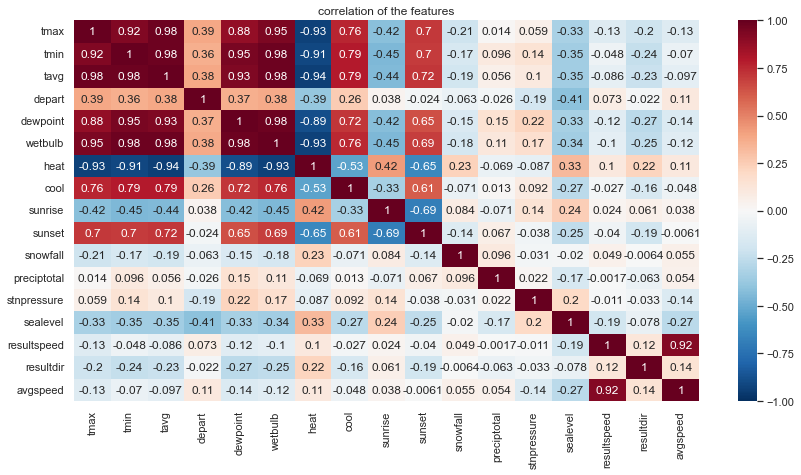

In [81]:
plt.figure(figsize=(14,7))
plt.title("correlation of the features")
heatmap_data = numeric_ds.corr()
sns.heatmap(data=heatmap_data,cmap= 'RdBu_r', vmin=-1, vmax=1, annot=True)

<p>
<span style="color:red">high positive correlated features:</span><br>
<ul>
<li>tmax-wetbulb(0.95)</li>
<li>tmax-dewpoint(0.88)</li>
<li>tmax-tavg(0.98)</li>
<li>tmax-tmin(0.92)</li>
<li>tmin-wetbulb(0.98)</li>
<li>tmin-dewpoint(0.95)</li>
<li>tmin-tavg(0.98)</li>
<li>tavg-wetbulb(0.98)</li>
<li>tavg-dewpoint(0.93)</li>
<li>dewpoint-wetbulb(0.98)</li>
<li>resultspeed-avgspeed(0.92)</li>
</ul>
<span style="color:blue">high negative correlated features:</span><br>
<ul>
<li>heat-wetbulb(-0.93)</li>
<li>heat-dewpoint(-0.89)</li>
<li>heat-tavg(-0.94)</li>
<li>heat-tmin(-0.91)</li>
<li>heat-tmax(-0.93)</li>
</ul>
</p>

<h2 id="PreProcessing">Section B (Pre-Processing)</h2>


<h3>Weather_df</h3><p>

<h4 id="codesumencod">one hot encoding for codesum</h4><p>
In order to use Knn or Mice for imputation we have to transform the categorizes values to numeric onces,<br>
also some regression models w'ont work with categorizes values.<br>
Therefor we chose to use One Hot Encoding for our categorical feature.
</p>

In [82]:
categorical_ds = weather_df.iloc[numeric_ds.index]['codesum']

<p>Because some rows have multiple values in the codesum feature, we will<br>
have to split each values and encode the values in a new dataset
</p>

In [83]:
#all the possible values of codesum feature
codesum_values_list = ["FC+","FC","TS","GR","RA","DZ","SN","SG","GS","PL","IC","FG+","FG","BR","UP","HZ","FU","VA","DU","DS","PO","SS","PY","SQ","DR","SH","FZ","MI","PR",
                       "BC","BL","VC","MODERATE"]

#creating and initializing a dict of the codesum values
dic_init_codesum_for_one_hot = dict()
for val in codesum_values_list:
    dic_init_codesum_for_one_hot[val] = [0] * len(categorical_ds)

In [84]:
#This function get string as input and return list of strings, split the codesum  values
def split_codesum_value(codesum_val):
    to_return = []
    if codesum_val== 'MODERATE':
        to_return.append('MODERATE')
    else:
        list_strings = codesum_val.split(" ")
        for stri in list_strings:
            if len(stri)==2:
                to_return.append(stri)
            else:
                val_name = ""
                pointer = 1
                for c in stri:
                    if pointer==3:
                        if c == '+':
                            val_name+=c
                            to_return.append(val_name)
                            val_name = ""
                            pointer = 1
                        else:
                            to_return.append(val_name)
                            val_name = ""
                            val_name+=c
                            pointer = 2
                    else:
                        val_name+=c
                        pointer+=1

                if val_name is not None and val_name !="":
                     to_return.append(val_name)
    return to_return

In [85]:
#one hot encoding of the codesum values
index=0
for i in categorical_ds:
    codesum_val_as_list = split_codesum_value(i)
    for f in codesum_val_as_list:
        dic_init_codesum_for_one_hot[f][index]=1
    index+=1

#creating a one hot encoded dataset of codesum feature
new_categorical_ds = pd.DataFrame.from_dict(dic_init_codesum_for_one_hot)

In [86]:
#Priniting codesum feature after one hot encoding
new_categorical_ds

,FC+,FC,TS,GR,RA,DZ,SN,SG,GS,PL,...,SQ,DR,SH,FZ,MI,PR,BC,BL,VC,MODERATE
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20513,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20515,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#creating a date and station_nbr dataset of the relevant rows
date_and_station_ds = weather_df.iloc[numeric_ds.index][['station_nbr', 'date']]
#mergning the datasets
new_weather_ds = pd.concat([date_and_station_ds, numeric_ds,new_categorical_ds],axis=1)
#Priniting numeric features in weather_df after one hot encoding process
new_weather_ds

#This dataset is for section F
sectionF_df = new_weather_ds.copy(deep=True)


<h3 id="merging">Merging sales_df and weatherdf</h3><p>
<p>Now that we have taken care of splitting the values and cleaning the weather_df dataset,<br>
we will merge the weather_df dataset with the sales_df dataset</p>

In [88]:
#inner joining the datasets by date and station number columns
joined_dfs = pd.merge(new_weather_ds, sales_df, how='inner', left_on=['date', 'station_nbr'], right_on = ['date', 'station_nbr'])
joined_dfs

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,FZ,MI,PR,BC,BL,VC,MODERATE,store_nbr,item_nbr,units
0,1,2012-01-01,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,...,1,0,0,0,0,0,0,1,1,0
1,1,2012-01-01,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,...,1,0,0,0,0,0,0,1,2,0
2,1,2012-01-01,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,...,1,0,0,0,0,0,0,1,3,0
3,1,2012-01-01,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,...,1,0,0,0,0,0,0,1,4,0
4,1,2012-01-01,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,...,1,0,0,0,0,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,20,2014-10-31,68.000000,50.000000,59.000000,NaN,39.000000,50.000000,6.000000,0.000000,...,0,0,0,0,0,0,1,17,107,0
4617596,20,2014-10-31,68.000000,50.000000,59.000000,NaN,39.000000,50.000000,6.000000,0.000000,...,0,0,0,0,0,0,1,17,108,0
4617597,20,2014-10-31,68.000000,50.000000,59.000000,NaN,39.000000,50.000000,6.000000,0.000000,...,0,0,0,0,0,0,1,17,109,0
4617598,20,2014-10-31,68.000000,50.000000,59.000000,NaN,39.000000,50.000000,6.000000,0.000000,...,0,0,0,0,0,0,1,17,110,0


In [89]:
joined_dfs.loc[joined_dfs['units']>200].select_dtypes(include='float64').describe()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,1416.000000,1415.000000,1410.000000,954.000000,1408.000000,1393.000000,1410.000000,1410.000000,961.000000,961.000000,1269.000000,1417.000000,1414.000000,1407.000000,1414.000000,1414.000000,1416.000000
mean,66.715395,46.479859,56.884397,1.935010,42.997869,49.789663,13.485106,5.369504,595.663892,1809.929240,0.052876,0.059809,29.085785,30.010206,7.579844,19.355021,9.151271
std,22.515457,20.630774,21.214042,8.624982,19.494227,18.128480,15.405155,8.233916,96.703878,102.110904,0.579233,0.196402,0.804322,0.200517,4.293143,9.940153,3.836090
min,-2.000000,-19.000000,-10.000000,-23.000000,-17.000000,-8.000000,0.000000,0.000000,411.000000,1615.000000,0.000000,0.000000,23.760000,29.380000,0.100000,1.000000,1.100000
25%,49.750000,30.000000,40.000000,-4.000000,27.000000,36.000000,0.000000,0.000000,520.000000,1725.000000,0.000000,0.000000,29.080000,29.880000,4.400000,14.000000,6.300000
50%,68.500000,46.000000,57.000000,2.000000,45.000000,50.000000,8.000000,0.000000,607.000000,1822.000000,0.000000,0.000000,29.230000,29.990000,6.900000,18.000000,8.500000
75%,86.000000,65.000000,75.000000,8.000000,61.000000,66.000000,25.000000,10.000000,702.000000,1916.000000,0.000000,0.010000,29.360000,30.130000,10.100000,28.000000,11.400000
max,114.000000,86.000000,99.000000,31.000000,74.000000,77.000000,75.000000,34.000000,740.000000,1949.000000,15.200000,2.450000,30.270000,30.660000,23.800000,36.000000,23.600000


In [90]:
joined_dfs.select_dtypes(include='float64').describe()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,4506156.000000,4506267.000000,4429899.000000,1547562.000000,4526580.000000,4450101.000000,4429899.000000,4429899.000000,1937061.000000,1937061.000000,2960814.000000,4518699.000000,4507710.000000,4402926.000000,4542120.000000,4542120.000000,4516146.000000
mean,72.082373,49.903638,61.182941,1.752977,46.068563,53.205333,9.629683,5.812624,599.540084,1829.720761,0.015659,0.074357,28.773385,30.015201,6.422996,18.336975,8.038657
std,19.168526,19.014335,18.695307,7.700571,19.334887,16.710068,13.320379,7.754646,85.509174,85.651872,0.289191,0.275937,1.773329,0.190027,4.229022,9.704653,3.952473
min,-11.000000,-21.000000,-16.000000,-32.000000,-24.000000,-15.000000,0.000000,0.000000,406.000000,1611.000000,0.000000,0.000000,23.720000,29.160000,0.000000,1.000000,0.000000
25%,60.000000,35.000000,48.000000,-3.000000,31.000000,41.000000,0.000000,0.000000,533.000000,1749.000000,0.000000,0.000000,28.770000,29.900000,3.200000,13.000000,5.200000
50%,76.000000,52.000000,64.000000,2.000000,49.000000,56.000000,1.000000,0.000000,610.000000,1835.000000,0.000000,0.000000,29.340000,30.010000,5.600000,18.000000,7.300000
75%,87.000000,66.000000,77.000000,6.000000,63.000000,68.000000,17.000000,12.000000,654.000000,1915.000000,0.000000,0.010000,29.800000,30.130000,8.800000,25.000000,10.200000
max,114.000000,88.000000,100.000000,33.000000,77.000000,80.000000,81.000000,35.000000,740.000000,1949.000000,16.200000,7.360000,30.610000,30.800000,28.400000,36.000000,28.700000


<h3 id="exclusion">Exclusion<h3><p>
Because we have some features with very high correlation, we can delete feature from each pair<br>(becaues their are different measurements of the same thing),<br>
in order to avoid multicolinarity and inaccurate imputation.<br>
We will choose those with the highest missing values (if they don't have high correlation with the label "units sales")
</p>

In [91]:
joined_numeric_ds = joined_dfs.select_dtypes(include='float64')

In [92]:
# Adding "units" culomn to joined_numeric_ds dataset
joined_numeric_ds['units'] = joined_dfs['units']

In [93]:
# Printing joined_numeric_ds dataset
joined_numeric_ds

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,units
0,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,NaN,NaN,NaN,0.050000,29.780000,29.920000,3.600000,20.000000,4.600000,0
1,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,NaN,NaN,NaN,0.050000,29.780000,29.920000,3.600000,20.000000,4.600000,0
2,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,NaN,NaN,NaN,0.050000,29.780000,29.920000,3.600000,20.000000,4.600000,0
3,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,NaN,NaN,NaN,0.050000,29.780000,29.920000,3.600000,20.000000,4.600000,0
4,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,NaN,NaN,NaN,0.050000,29.780000,29.920000,3.600000,20.000000,4.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,68.000000,50.000000,59.000000,NaN,39.000000,50.000000,6.000000,0.000000,NaN,NaN,0.000000,0.000000,29.570000,30.270000,10.500000,36.000000,11.200000,0
4617596,68.000000,50.000000,59.000000,NaN,39.000000,50.000000,6.000000,0.000000,NaN,NaN,0.000000,0.000000,29.570000,30.270000,10.500000,36.000000,11.200000,0
4617597,68.000000,50.000000,59.000000,NaN,39.000000,50.000000,6.000000,0.000000,NaN,NaN,0.000000,0.000000,29.570000,30.270000,10.500000,36.000000,11.200000,0
4617598,68.000000,50.000000,59.000000,NaN,39.000000,50.000000,6.000000,0.000000,NaN,NaN,0.000000,0.000000,29.570000,30.270000,10.500000,36.000000,11.200000,0


Now, after we added the label culomn (units) to the numerical features of weather dataset,
let's look at the correlation between the various features in the "Weather" dataset, and at the corelletion between each of them to 'units' (our label for Section C).

<AxesSubplot:title={'center':'correlation of the features'}>

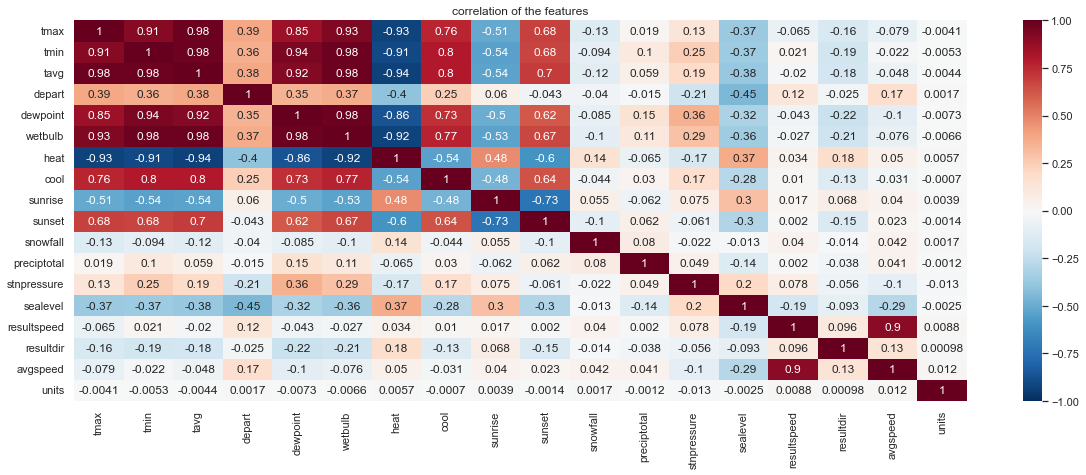

In [94]:
plt.figure(figsize=(20,7))
plt.title("correlation of the features")
heatmap_data = joined_numeric_ds.corr()
sns.heatmap(data=heatmap_data,cmap= 'RdBu_r', vmin=-1, vmax=1, annot=True)

As we can see no feature has high correlation with units (our label for Section C) so we can drop those we intended to.

In [95]:
# missing values by variable
joined_dfs.isnull().sum()

station_nbr          0
date                 0
tmax            111444
tmin            111333
tavg            187701
depart         3070038
dewpoint         91020
wetbulb         167499
heat            187701
cool            187701
sunrise        2680539
sunset         2680539
snowfall       1656786
preciptotal      98901
stnpressure     109890
sealevel        214674
resultspeed      75480
resultdir        75480
avgspeed        101454
FC+                  0
FC                   0
TS                   0
GR                   0
RA                   0
DZ                   0
SN                   0
SG                   0
GS                   0
PL                   0
IC                   0
FG+                  0
FG                   0
BR                   0
UP                   0
HZ                   0
FU                   0
VA                   0
DU                   0
DS                   0
PO                   0
SS                   0
PY                   0
SQ                   0
DR         

<h3>Drop features with high correlation<h3>

The other features for which we identified a high correlation, we chose to remove after the imputation process
in order to get more precise results when we will run KNN fot compleng missing values.

In [96]:
joined_dfs.shape

(4617600, 55)

In [97]:
#dropping features that have high correlation with others features from the dataset original!!!!(so far the best)
# joined_dfs.drop(['heat', 'avgspeed','wetbulb','depart','tavg'], axis=1, inplace=True)
joined_dfs.drop(['depart'], axis=1, inplace=True)

In [98]:
joined_dfs.shape

(4617600, 54)

<h3>Drop samples with mostly nulls drop<h3>

Drop observations that have 50% missing values instead of trying to fill the missing data will result with inaccurate values.
We have 15 weather features that have null vals and we have 53 features, so if we want to drop samples with 50% nulls or more
thr thresh sholud be 53-8 = 45

In [99]:
# before dropping observations
joined_dfs.shape

(4617600, 54)

In [100]:
joined_dfs.dropna(thresh=45, axis=0, inplace=True)

In [101]:
# after dropping observations
joined_dfs.shape

(4506156, 54)

<h3>dropping station 5 and store 35</h3><p>
As we have seen earlier 97% of samples were taken from station 5 contain more than 50% missing values, So we <br>decided to remove station 5 and store 35 from our datasets.
</p>

In [102]:
joined_dfs.drop(joined_dfs.loc[joined_dfs['station_nbr']==5].index, inplace=True)
joined_dfs.drop(joined_dfs.loc[joined_dfs['store_nbr']==35].index, inplace=True)
joined_dfs.shape

(4502826, 54)

In [103]:
joined_dfs.isnull().sum()

station_nbr          0
date                 0
tmax              1998
tmin              1887
tavg             76590
dewpoint         24975
wetbulb          55056
heat             76590
cool             76590
sunrise        2658672
sunset         2658672
snowfall       1553778
preciptotal       2109
stnpressure       9324
sealevel        147963
resultspeed      21312
resultdir        21312
avgspeed          3108
FC+                  0
FC                   0
TS                   0
GR                   0
RA                   0
DZ                   0
SN                   0
SG                   0
GS                   0
PL                   0
IC                   0
FG+                  0
FG                   0
BR                   0
UP                   0
HZ                   0
FU                   0
VA                   0
DU                   0
DS                   0
PO                   0
SS                   0
PY                   0
SQ                   0
DR                   0
SH         

<h3 id="seperating">Seperating to sections C,D,E datasets</h3><p>

In [104]:
joined_dfs

,station_nbr,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,...,FZ,MI,PR,BC,BL,VC,MODERATE,store_nbr,item_nbr,units
0,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,1,0
1,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,2,0
2,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,3,0
3,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,4,0
4,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,0,1,17,107,0
4617596,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,0,1,17,108,0
4617597,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,0,1,17,109,0
4617598,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,0,1,17,110,0


In [105]:
# variables data types
joined_dfs.dtypes

station_nbr             int64
date           datetime64[ns]
tmax                  float64
tmin                  float64
tavg                  float64
dewpoint              float64
wetbulb               float64
heat                  float64
cool                  float64
sunrise               float64
sunset                float64
snowfall              float64
preciptotal           float64
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir             float64
avgspeed              float64
FC+                     int64
FC                      int64
TS                      int64
GR                      int64
RA                      int64
DZ                      int64
SN                      int64
SG                      int64
GS                      int64
PL                      int64
IC                      int64
FG+                     int64
FG                      int64
BR                      int64
UP                      int64
HZ        

In [106]:
#This Function get two dataset as input, one - of feature to impute by KNN, second - of feature not to impute.
#the output is an integrated dataset, contains both datasets after KNN impution.
def knn_imput(to_impute,not_for_impute):
    knn_df = to_impute.copy(deep=True)

    # use KNN to impute missing values
    imputer = KNNImputer(n_neighbors=5, weights="distance")
    imputed = imputer.fit_transform(knn_df)

    # replace values in the dataset with new imputed values
    knn_df[knn_df.columns] = imputed
    #merge the imputed dataset with the stations and dates dataset
    imputed_joined_df = pd.concat([not_for_impute, knn_df] , axis=1)
    return imputed_joined_df

In [107]:
# change Stage data type to category
joined_dfs['station_nbr'] = joined_dfs['station_nbr'].astype('category')

Extracting from the data samples that their item id is in key sum list

In [108]:
item_id_list = (5, 6, 9, 16, 45)

mask = joined_dfs['item_nbr'].isin([5, 6, 9, 16, 45])
section_c_df  = joined_dfs.loc[mask] #All samples which that their item number is in key_sum indexes list

Extracting from the data samples that their station is the same as store number 11

In [109]:
section_d_df = joined_dfs.loc[joined_dfs['station_nbr'] == 10][['date','preciptotal','store_nbr','item_nbr','units']]

Extracting from the data the relevant features for Elevation Estimation

In [110]:
section_e_df = joined_dfs[['station_nbr','stnpressure','sealevel','date']]

<h3 id="sectionc">SECTION C dataset - Pre-Processing </h3>

First, lets create integreated dataset

In [111]:
section_c_df

,station_nbr,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,...,FZ,MI,PR,BC,BL,VC,MODERATE,store_nbr,item_nbr,units
4,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,5,0
5,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,6,0
8,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,9,29
15,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,16,0
44,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617493,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,0,1,17,5,0
4617494,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,0,1,17,6,0
4617497,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,0,1,17,9,24
4617504,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,0,1,17,16,0


In [112]:
# #chanhe item number of each sample in the key sum dataset to 'key_sum'
key_sum_df = section_c_df.assign(item_nbr = 'key_sum')
key_sum_df['units_sum'] = None
key_sum_df

,station_nbr,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,...,MI,PR,BC,BL,VC,MODERATE,store_nbr,item_nbr,units,units_sum
4,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,0,0,0,0,0,0,1,key_sum,0,None
5,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,0,0,0,0,0,0,1,key_sum,0,None
8,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,0,0,0,0,0,0,1,key_sum,29,None
15,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,0,0,0,0,0,0,1,key_sum,0,None
44,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,0,0,0,0,0,0,1,key_sum,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617493,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,1,17,key_sum,0,None
4617494,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,1,17,key_sum,0,None
4617497,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,1,17,key_sum,24,None
4617504,20,2014-10-31,68.000000,50.000000,59.000000,39.000000,50.000000,6.000000,0.000000,NaN,...,0,0,0,0,0,1,17,key_sum,0,None


In [113]:
#grouping key sum samples by store and date, Then we will have 45 dataframes, each one describe key_sum sales in spesific store in spesific day.
key_sum_df_groupedby = key_sum_df.groupby(['store_nbr','date'])

In [114]:
key_sum_after_arrange = pd.DataFrame()
for key,item in key_sum_df_groupedby:
    sales_per_day_per_store = key_sum_df_groupedby.get_group(key)
    sales_per_day_per_store['units_sum'] = sales_per_day_per_store['units'].sum()
    sales_per_day_per_store.drop(['units'], axis=1, inplace=True)
    key_sum_after_arrange = key_sum_after_arrange.append(sales_per_day_per_store.iloc[0:1,:])


key_sum_after_arrange

,station_nbr,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,...,FZ,MI,PR,BC,BL,VC,MODERATE,store_nbr,item_nbr,units_sum
4,1,2012-01-01,52.000000,31.000000,42.000000,36.000000,40.000000,23.000000,0.000000,NaN,...,1,0,0,0,0,0,0,1,key_sum,29
4888,1,2012-01-02,50.000000,31.000000,41.000000,26.000000,35.000000,24.000000,0.000000,NaN,...,0,0,0,0,0,0,1,1,key_sum,60
9772,1,2012-01-03,32.000000,11.000000,22.000000,4.000000,18.000000,43.000000,0.000000,NaN,...,0,0,0,0,0,0,1,1,key_sum,15
14656,1,2012-01-04,28.000000,9.000000,19.000000,-1.000000,14.000000,46.000000,0.000000,NaN,...,0,0,0,0,0,0,1,1,key_sum,20
19540,1,2012-01-05,38.000000,25.000000,32.000000,13.000000,25.000000,33.000000,0.000000,NaN,...,0,0,0,0,0,0,1,1,key_sum,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596514,16,2014-10-27,62.000000,38.000000,50.000000,37.000000,44.000000,15.000000,0.000000,NaN,...,0,0,0,0,0,0,1,45,key_sum,50
4601509,16,2014-10-28,61.000000,36.000000,49.000000,44.000000,47.000000,16.000000,0.000000,NaN,...,0,0,0,0,0,0,0,45,key_sum,33
4606504,16,2014-10-29,74.000000,49.000000,62.000000,51.000000,54.000000,3.000000,0.000000,NaN,...,0,0,0,0,0,0,0,45,key_sum,15
4611499,16,2014-10-30,57.000000,34.000000,46.000000,39.000000,43.000000,19.000000,0.000000,NaN,...,0,0,0,0,0,0,1,45,key_sum,12


<h4>KNN</h4>
<p>We chose to use the KNN algorithm to complete missing values.</p>

In [115]:
# #we sperate the dataset to one for imputation with KNN and another that contains all the other feaures
# #after the imputation we will concat them
to_impute = key_sum_after_arrange.select_dtypes(include=['float64','int64'])
not_for_impute = key_sum_after_arrange.select_dtypes(include=['category','datetime64'])

In [116]:
imputed_c_df = knn_imput(to_impute,not_for_impute)

In [117]:
# #dropping feature with high correlation!!!!!!!!!!!!!!!!!!!!!
# imputed_c_df.drop(['tavg'], axis=1, inplace=True)
imputed_c_df.drop(['heat', 'avgspeed','wetbulb','tavg'], axis=1, inplace=True)
# missing values by variable after KNN imputaion
imputed_c_df.isnull().sum()

station_nbr    0
date           0
store_nbr      0
tmax           0
tmin           0
dewpoint       0
cool           0
sunrise        0
sunset         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
FC+            0
FC             0
TS             0
GR             0
RA             0
DZ             0
SN             0
SG             0
GS             0
PL             0
IC             0
FG+            0
FG             0
BR             0
UP             0
HZ             0
FU             0
VA             0
DU             0
DS             0
PO             0
SS             0
PY             0
SQ             0
DR             0
SH             0
FZ             0
MI             0
PR             0
BC             0
BL             0
VC             0
MODERATE       0
units_sum      0
dtype: int64

<p>As we can see there are no more null values, <strong>hurray</strong>!</p>

In [118]:
imputed_c_df

,station_nbr,date,store_nbr,tmax,tmin,dewpoint,cool,sunrise,sunset,snowfall,...,DR,SH,FZ,MI,PR,BC,BL,VC,MODERATE,units_sum
4,1,2012-01-01,1,52.000000,31.000000,36.000000,0.000000,625.364009,1740.733863,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
4888,1,2012-01-02,1,50.000000,31.000000,26.000000,0.000000,615.489972,1759.908140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000
9772,1,2012-01-03,1,32.000000,11.000000,4.000000,0.000000,603.699203,1738.920775,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
14656,1,2012-01-04,1,28.000000,9.000000,-1.000000,0.000000,618.787942,1719.371352,0.046418,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
19540,1,2012-01-05,1,38.000000,25.000000,13.000000,0.000000,643.806099,1671.863263,0.040280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596514,16,2014-10-27,45,62.000000,38.000000,37.000000,0.000000,652.785603,1790.545394,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000
4601509,16,2014-10-28,45,61.000000,36.000000,44.000000,0.000000,667.354969,1745.936426,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
4606504,16,2014-10-29,45,74.000000,49.000000,51.000000,0.000000,488.425770,1833.375966,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
4611499,16,2014-10-30,45,57.000000,34.000000,39.000000,0.000000,549.934785,1755.380840,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000


In [119]:
# This function get dataframe and list of feature names that we need to impute.
# The output is the same dataset after imputation
def encoding_features(df,feat_to_encod_list):
    # get categorical variables after dropping observations
    categorical_features = df[feat_to_encod_list]
    # one-hot encoding
    encoded = pd.get_dummies(categorical_features, drop_first=True)
    # drop categorical variables
    df.drop(feat_to_encod_list, axis=1, inplace=True)
    # add new encoded variables to the dataframe
    return pd.concat([df, encoded], axis=1)

In [120]:
imputed_c_df = encoding_features(imputed_c_df,list(['station_nbr','store_nbr']))
imputed_c_df

,date,tmax,tmin,dewpoint,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,...,store_nbr_36,store_nbr_37,store_nbr_38,store_nbr_39,store_nbr_40,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45
4,2012-01-01,52.000000,31.000000,36.000000,0.000000,625.364009,1740.733863,0.000000,0.050000,29.780000,...,0,0,0,0,0,0,0,0,0,0
4888,2012-01-02,50.000000,31.000000,26.000000,0.000000,615.489972,1759.908140,0.000000,0.010000,29.440000,...,0,0,0,0,0,0,0,0,0,0
9772,2012-01-03,32.000000,11.000000,4.000000,0.000000,603.699203,1738.920775,0.000000,0.000000,29.670000,...,0,0,0,0,0,0,0,0,0,0
14656,2012-01-04,28.000000,9.000000,-1.000000,0.000000,618.787942,1719.371352,0.046418,0.000000,29.860000,...,0,0,0,0,0,0,0,0,0,0
19540,2012-01-05,38.000000,25.000000,13.000000,0.000000,643.806099,1671.863263,0.040280,0.000000,29.670000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596514,2014-10-27,62.000000,38.000000,37.000000,0.000000,652.785603,1790.545394,0.000000,0.000000,29.710000,...,0,0,0,0,0,0,0,0,0,1
4601509,2014-10-28,61.000000,36.000000,44.000000,0.000000,667.354969,1745.936426,0.000000,0.000000,29.890000,...,0,0,0,0,0,0,0,0,0,1
4606504,2014-10-29,74.000000,49.000000,51.000000,0.000000,488.425770,1833.375966,0.000000,0.040000,29.720000,...,0,0,0,0,0,0,0,0,0,1
4611499,2014-10-30,57.000000,34.000000,39.000000,0.000000,549.934785,1755.380840,0.000000,0.000000,29.790000,...,0,0,0,0,0,0,0,0,0,1


<h4>splitting the dataset to train and test</h4>

In [121]:
#this function get a dataset in split it by a year and return the 2 sepertae dataset
def split_test_train(df):
    #spliting by date
    split_date = pd.datetime(2014,1,1)
    train_df = df.loc[df['date'] < split_date]#train data frame
    test_df = df.loc[df['date'] >= split_date]#test data frame
    return train_df,test_df

In [122]:
#this function get the 2 train test dataset and split the date column to month and day in the week columns
def split_date_column(train_df,test_df):
    #creating dict with day in the week and month as keys, and lists as their values
    day_month_dict = dict()
    day_month_dict['month'] = list()
    day_month_dict['day'] = list()
    day_month_dict['day_num_in_month'] = list()
    day_month_dict['day_num_in_year'] = list()
    day_month_dict_test = dict()
    day_month_dict_test['month'] = list()
    day_month_dict_test['day'] = list()
    day_month_dict_test['day_num_in_month'] = list()
    day_month_dict_test['day_num_in_year'] = list()


    #This function receive a data frame and for every row in it
    #add its month and day in the week to the dict parameter
    def replace_date_to_day_month(df, dict):
        for i in range(0, len(df)):
            #getting the month and day in the week values
            month = df.iloc[i]['date'].month
            day_in_week = df.iloc[i]['date'].isoweekday()
            daynum_in_year = df.iloc[i]['date'].timetuple().tm_yday
            daynum_in_month = df.iloc[i]['date'].strftime("%d")
            #adding the values to the dictionary
            dict['month'].append(month)
            dict['day'].append(day_in_week)
            dict['day_num_in_month'].append(daynum_in_month)
            dict['day_num_in_year'].append(daynum_in_year)


    #add month and day in the week columns to the train data frame
    replace_date_to_day_month(train_df, day_month_dict)
    train_df['month'] = day_month_dict['month']
    train_df['day'] = day_month_dict['day']
    train_df['day_num_in_month'] = day_month_dict['day_num_in_month']
    train_df['day_num_in_year'] = day_month_dict['day_num_in_year']

    #add month and day in the week columns to the test data frame
    replace_date_to_day_month(test_df, day_month_dict_test)
    test_df['month'] = day_month_dict_test['month']
    test_df['day'] = day_month_dict_test['day']
    test_df['day_num_in_month'] = day_month_dict_test['day_num_in_month']
    test_df['day_num_in_year'] = day_month_dict_test['day_num_in_year']

    #changing the types of month and day columns to int 64
    train_df[['month', 'day','day_num_in_year','day_num_in_month']] = train_df[['month', 'day','day_num_in_year','day_num_in_month']].astype('int64')
    test_df[['month', 'day','day_num_in_year','day_num_in_month']] = test_df[['month', 'day','day_num_in_year','day_num_in_month']].astype('int64')

    # drop categorical variables
    train_df.drop(['date'], axis=1, inplace=True)
    test_df.drop(['date'], axis=1, inplace=True)
    return train_df,test_df

we were asked to use all 2014 samples as our test data, and the rest for our training


In [123]:
train_c_df,test_c_df = split_test_train(imputed_c_df)

<h4>splitting the date column</h4>
<p>
regression models cant work with date type values therefor we will delete the date column<br>
and create 2 other column insted(the month value of the date, and the day in the week value)<br>
we chose to do so because we saw that the month has an impact on sales(in terms of different weather and holydays)<br>
also the day in the week will also has an impact in terms of rest day and other special days.<br>
We chose to split the date column afer the test_train split becaue the test train split is based on year
</p>

In [124]:
train_c_df,test_c_df = split_date_column(train_c_df,test_c_df)

<h4>Dealing with skewed data</h4>
<p>
As we saw before our target feature(units sales) data is very positve skewed what that will caues problem to regression models, becaues they will be trained mostly on avereged or small sales, and wont be able to predict propely larger units sales for dealing with problem we chose to apply log on the units sales values, in oreder to transform the distribution to more normalize one </p>

<h5>Sales distribution before</h5>

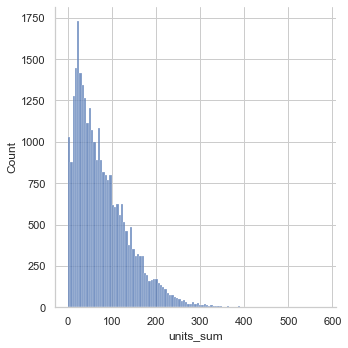

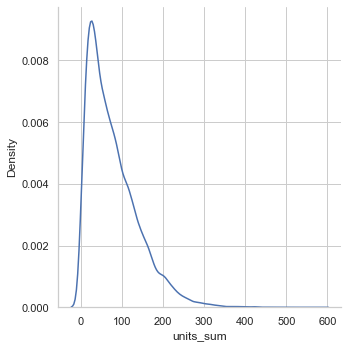

In [125]:
sns.displot(data=train_c_df.loc[:,'units_sum'])
sns.displot(data=train_c_df.loc[:,'units_sum'], kind="kde")

<p>As we can see the target is very positive skewed, <strong>small Bam</strong>!</p>

<h5>sales distribution after</h5>

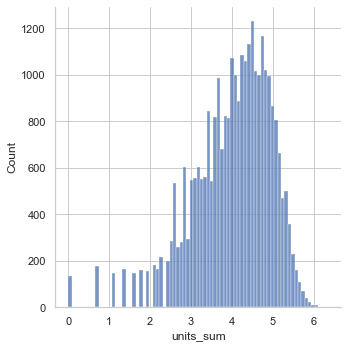

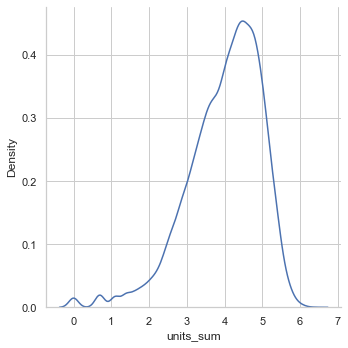

In [126]:
#apply log
log_resp = np.log(train_c_df.loc[:,'units_sum'])
sns.displot(data=log_resp)
sns.displot(data=log_resp, kind="kde")
#assign new values
train_c_df['units_sum'] = log_resp

<p>As we can see the sales distribution is much more like normal distribution <strong>Triple Bam</strong>!</p>

In [127]:
#return exp with base e of a given number
def exp(num):

    #because we used log transformation on our train data this is possible to get an not a whole prediction for the #sale, we rounded the result in order to get a valid prediction

    if num > 0:#if num > 0(if we would try to return e^0 we will receive 1 and that an error )
        return round(e**num)
    return 0#if num is 0


<h4>splitting the test and train to X and Y</h4>
<p>the ML models require to split the data to X(feaures we will use to predict the target)<br> and Y(the target AKA the feautre we want to predict its value)</p>

In [128]:
trainC_x = train_c_df.drop(['units_sum'], axis=1, inplace=False)
trainC_y = train_c_df['units_sum']
testC_x = test_c_df.drop(['units_sum'], axis=1, inplace=False)
testC_y = test_c_df['units_sum']

In [129]:
#becaues we did log transformation to our target in the train data and because some samples had valued of 0
#after the transformation they got -infi value that will cause errors in the models there for we will
#fix them and replace the -infi values with 0 again
trainC_y.replace(to_replace = float('-inf'), value = 0, inplace= True)

<p>Part C datasets are now ready for prediction, <strong>Bam</strong>!</p>

<h3 id="sectiond">SECTION D dataset - Pre-Processing</h3>

In [130]:
section_d_df

,date,preciptotal,store_nbr,item_nbr,units
1554,2012-01-01,0.000000,11,1,0
1555,2012-01-01,0.000000,11,2,0
1556,2012-01-01,0.000000,11,3,0
1557,2012-01-01,0.000000,11,4,0
1558,2012-01-01,0.000000,11,5,0
...,...,...,...,...,...
4614598,2014-10-31,0.000000,27,107,0
4614599,2014-10-31,0.000000,27,108,0
4614600,2014-10-31,0.000000,27,109,0
4614601,2014-10-31,0.000000,27,110,0


<h4>Null checking</h4>
<p>First, we create a dateset that contains all samples were taken from station 10<br>
which store 11 belong to. We did it in case that samples from store 10 contains null values,<br>
so the other samples from the other stores would helep us to impute the data.</p>

In [131]:
section_d_df.loc[section_d_df['store_nbr']==11].isnull().sum()

date           0
preciptotal    0
store_nbr      0
item_nbr       0
units          0
dtype: int64

<h4>Selecting samples from store 11</h4>
<p>We saw the the samples of store 11 does not contain null values,<br>
so lets remove the other store's samples. Then we will remove the the column 'store_nbr'</p>

In [132]:
section_d_df = section_d_df.loc[section_d_df['store_nbr']==11]
section_d_df.drop(['store_nbr'], axis=1, inplace=True)
section_d_df

,date,preciptotal,item_nbr,units
1554,2012-01-01,0.000000,1,0
1555,2012-01-01,0.000000,2,0
1556,2012-01-01,0.000000,3,0
1557,2012-01-01,0.000000,4,0
1558,2012-01-01,0.000000,5,0
...,...,...,...,...
4614376,2014-10-31,0.000000,107,0
4614377,2014-10-31,0.000000,108,0
4614378,2014-10-31,0.000000,109,0
4614379,2014-10-31,0.000000,110,14


<h4>Rearrange the dataset</h4>
<p>Now, we will combine samples of the same day (from different products)<br>
into one sample representing the total sales of that day.</p>

In [133]:
section_d_groupedby_date = section_d_df.groupby(['date'])
section_d_df_after_arrange = pd.DataFrame()
for key,item in section_d_groupedby_date:
    sales11_per_day = section_d_groupedby_date.get_group(key)
    section_d_df_after_arrange = section_d_df_after_arrange.append(sales11_per_day.iloc[0:1,0:2])

section_d_df_after_arrange

,date,preciptotal
1554,2012-01-01,0.000000
6438,2012-01-02,0.000000
11322,2012-01-03,0.000000
16206,2012-01-04,0.000000
21090,2012-01-05,0.000000
...,...,...
4594290,2014-10-27,0.000000
4599285,2014-10-28,0.000000
4604280,2014-10-29,0.000000
4609275,2014-10-30,0.300000


We will now replace the precipital column values with a category (0,1) for prediction

In [134]:
section_d_df_after_arrange.loc[(section_d_df_after_arrange.preciptotal > 0),'preciptotal']= 1
section_d_df_after_arrange['preciptotal']= section_d_df_after_arrange['preciptotal'].astype('category')
section_d_df_after_arrange

,date,preciptotal
1554,2012-01-01,0.000000
6438,2012-01-02,0.000000
11322,2012-01-03,0.000000
16206,2012-01-04,0.000000
21090,2012-01-05,0.000000
...,...,...
4594290,2014-10-27,0.000000
4599285,2014-10-28,0.000000
4604280,2014-10-29,0.000000
4609275,2014-10-30,1.000000


Now in order to represent the sales of all the products in one line, we will create a column for each product.
The value of the column for a product will be the quantity of units purchased from the same product on the same day.

In [135]:
dic_products_sales_per_day = dict()
for i in range (1,112): dic_products_sales_per_day['product '+ str(i)] = list()
for i in range (0, len(section_d_df)):
    dic_products_sales_per_day['product ' + str(section_d_df.iloc[i]['item_nbr'])].append(section_d_df.iloc[i]['units'])

#create dataframe from the dictionary
df_products_sales_per_day = pd.DataFrame(dic_products_sales_per_day)

#Finnaly printing the dataset that describe for each product the quantity of units purchased from the same product on the same day.
df_products_sales_per_day

,product 1,product 2,product 3,product 4,product 5,product 6,product 7,product 8,product 9,product 10,...,product 102,product 103,product 104,product 105,product 106,product 107,product 108,product 109,product 110,product 111
0,0,0,0,0,0,0,0,0,74,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,49,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,42,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,49,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0,0,0,0,0,0,0,0,22,0,...,0,0,0,0,0,0,0,0,5,0
894,0,0,0,0,0,0,0,0,18,0,...,0,0,0,0,0,0,0,0,0,0
895,0,0,0,0,0,0,0,0,46,0,...,0,0,0,0,0,0,0,0,8,0
896,0,0,0,0,0,0,0,0,20,0,...,0,0,0,0,0,0,0,0,13,0


We now want to integrate the following two datasets to one dataset: @df_products_sales_per_day and @section_d_df_after_arrange

In [136]:
section_d_df_after_arrange.index = df_products_sales_per_day.index
section_d_df_merged = pd.concat([section_d_df_after_arrange,df_products_sales_per_day], axis = 1)
section_d_df_merged

,date,preciptotal,product 1,product 2,product 3,product 4,product 5,product 6,product 7,product 8,...,product 102,product 103,product 104,product 105,product 106,product 107,product 108,product 109,product 110,product 111
0,2012-01-01,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-02,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-03,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-04,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-05,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,2014-10-27,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
894,2014-10-28,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,2014-10-29,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
896,2014-10-30,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,0


<h4>Checking ratio of the target values</h4>
<p>Given that a precipitation column is our label,<br>
which we want to predict, we would like to check the ratio between the classes in this column.</p>

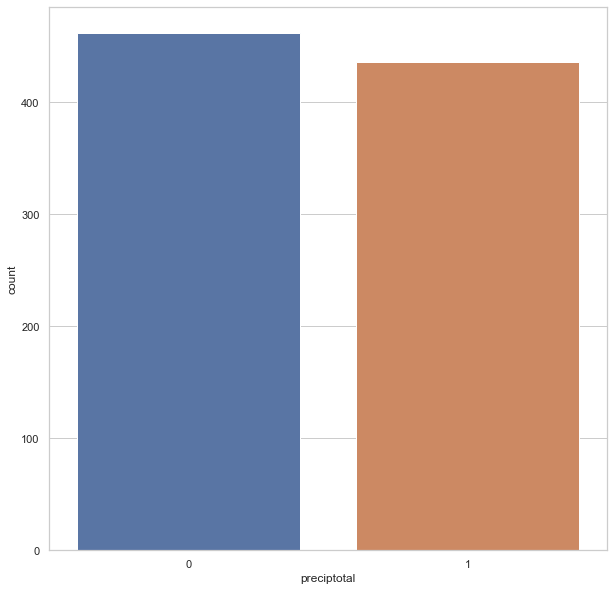

In [137]:
# visualize the label variable
plt.figure(figsize=(10, 10))
g = sns.countplot(section_d_df_merged['preciptotal'])
g.set_xticklabels(['0','1'])
plt.show()

In [138]:
section_d_df_merged['preciptotal'].value_counts()

0.0    462
1.0    436
Name: preciptotal, dtype: int64

As we can see the ratio between the classes is approximately equals, so we will not have to use over sampling methods like SMOTE

Finally, we would like to convert the date column to a month column represented as a number.
We believe that the relevant information from a date is meaningful to the question of whether it rained on a particular day or not.
Months represent the seasons and those have an effect on precipitation.

<h4>Creating month column</h4>

In [139]:
section_d_df_merged['month'] = pd.DatetimeIndex(section_d_df_merged['date']).month
section_d_df_merged

,date,preciptotal,product 1,product 2,product 3,product 4,product 5,product 6,product 7,product 8,...,product 103,product 104,product 105,product 106,product 107,product 108,product 109,product 110,product 111,month
0,2012-01-01,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2012-01-02,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2012-01-03,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2012-01-04,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2012-01-05,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,2014-10-27,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,10
894,2014-10-28,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
895,2014-10-29,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,10
896,2014-10-30,1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,10


<h4>Train Test split</h4>
<p>Now we are splitting the dataset to train and test datasets and drop the date column.</p>

In [140]:
train_d_df,test_d_df = split_test_train(section_d_df_merged)
train_d_df.drop(['date'], axis=1, inplace=True)
test_d_df.drop(['date'], axis=1, inplace=True)

<h4>Checking target values ratio in the train dataset</h4>
<p>Now, we would like to check the ratio between the classes in the label column in the train dataset.</p>

In [141]:
train_d_df['preciptotal'].value_counts()

0.0    335
1.0    314
Name: preciptotal, dtype: int64

<p>As we can see the ratio between the classes is approximately equals, <strong>hurray</strong>!</p>

<h4>splitting the test and train to X and Y</h4>
<p>the ML models require to split the data to X(feaures we will use to predict the target)<br> and Y(the target AKA the feautre we want to predict its value)</p>

In [142]:
trainD_x = train_d_df.drop(['preciptotal'], axis=1, inplace=False)
trainD_y = train_d_df['preciptotal']
testD_x = test_d_df.drop(['preciptotal'], axis=1, inplace=False)
testD_y = test_d_df['preciptotal']

<p>Part D datasets are now ready for prediction, <strong>Bam</strong>!</p>

<h3 id="sectione">SECTION E dataset - Pre-Processing </h3>

In [143]:
section_e_df

,station_nbr,stnpressure,sealevel,date
0,1,29.780000,29.920000,2012-01-01
1,1,29.780000,29.920000,2012-01-01
2,1,29.780000,29.920000,2012-01-01
3,1,29.780000,29.920000,2012-01-01
4,1,29.780000,29.920000,2012-01-01
...,...,...,...,...
4617595,20,29.570000,30.270000,2014-10-31
4617596,20,29.570000,30.270000,2014-10-31
4617597,20,29.570000,30.270000,2014-10-31
4617598,20,29.570000,30.270000,2014-10-31


<h4>Rearrange the dataset</h4>
<p>Becaues the dataset contains duplicates(from the joinnig with the sales dataset)<br>
we will group the dataset by date and station and select the first row of each group.</p>

In [144]:
section_e_df_groupedby = section_e_df.groupby(['station_nbr','date'])
section_e_df_after_arrange = pd.DataFrame()
for key,item in section_e_df_groupedby:
    weather_per_day_per_station = section_e_df_groupedby.get_group(key)
    section_e_df_after_arrange = section_e_df_after_arrange.append(weather_per_day_per_station.iloc[0:1,:])

section_e_df_after_arrange

,station_nbr,stnpressure,sealevel,date
0,1,29.780000,29.920000,2012-01-01
4884,1,29.440000,29.620000,2012-01-02
9768,1,29.670000,29.870000,2012-01-03
14652,1,29.860000,30.030000,2012-01-04
19536,1,29.670000,29.840000,2012-01-05
...,...,...,...,...
4597509,20,29.110000,29.820000,2014-10-27
4602504,20,29.300000,29.970000,2014-10-28
4607499,20,29.420000,30.120000,2014-10-29
4612494,20,29.400000,30.110000,2014-10-30


<h4>Checking for nulls values</h4>

In [145]:
section_e_df_after_arrange.isnull().sum()

station_nbr       0
stnpressure      42
sealevel       1131
date              0
dtype: int64

In [146]:
section_e_df_after_arrange.dtypes

station_nbr          category
stnpressure           float64
sealevel              float64
date           datetime64[ns]
dtype: object

<h4>KNN Imputation</h4>
<p>We chose to use the KNN algorithm to complete missing values.<p/>

In [147]:
# #we sperate the dataset to one for imputation with KNN and another that contains all the other feaures
# #after the imputation we will concat them
to_impute = section_e_df_after_arrange.select_dtypes(include=['float64'])
not_for_impute = section_e_df_after_arrange.select_dtypes(include=['category','datetime64'])

In [148]:
#this function get two datasets, inputing the first one, then return integrated dataset that contains both of them.
imputed_e_df = knn_imput(to_impute, not_for_impute)

# missing values by variable after KNN imputaion
imputed_e_df.isnull().sum()

station_nbr    0
date           0
stnpressure    0
sealevel       0
dtype: int64

<p>As we can see there are no more null values, <strong>hurray</strong>!</p>

In [149]:
imputed_e_df

,station_nbr,date,stnpressure,sealevel
0,1,2012-01-01,29.780000,29.920000
4884,1,2012-01-02,29.440000,29.620000
9768,1,2012-01-03,29.670000,29.870000
14652,1,2012-01-04,29.860000,30.030000
19536,1,2012-01-05,29.670000,29.840000
...,...,...,...,...
4597509,20,2014-10-27,29.110000,29.820000
4602504,20,2014-10-28,29.300000,29.970000
4607499,20,2014-10-29,29.420000,30.120000
4612494,20,2014-10-30,29.400000,30.110000


<p>Part E dataset is now ready for prediction, <strong>Bam</strong>!</p>

<h3 id="sectionf">SECTION F dataset - Pre-Prcessing </h3>

In [150]:
sectionF_df

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,SQ,DR,SH,FZ,MI,PR,BC,BL,VC,MODERATE
0,1,2012-01-01,52.000000,31.000000,42.000000,NaN,36.000000,40.000000,23.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
1,2,2012-01-01,48.000000,33.000000,41.000000,16.000000,37.000000,39.000000,24.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,3,2012-01-01,55.000000,34.000000,45.000000,9.000000,24.000000,36.000000,20.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,4,2012-01-01,63.000000,47.000000,55.000000,4.000000,28.000000,43.000000,10.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,6,2012-01-01,63.000000,34.000000,49.000000,0.000000,31.000000,43.000000,16.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,16,2014-10-31,53.000000,34.000000,44.000000,NaN,35.000000,41.000000,21.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
20513,17,2014-10-31,59.000000,34.000000,47.000000,NaN,32.000000,41.000000,18.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
20514,18,2014-10-31,67.000000,49.000000,58.000000,-4.000000,40.000000,50.000000,7.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
20515,19,2014-10-31,45.000000,33.000000,39.000000,-6.000000,24.000000,32.000000,26.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [151]:
sectionF_df.isnull().sum()

station_nbr        0
date               0
tmax             906
tmin             908
tavg            1469
depart         11511
dewpoint         666
wetbulb         1252
heat            1469
cool            1469
sunrise         9656
sunset          9656
snowfall        7224
preciptotal      860
stnpressure      929
sealevel        1724
resultspeed      589
resultdir        589
avgspeed         875
FC+                0
FC                 0
TS                 0
GR                 0
RA                 0
DZ                 0
SN                 0
SG                 0
GS                 0
PL                 0
IC                 0
FG+                0
FG                 0
BR                 0
UP                 0
HZ                 0
FU                 0
VA                 0
DU                 0
DS                 0
PO                 0
SS                 0
PY                 0
SQ                 0
DR                 0
SH                 0
FZ                 0
MI                 0
PR           

In [152]:
#drop samples which have more the 50% nulls values
sectionF_df.dropna(thresh=int(sectionF_df.shape[1]- 17*0.5 ), axis=0, inplace=True)
sectionF_df.isnull().sum()

station_nbr        0
date               0
tmax               4
tmin               6
tavg             547
depart         10584
dewpoint         142
wetbulb          341
heat             547
cool             547
sunrise         9538
sunset          9538
snowfall        6328
preciptotal        7
stnpressure       67
sealevel        1192
resultspeed      112
resultdir        112
avgspeed          11
FC+                0
FC                 0
TS                 0
GR                 0
RA                 0
DZ                 0
SN                 0
SG                 0
GS                 0
PL                 0
IC                 0
FG+                0
FG                 0
BR                 0
UP                 0
HZ                 0
FU                 0
VA                 0
DU                 0
DS                 0
PO                 0
SS                 0
PY                 0
SQ                 0
DR                 0
SH                 0
FZ                 0
MI                 0
PR           

In [153]:
sectionF_df.shape

(19590, 52)

In [154]:
#As we saw, smaples which were taken in station 5 has 97% null values, so we remove them.
sectionF_df.drop(sectionF_df.loc[sectionF_df['station_nbr']==5].index, inplace=True)

In [155]:
sectionF_df.dtypes

station_nbr          category
date           datetime64[ns]
tmax                  float64
tmin                  float64
tavg                  float64
depart                float64
dewpoint              float64
wetbulb               float64
heat                  float64
cool                  float64
sunrise               float64
sunset                float64
snowfall              float64
preciptotal           float64
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir             float64
avgspeed              float64
FC+                     int64
FC                      int64
TS                      int64
GR                      int64
RA                      int64
DZ                      int64
SN                      int64
SG                      int64
GS                      int64
PL                      int64
IC                      int64
FG+                     int64
FG                      int64
BR                      int64
UP        

In [156]:
features_for_impute = sectionF_df.select_dtypes(include=['float64','int64'])
features_not_for_impute = sectionF_df.select_dtypes(include=['category','datetime64'])

imputed_f_df = knn_imput(features_for_impute,features_not_for_impute)

In [157]:
imputed_f_df.isnull().sum()

station_nbr    0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
FC+            0
FC             0
TS             0
GR             0
RA             0
DZ             0
SN             0
SG             0
GS             0
PL             0
IC             0
FG+            0
FG             0
BR             0
UP             0
HZ             0
FU             0
VA             0
DU             0
DS             0
PO             0
SS             0
PY             0
SQ             0
DR             0
SH             0
FZ             0
MI             0
PR             0
BC             0
BL             0
VC             0
MODERATE       0
dtype: int64

In [158]:
imputed_f_df.drop(sectionF_df.select_dtypes(include=['int64','datetime64']).columns, axis=1, inplace=True)


In [159]:
imputed_f_df

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,52.000000,31.000000,42.000000,5.695952,36.000000,40.000000,23.000000,0.000000,633.657284,1713.236554,0.000000,0.050000,29.780000,29.920000,3.600000,20.000000,4.600000
1,2,48.000000,33.000000,41.000000,16.000000,37.000000,39.000000,24.000000,0.000000,716.000000,1626.000000,0.000000,0.070000,28.820000,29.910000,9.100000,23.000000,11.300000
2,3,55.000000,34.000000,45.000000,9.000000,24.000000,36.000000,20.000000,0.000000,735.000000,1720.000000,0.000000,0.000000,29.770000,30.470000,9.900000,31.000000,10.000000
3,4,63.000000,47.000000,55.000000,4.000000,28.000000,43.000000,10.000000,0.000000,728.000000,1742.000000,0.000000,0.000000,29.790000,30.480000,8.000000,35.000000,8.200000
4,6,63.000000,34.000000,49.000000,0.000000,31.000000,43.000000,16.000000,0.000000,727.000000,1742.000000,0.000000,0.000000,29.950000,30.470000,14.000000,36.000000,13.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,16,53.000000,34.000000,44.000000,-4.192749,35.000000,41.000000,21.000000,0.000000,578.685132,1834.382493,0.000000,0.000000,29.900000,29.990000,4.500000,3.000000,5.300000
20513,17,59.000000,34.000000,47.000000,-1.825470,32.000000,41.000000,18.000000,0.000000,645.701941,1824.237595,0.000000,0.000000,29.720000,30.390000,9.200000,1.000000,9.300000
20514,18,67.000000,49.000000,58.000000,-4.000000,40.000000,50.000000,7.000000,0.000000,644.000000,1738.000000,0.000000,0.000000,29.780000,30.280000,10.600000,36.000000,11.200000
20515,19,45.000000,33.000000,39.000000,-6.000000,24.000000,32.000000,26.000000,0.000000,624.000000,1646.000000,0.100000,0.020000,29.510000,30.240000,20.400000,34.000000,20.900000


In [160]:
imputed_f_df.dtypes

station_nbr    category
tmax            float64
tmin            float64
tavg            float64
depart          float64
dewpoint        float64
wetbulb         float64
heat            float64
cool            float64
sunrise         float64
sunset          float64
snowfall        float64
preciptotal     float64
stnpressure     float64
sealevel        float64
resultspeed     float64
resultdir       float64
avgspeed        float64
dtype: object

In [161]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_names = imputed_f_df.iloc[:,1:].columns
imputed_f_arr_scaled = sc.fit_transform(imputed_f_df.iloc[:,1:])
imputed_f_df_scaled = pd.DataFrame(imputed_f_arr_scaled)
imputed_f_df_scaled.set_axis(features_names, axis=1, inplace=True)

In [162]:
imputed_f_df_scaled.index = imputed_f_df.index
imputed_f_df_scaled =  pd.concat( [ imputed_f_df_scaled, imputed_f_df.iloc[:,:1] ], axis= 1 )
imputed_f_df_scaled

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,station_nbr
0,-0.988731,-1.025748,-1.013846,0.710941,-0.594853,-0.810985,0.974029,-0.763044,0.518286,-1.304897,-0.112421,-0.150910,0.494726,-0.474408,-0.673320,0.138855,-0.841209,1
1,-1.190251,-0.921314,-1.066169,2.272765,-0.543153,-0.869553,1.046715,-0.763044,1.592456,-2.344565,-0.112421,-0.092714,-0.275560,-0.528087,0.649741,0.449890,0.864628,2
2,-0.837592,-0.869097,-0.856876,1.211749,-1.215250,-1.045256,0.755969,-0.763044,1.840313,-1.224291,-0.112421,-0.296399,0.486703,2.477904,0.842186,1.279318,0.533645,3
3,-0.434553,-0.190274,-0.333644,0.453879,-1.008451,-0.635282,0.029102,-0.763044,1.748997,-0.962100,-0.112421,-0.296399,0.502750,2.531583,0.385129,1.694031,0.075360,4
4,-0.434553,-0.869097,-0.647583,-0.152416,-0.853352,-0.635282,0.465222,-0.763044,1.735952,-0.962100,-0.112421,-0.296399,0.631131,2.477904,1.828468,1.797710,1.501134,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,-0.938352,-0.869097,-0.909199,-0.787927,-0.646553,-0.752418,0.828655,-0.763044,-0.198831,0.138897,-0.112421,-0.296399,0.591012,-0.098659,-0.456819,-1.623679,-0.662987,16
20513,-0.636072,-0.869097,-0.752230,-0.429109,-0.801652,-0.752418,0.610595,-0.763044,0.675410,0.017992,-0.112421,-0.296399,0.446584,2.048477,0.673797,-1.831036,0.355423,17
20514,-0.233033,-0.085840,-0.176674,-0.758711,-0.388054,-0.225308,-0.188958,-0.763044,0.653208,-1.009771,-0.112421,-0.296399,0.494726,1.458014,1.010576,1.797710,0.839168,18
20515,-1.341391,-0.921314,-1.170815,-1.061859,-1.215250,-1.279527,1.192089,-0.763044,0.392306,-2.106209,0.102963,-0.238203,0.278083,1.243301,3.368031,1.590353,3.308812,19


In [163]:
imputed_f_df_scaled.isnull().sum()

tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
station_nbr    0
dtype: int64

<h2 id="exploring">More exploring</h2>

<h4>Section C exploring after pre processing</h4>
<h5 id = "stnpressureAndSales" >Checking connection between stnpressure and sales</h5>
<p>As we saw in the graph above - <a href="#investigatingPressure">investigating Pressure</a>, we found that at station 13 there was an anormal measurement of pressure.<br>
 We want to check the sales of stores associated with this station in order to understand the correlation between sales and pressure</p>

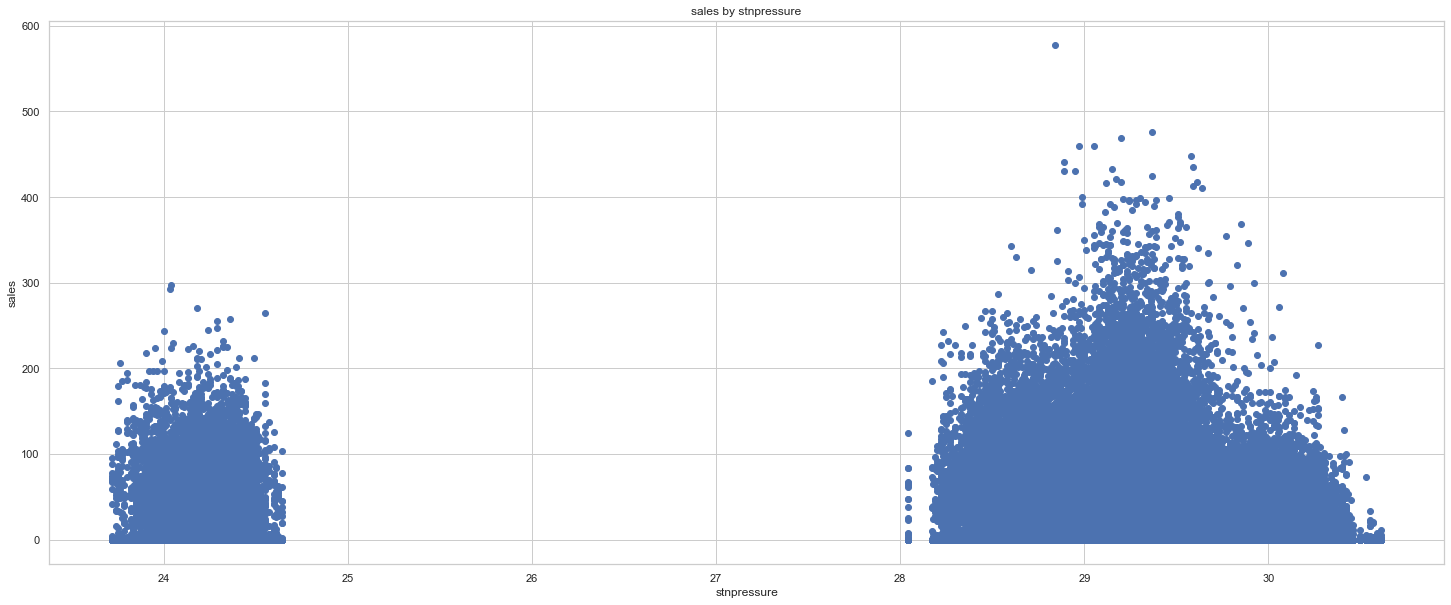

In [164]:
plt.figure(figsize=(25, 10))
plt.scatter(joined_dfs['stnpressure'], joined_dfs['units'])
plt.title("sales by stnpressure")
plt.xlabel("stnpressure")
plt.ylabel("sales")
plt.show()

In [165]:
joined_dfs.loc[joined_dfs['station_nbr'] == 13]['units'].describe()

count   560550.000000
mean         1.151280
std          9.445894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        297.000000
Name: units, dtype: float64

In [166]:
mask = joined_dfs['station_nbr'].isin([13])
not_mask = joined_dfs[~mask]
not_mask['units'].describe()

count   3942276.000000
mean          0.976016
std           9.501037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         577.000000
Name: units, dtype: float64

Let's look at the ratio between the sales average of stores from station 13 and sales of stores from the rest of the stations.
In this calculation, we added a reference to the 2 outliers observed that we removed in the visualization process.

In [167]:
(joined_dfs.loc[joined_dfs['station_nbr'] == 13]['units'].mean() + (((5612+3391) - 24*2) / 560550 ) ) / not_mask['units'].mean()

1.1959392210730222


The pressure feature divides our stores into 2 clusters:
1. Station number 13
2. All other stations.

We found that the average sales of stores associated with Station 13 is 20 percent higher than the average sales of stores associated with other stations.

It can be concluded that low pressure causes an increase in sales.

Also, below it appears that the importance of the pressure feature is the highest of all the features in predicting keysum in section C


<h3>Section D exploring after preprocessing</h3>
<h4>Products sales in rainy days in store 11</h4>
<p>In section D our task is to predict if a day was rainy or not(preciptotal > 0),<br>
based on sales data in this store.<br>
Lest check if there are products that are tend to be saled much more at rainy days.<br></p>

In [168]:
#gattering products which their sales are greater then 0
products_df = section_d_df_merged.iloc[:,2:113]
greater_then0 = products_df.sum() > 0
greater_then0 = greater_then0.loc[greater_then0 == True]
products_names = greater_then0.index

In [169]:
products_names

Index(['product 9', 'product 61', 'product 68', 'product 86', 'product 87',
       'product 110'],
      dtype='object')

<p>We can see that trough the years(2012-2014), only 6 products were sold:<br>
products: 9, 61, 68, 86, 87 and 110</p>

In [170]:
#adding date month and preciptotal columns to datasets that contains daily sales for products that were sold at store 11
df_greater_then0= section_d_df_merged[products_names]
df_greater_then0['date'] = section_d_df_merged['date']
df_greater_then0['month'] = section_d_df_merged['month']
df_greater_then0['preciptotal'] = section_d_df_merged['preciptotal']
df_greater_then0

,product 9,product 61,product 68,product 86,product 87,product 110,date,month,preciptotal
0,74,0,48,0,0,0,2012-01-01,1,0.000000
1,49,0,71,0,0,0,2012-01-02,1,0.000000
2,42,0,52,0,0,0,2012-01-03,1,0.000000
3,60,0,49,0,0,0,2012-01-04,1,0.000000
4,49,1,59,0,0,0,2012-01-05,1,0.000000
...,...,...,...,...,...,...,...,...,...
893,22,0,24,0,1,5,2014-10-27,10,0.000000
894,18,0,11,0,1,0,2014-10-28,10,0.000000
895,46,0,20,0,4,8,2014-10-29,10,0.000000
896,20,0,23,0,3,13,2014-10-30,10,1.000000


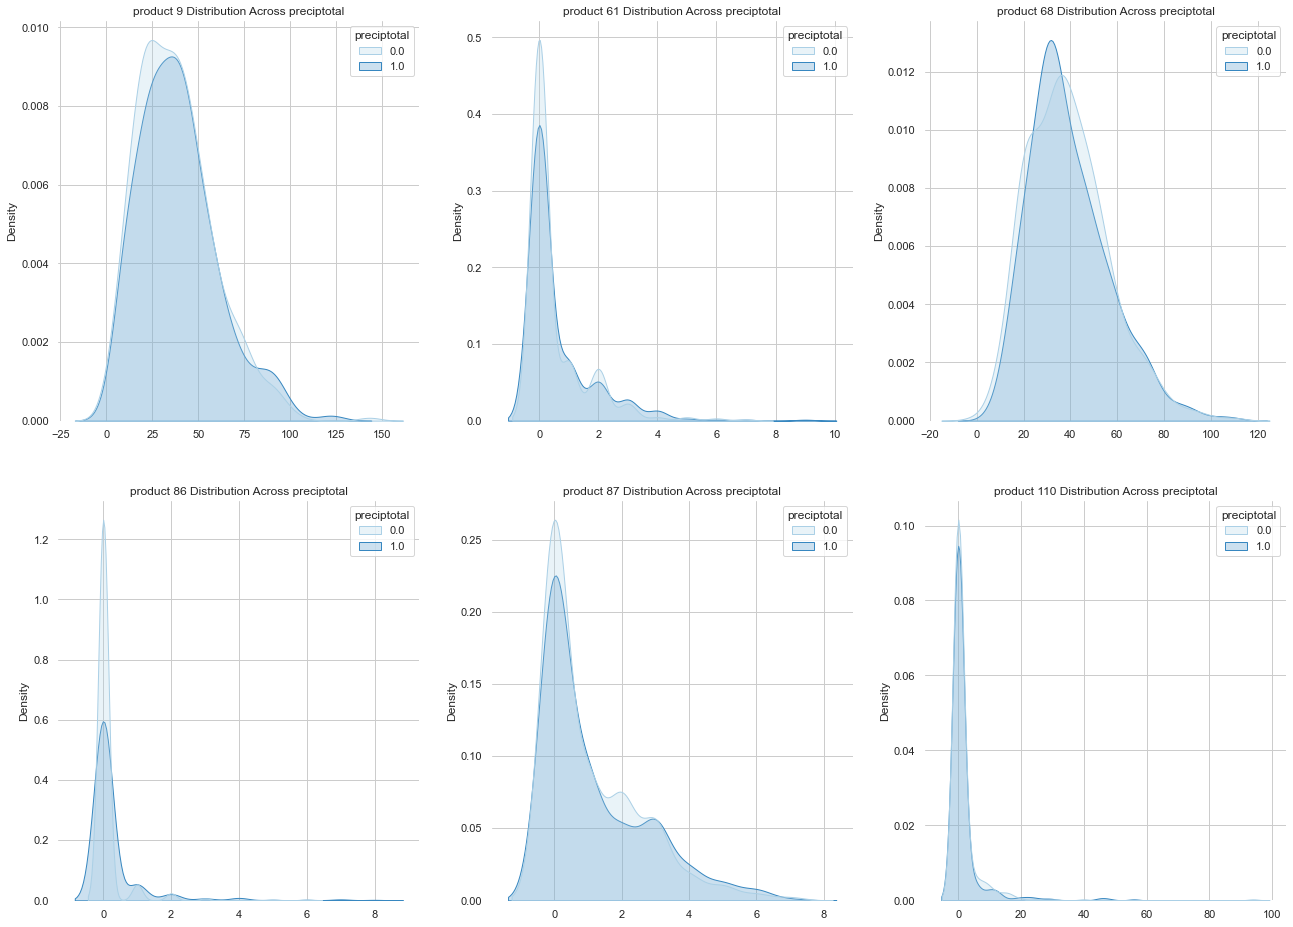

In [171]:
# plot distribution plots for numerical variables, divided by preciptotal(0,1)

plt.figure(figsize=(22, 25))
greater_then0_columns = section_d_df_merged[products_names]

for i in greater_then0_columns:
    plt.subplot(3, 3, greater_then0_columns.columns.get_loc(i)+1)
    sns.kdeplot(df_greater_then0[i], hue=df_greater_then0['preciptotal'], fill=True, palette='Blues', common_norm=True)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title(i + ' Distribution Across preciptotal')

<p>We can see that the distribution is more or less the same for each item across rainy/not rainy days.<br>
But lets print a scatter plot of sales of each item through the dates across rainy/not rainy days<br>
Then lets see the diffarence between the Means of the sales of each product at rainy/not rainy days.
</p>

<h4>product 110</h4>

In [172]:
df_greater_then0

,product 9,product 61,product 68,product 86,product 87,product 110,date,month,preciptotal
0,74,0,48,0,0,0,2012-01-01,1,0.000000
1,49,0,71,0,0,0,2012-01-02,1,0.000000
2,42,0,52,0,0,0,2012-01-03,1,0.000000
3,60,0,49,0,0,0,2012-01-04,1,0.000000
4,49,1,59,0,0,0,2012-01-05,1,0.000000
...,...,...,...,...,...,...,...,...,...
893,22,0,24,0,1,5,2014-10-27,10,0.000000
894,18,0,11,0,1,0,2014-10-28,10,0.000000
895,46,0,20,0,4,8,2014-10-29,10,0.000000
896,20,0,23,0,3,13,2014-10-30,10,1.000000


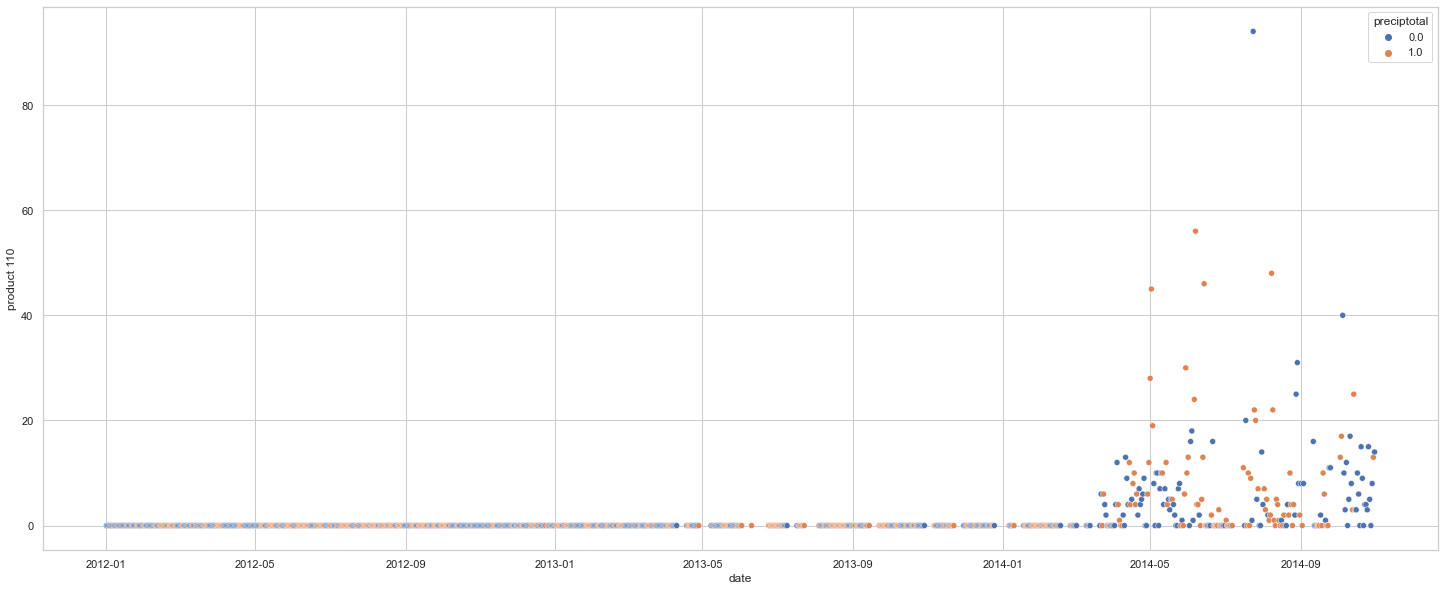

In [173]:
prod110 = pd.DataFrame()
prod110['product 110'] = df_greater_then0['product 110']
prod110['date'] = df_greater_then0['date']
prod110['preciptotal'] = df_greater_then0['preciptotal']
plt.figure(figsize=(25, 10))
sns.scatterplot(x ='date', y ='product 110',hue='preciptotal' ,data= prod110)
plt.show()

<p>We can see that product 110 wasn't being sold at our traning data(2012-2013)<br>
but began to being sold at 2014, and that it tend to be sold more at rainy days<br></p>

In [174]:
prod110.loc[prod110['preciptotal'] == 1]['product 110'].describe()

count   436.000000
mean      1.616972
std       6.045999
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      56.000000
Name: product 110, dtype: float64

In [175]:
prod110.loc[prod110['preciptotal'] == 0]['product 110'].describe()

count   462.000000
mean      1.508658
std       5.927155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      94.000000
Name: product 110, dtype: float64

In [176]:
1.617/1.509

1.0715705765407555

<p>We can also see that product 110 average sales are greater by 7.1% in at rainy days</p>

<h4>product 61</h4>

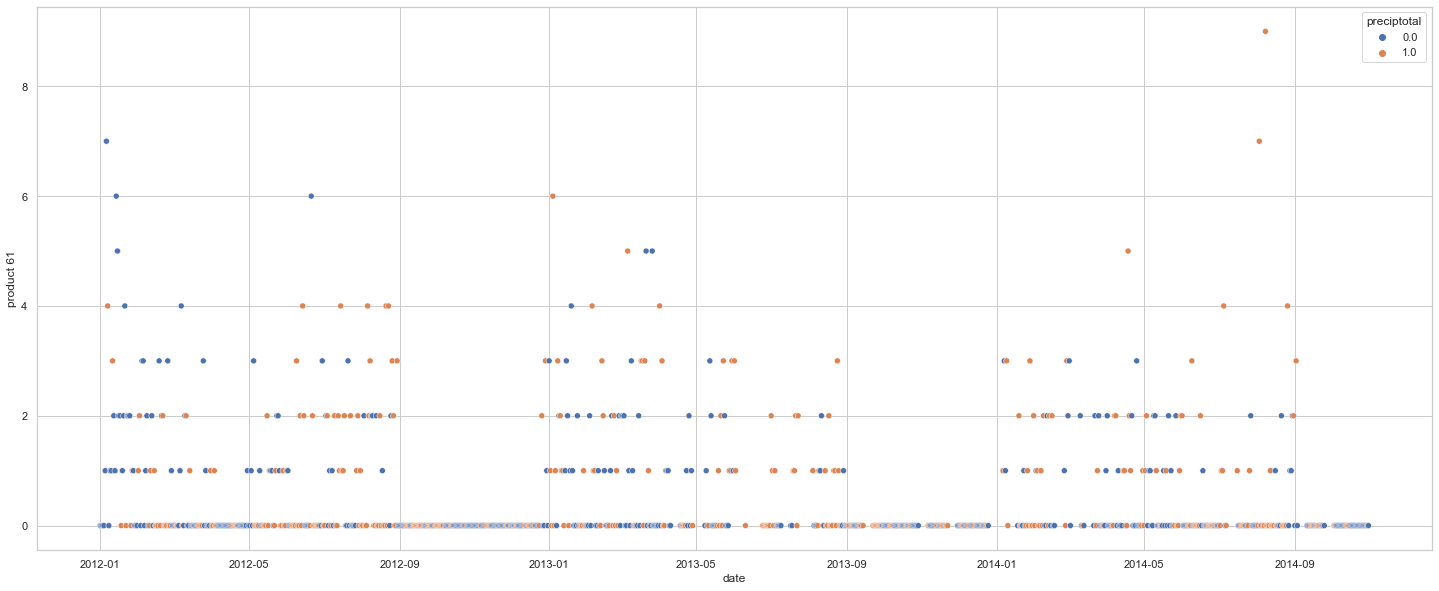

In [177]:
prod61 = pd.DataFrame()
prod61['product 61'] = df_greater_then0['product 61']
prod61['date'] = df_greater_then0['date']
prod61['preciptotal'] = df_greater_then0['preciptotal']
plt.figure(figsize=(25, 10))
sns.scatterplot(x='date', y='product 61', hue='preciptotal', data=prod61)
plt.show()

In [178]:
prod61.loc[prod61['preciptotal'] == 1]['product 61'].describe()

count   436.000000
mean      0.619266
std       1.184961
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       9.000000
Name: product 61, dtype: float64

In [179]:
prod61.loc[prod61['preciptotal'] == 0]['product 61'].describe()

count   462.000000
mean      0.508658
std       1.036707
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       7.000000
Name: product 61, dtype: float64

In [180]:
0.619/0.509

1.2161100196463654

<p>We can see that product 61 average sales are greater by 21% at rainy days</p>

<h4>product 86</h4>

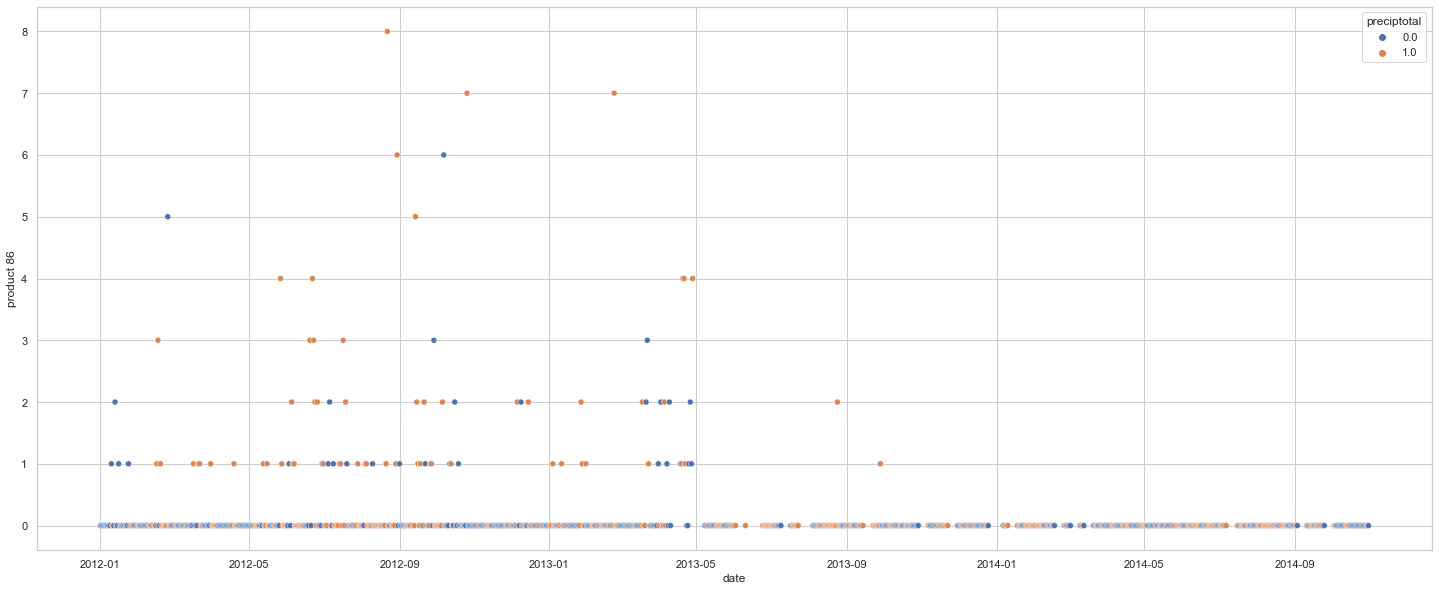

In [181]:
prod86 = pd.DataFrame()
prod86['product 86'] = df_greater_then0['product 86']
prod86['date'] = df_greater_then0['date']
prod86['preciptotal'] = df_greater_then0['preciptotal']
plt.figure(figsize=(25, 10))
sns.scatterplot(x='date', y='product 86', hue='preciptotal', data=prod86)
plt.show()

<p>We can see that product 86 tend to being sold more at rainy days, but it was stopped be sold at 2014(test data)</p>

In [182]:
prod86.loc[prod86['preciptotal'] == 1]['product 86'].describe()

count   436.000000
mean      0.284404
std       0.945326
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       8.000000
Name: product 86, dtype: float64

In [183]:
prod86.loc[prod86['preciptotal'] == 0]['product 86'].describe()

count   462.000000
mean      0.110390
std       0.517314
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       6.000000
Name: product 86, dtype: float64

In [184]:
0.284/0.110

2.5818181818181816

<p>We can see that product 86 average sales are greater by 158%! at rainy days</p>

<h4>product 87</h4>

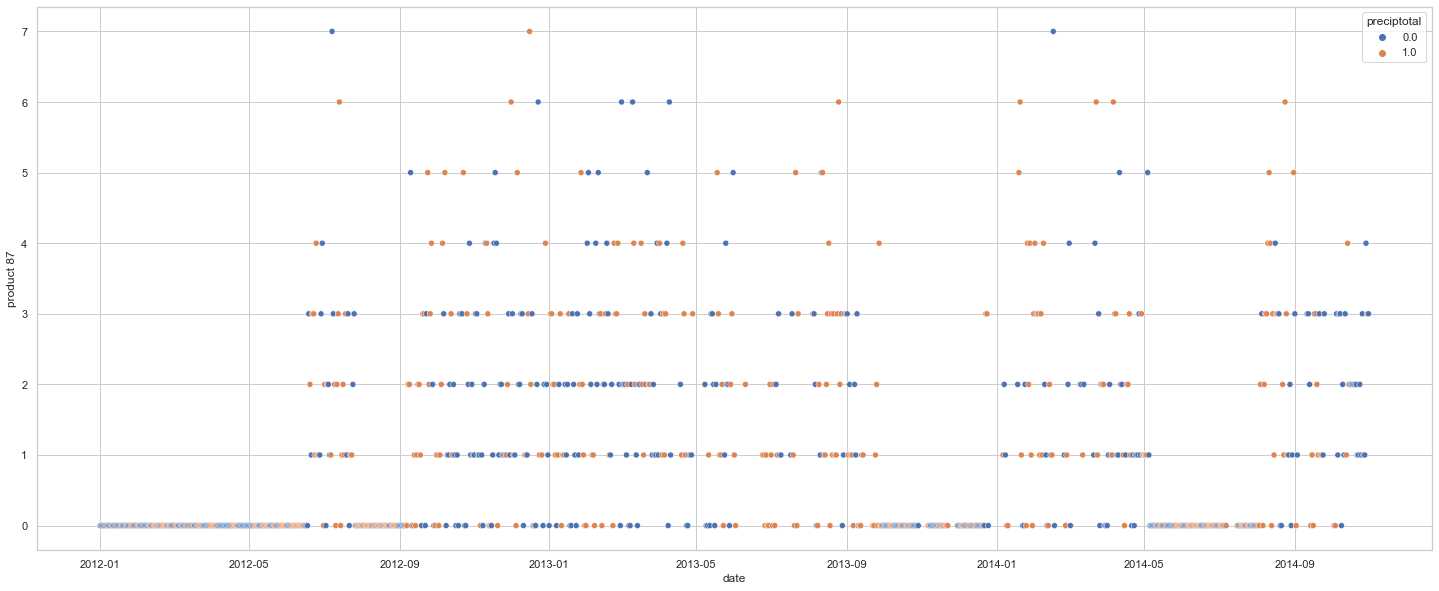

In [185]:
prod87 = pd.DataFrame()
prod87['product 87'] = df_greater_then0['product 87']
prod87['date'] = df_greater_then0['date']
prod87['preciptotal'] = df_greater_then0['preciptotal']
plt.figure(figsize=(25, 10))
sns.scatterplot(x='date', y='product 87', hue='preciptotal', data=prod87)
plt.show()

In [186]:
prod87.loc[prod87['preciptotal'] == 1]['product 87'].describe()

count   436.000000
mean      1.158257
std       1.540324
min       0.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       7.000000
Name: product 87, dtype: float64

In [187]:
prod87.loc[prod87['preciptotal'] == 0]['product 87'].describe()

count   462.000000
mean      1.062771
std       1.439435
min       0.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       7.000000
Name: product 87, dtype: float64

In [188]:
1.158/1.063

1.0893697083725304

<p>We can see that product 87 average sales are greater than 8.9% at rainy days</p>

<h4>product 68</h4>

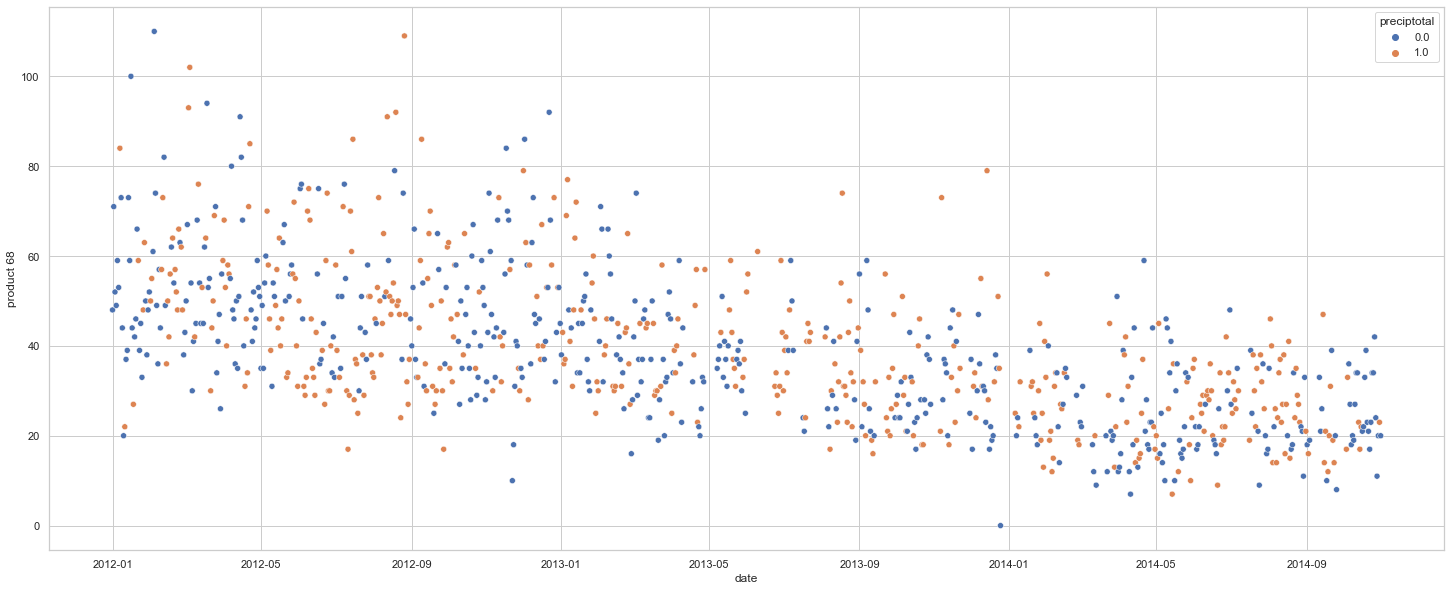

In [189]:
prod68 = pd.DataFrame()
prod68['product 68'] = df_greater_then0['product 68']
prod68['date'] = df_greater_then0['date']
prod68['preciptotal'] = df_greater_then0['preciptotal']
plt.figure(figsize=(25, 10))
sns.scatterplot(x='date', y='product 68', hue='preciptotal', data=prod68)
plt.show()

In [190]:
prod68.loc[prod68['preciptotal'] == 1]['product 68'].describe()

count   436.000000
mean     39.330275
std      16.989411
min       7.000000
25%      28.000000
50%      35.500000
75%      49.000000
max     109.000000
Name: product 68, dtype: float64

In [191]:
prod68.loc[prod68['preciptotal'] == 0]['product 68'].describe()

count   462.000000
mean     38.811688
std      17.225732
min       0.000000
25%      25.250000
50%      37.000000
75%      49.000000
max     110.000000
Name: product 68, dtype: float64

In [192]:
39.330/38.812

1.0133463877151396

<p>We can see that product 68 average sales are greater by 1.3% at rainy days</p>

<h4>product 9</h4>

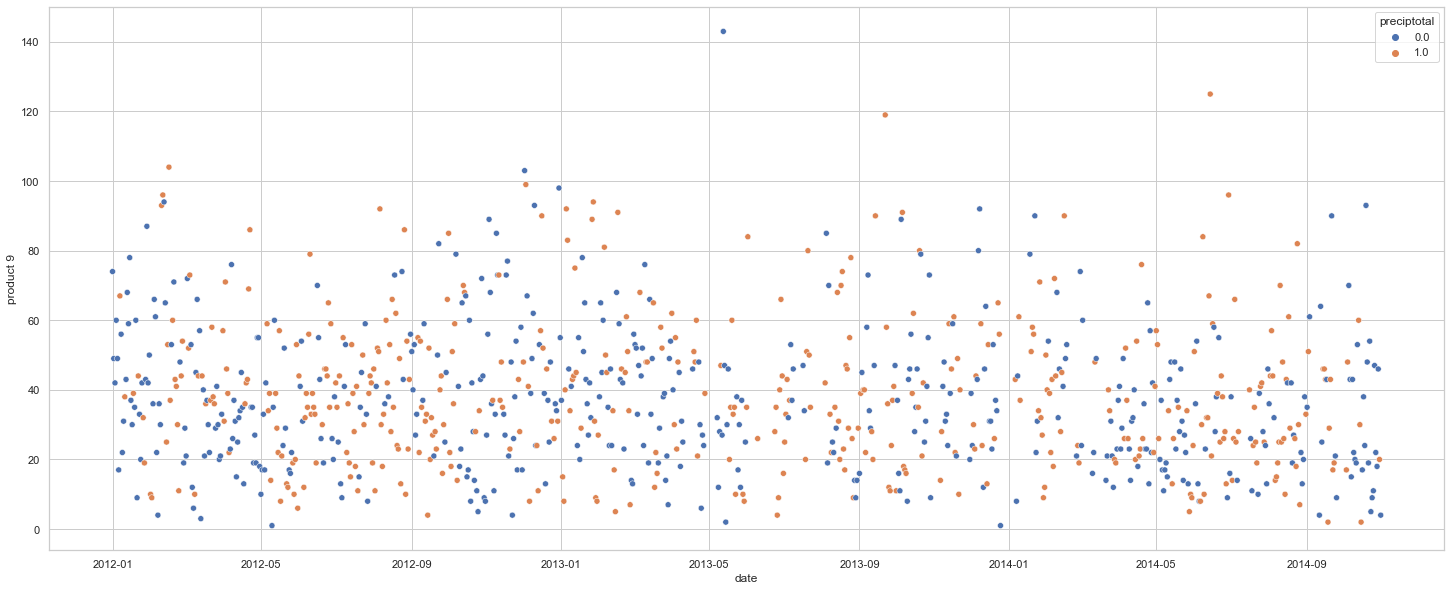

In [193]:
prod9 = pd.DataFrame()
prod9['product 9'] = df_greater_then0['product 9']
prod9['date'] = df_greater_then0['date']
prod9['preciptotal'] = df_greater_then0['preciptotal']
plt.figure(figsize=(25, 10))
sns.scatterplot(x='date', y='product 9', hue='preciptotal', data=prod9)
plt.show()

In [194]:
prod9.loc[prod9['preciptotal'] == 1]['product 9'].describe()

count   436.000000
mean     38.766055
std      21.358039
min       2.000000
25%      23.000000
50%      36.000000
75%      51.000000
max     125.000000
Name: product 9, dtype: float64

In [195]:
prod9.loc[prod9['preciptotal'] == 0]['product 9'].describe()

count   462.000000
mean     37.231602
std      20.728920
min       1.000000
25%      22.000000
50%      35.000000
75%      48.750000
max     143.000000
Name: product 9, dtype: float64

In [196]:
38.766/37.232

1.0412011173184357

<p>We can see that product 9 average sales are greater by 4.1% at rainy days</p>

<h3>Dropping not relevant features</h3>
<p>Becaues we saw that besides products 9, 68, 87, 86 and 61 all the sales are 0 in our traning data for section D<br>
we can drop all the items besides them becaues they wont contribute to our classificetion task.
</p>

In [197]:
relevant_feautres_list = ['month','product 9','product 68','product 87','product 86','product 61']

In [198]:
trainD_x = trainD_x[relevant_feautres_list]
testD_x = testD_x[relevant_feautres_list]

<h2 id="sectioncpredicting">Section C - Unit Sales Prediction</h2>
<h3>Tasks</h3>
<p>
Sum up the unit sales of product 5, 6, 9, 16, 45 to a new value called key_sum.<br>
Use at least two different machine learning models to predict the daily sales<br>
figures of key_sum per store on a given day using the weather and sales data<br>
<br>
</p>

<h3 id="modelspredicting">Checking different ML models</h3>
<p>we will use different ML models and evaluating them by measuring their MSE and R^2 values,<br>
the model that will give us the lowest MSE value will be chosen<br>
the R^2 metric is for giving us a evaluation of how much good is the model by giving us a scoree<br>
between 0(worst) and 1(best)</p>

<h3>Utils functions</h3>

In [199]:
#this function return a list of most important features for a given  model features important dataframe(imp)
def important_feaures(imp):
    feat_list = reversed(imp.index)
    impo_feats = list()
    for feat_impo in feat_list:
        if imp.loc[imp.index == feat_impo].values[0][0] > 0:
            impo_feats.append(feat_impo)
    return impo_feats

In [200]:
#this function get ml model and train data and print plot of importance for each feature and return a feature importance df
def feat_importance(grid_search, train_x, train_y):
    # get feature importance
    imp = pd.DataFrame(grid_search.best_estimator_.fit(train_x, train_y).feature_importances_,
                       index=train_x.columns, columns=['Importance']).sort_values('Importance')
    greater_then_0 = imp.loc[imp['Importance'] > 0.002]
    # plot feature importance
    plt.figure(figsize=(10, 10))
    plt.barh(range(0, len(greater_then_0)), greater_then_0['Importance'], color='#9ecae1')
    plt.grid(axis='x', alpha=0.5, color='lightgrey')
    plt.yticks(range(0, len(greater_then_0)), greater_then_0.index)
    plt.title('Feature Importance', fontsize=14)
    plt.show()
    return imp

<p>Now we will build the models and predict key sum values for each one of them.</p>

<h3>Regression Tree</h3>

In [201]:
def reg_tree(train_x, train_y, test_x, test_y):
    # define model
    dt = DecisionTreeRegressor(random_state=RSEED)

    # define parameter grid
    parameters_grid = {
        'max_depth': [14, 13, 10, 8],
        'min_samples_leaf': [20, 30, 40, 50],
    }

    # define grid search
    grid_search = GridSearchCV(estimator=dt, param_grid=parameters_grid, cv=10)

    # fit estimator
    start_time = time.time()
    grid_search.fit(train_x, train_y)
    print("sklearn regressor fit time %s seconds ---" % (time.time() - start_time))
    # get best estimator
    best = grid_search.best_estimator_

    # print best parameters
    print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

    # predict
    y_pred = best.predict(test_x)
    y_pred_after_exp = list()
    #return log predictions to the original range of values
    for pred in y_pred:
        y_pred_after_exp.append(exp(pred))

    # calculate MSE
    MSE = round(mean_squared_error(test_y, y_pred_after_exp), 3)
    R2 = r2_score(test_y, y_pred_after_exp)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    df = pd.DataFrame([MSE, R2]).T
    df = df.rename(index={0: 'Decision Tree Regressor'}, columns={0: 'MSE', 1: 'R^2'})
    print(df)
    return MSE, R2, grid_search, y_pred_after_exp

<p>builidng regerssion tree then predicting values and printing MSE, R^2, and run time</p>

In [202]:
regMSE, regR2, reg_gridsearch, reg_predicted_vals = reg_tree(trainC_x, trainC_y, testC_x, testC_y)

sklearn regressor fit time 35.2746856212616 seconds ---
                max_depth  min_samples_leaf
Selected Value         13                20
                             MSE   R^2
Decision Tree Regressor 1116.955 0.556


<p>Now we will print a plot that show the diffrences between the real and predicted values</p>

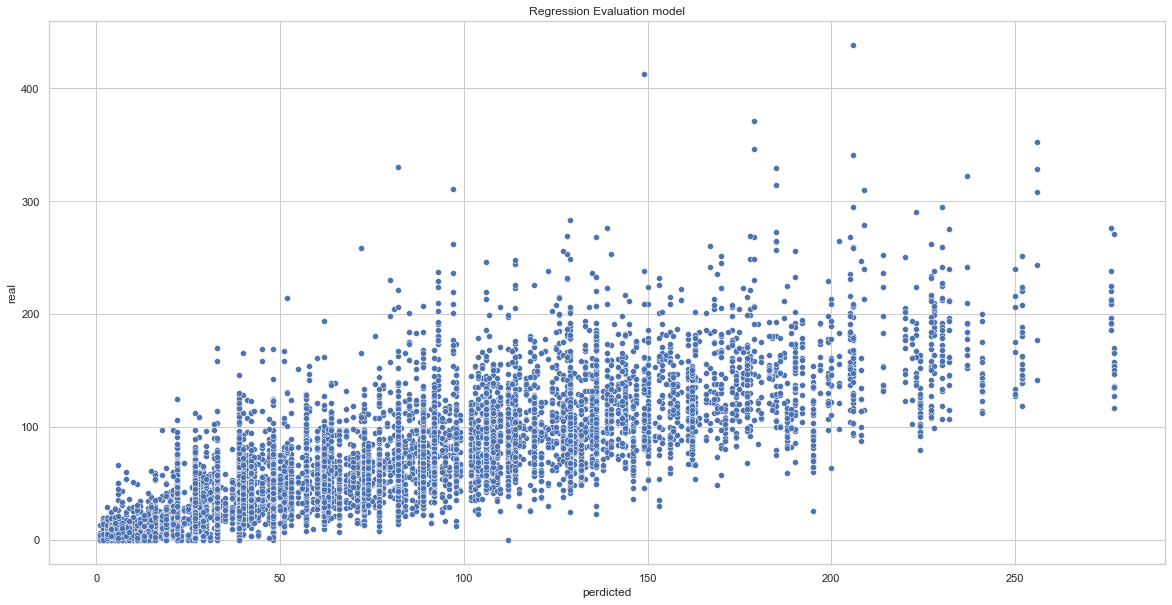

In [203]:
reals_vals = dict()
reals_vals['real'] =  testC_y.values
# reals_vals['index'] = range(0, len(testC_y))
# reals_vals['type'] = 'real'
predicted_vals = dict()
predicted_vals['perdicted'] = reg_predicted_vals
# predicted_vals['index'] = range(0,len(reg_predicted_vals))
# predicted_vals['type'] = 'predicted'

real_df = pd.DataFrame(reals_vals)
pred_df = pd.DataFrame(predicted_vals)

evaluation_reg_df = pd.concat([real_df,pred_df], axis=1 )

plt.figure(figsize=(20, 10))
sns.scatterplot(data=evaluation_reg_df, x="perdicted", y="real").set(title = 'Regression Evaluation model')
plt.show()

In [204]:
evaluation_reg_df

,real,perdicted
0,54.000,42
1,5.000,31
2,54.000,32
3,60.000,60
4,44.000,39
...,...,...
10869,50.000,27
10870,33.000,7
10871,15.000,7
10872,12.000,7


<h5>features importance</h5>
<p>We chose to show only featuers that their importance is greater than 0.002 due to high dimensions</p>

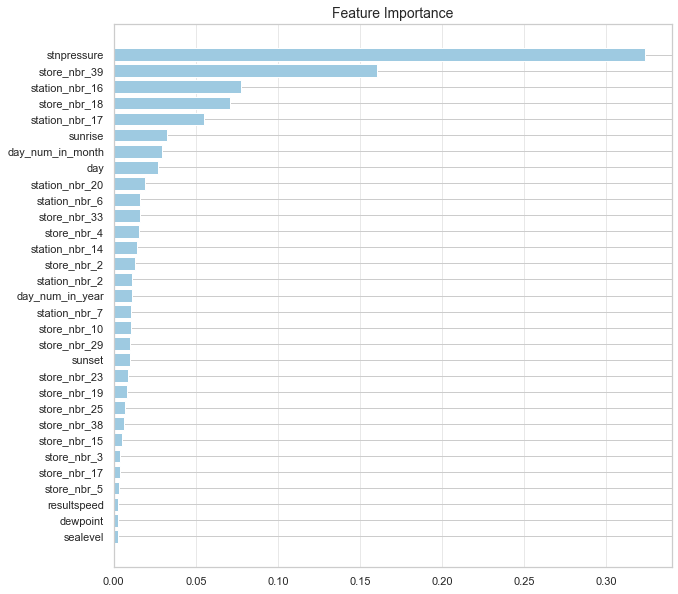

In [205]:
reg_imp = feat_importance(reg_gridsearch, trainC_x, trainC_y)

<h3>Gradiant Boost</h3>

In [206]:
def g_boost(train_x, train_y, test_x, test_y):
    # define model
    gb = GradientBoostingRegressor(random_state=RSEED)

    # define parameter grid
    parameters_grid = {
        'learning_rate': [0.5, 1, 1.5],
        'n_estimators': [30, 60, 100],
    }

    # define grid search
    grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)

    start_time = time.time()
    # fit estimator
    grid_search.fit(train_x, train_y)
    print("sklearn gradiant boost fit time %s seconds ---" % (time.time() - start_time))

    # get best estimator
    best = grid_search.best_estimator_

    # print best parameters
    print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

    # predict
    y_pred = best.predict(test_x)
    y_pred_after_exp = list()
    #return log predictions to the original range of values
    for pred in y_pred:
        y_pred_after_exp.append(exp(pred))

    MSE = round(mean_squared_error(test_y, y_pred_after_exp), 3)
    R2 = r2_score(test_y, y_pred_after_exp)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    df = pd.DataFrame([MSE, R2]).T
    df = df.rename(index={0: 'Gradiant Boost Regressor'}, columns={0: 'MSE', 1: 'R^2'})
    print(df)
    return MSE, R2, grid_search, y_pred_after_exp

<p>builidng gradient boost then predicting values and printing MSE, R^2, and run time</p>

In [207]:
gradient_MSE, gradient_R2, gradient_gridsearch, gradient_predicted_vals= g_boost(trainC_x, trainC_y, testC_x, testC_y)

sklearn gradiant boost fit time 394.55305576324463 seconds ---
                learning_rate  n_estimators
Selected Value          0.500       100.000
                             MSE   R^2
Gradiant Boost Regressor 936.489 0.627


<p>Now we will print a plot that show the diffrences between the real and predicted values</p>

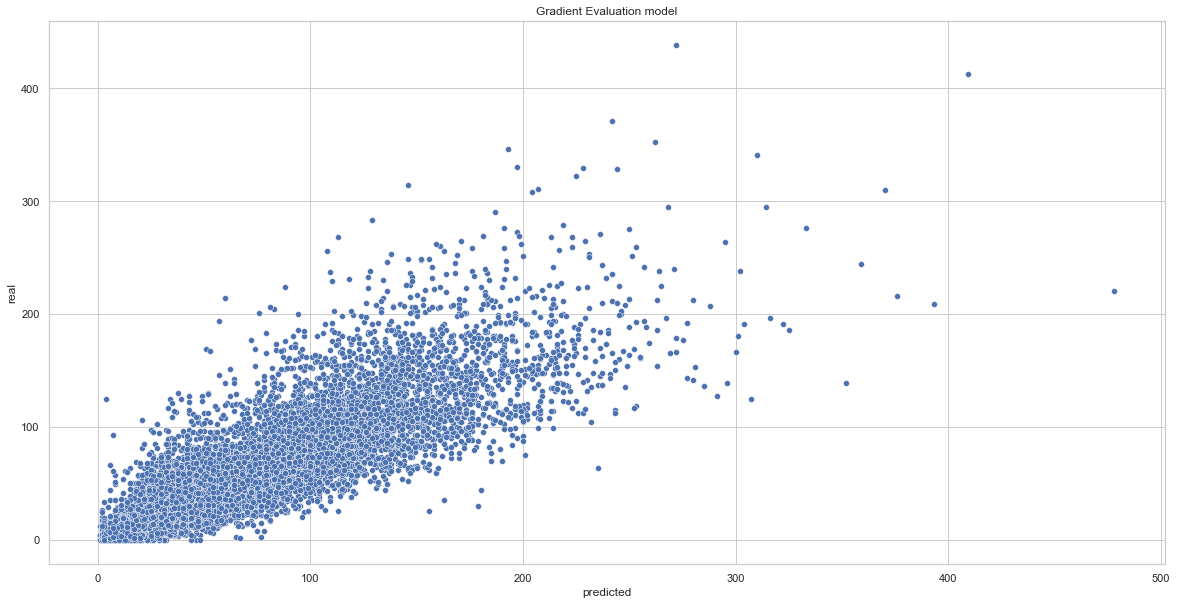

In [208]:
reals_vals = dict()
reals_vals['real'] =  testC_y.values
# reals_vals['index'] = range(0, len(testC_y))
# reals_vals['type'] = 'real'
predicted_vals = dict()
predicted_vals['predicted'] = gradient_predicted_vals
# predicted_vals['index'] = range(0,len(gradient_predicted_vals))
# predicted_vals['type'] = 'predicted'

real_df = pd.DataFrame(reals_vals)
pred_df = pd.DataFrame(predicted_vals)

evaluation_reg_df = pd.concat([real_df,pred_df], axis=1 )

plt.figure(figsize=(20, 10))
sns.scatterplot(data=evaluation_reg_df, x="predicted", y="real").set(title = 'Gradient Evaluation model')
plt.show()

<h5>features importance</h5>
<p>We chose to show only featuers that their importance is greater than 0.002 due to high dimensions</p>

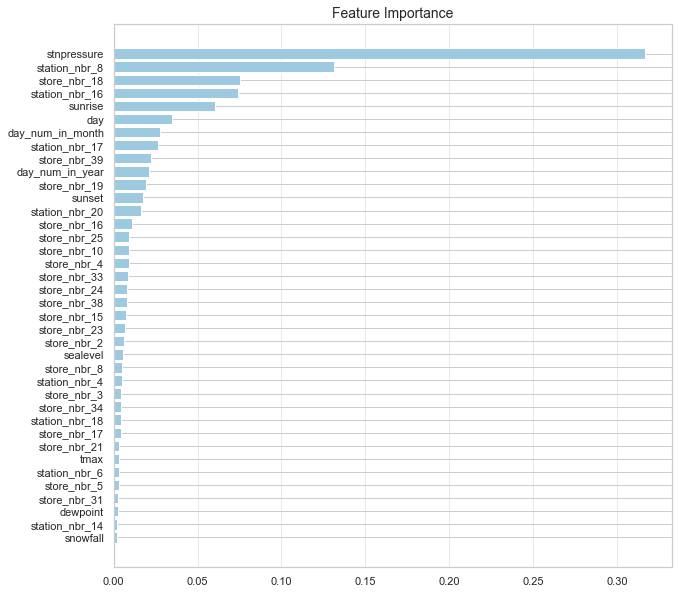

In [209]:
gradient_imp = feat_importance(gradient_gridsearch, trainC_x, trainC_y)

<h3>Random Forest</h3>

In [210]:
def r_forest(train_x, train_y, test_x, test_y):
    rf = RandomForestRegressor(random_state=RSEED)

    # define parameter grid
    parameters_grid = {
        'max_depth': [5, 8, 13, 14],
        'min_samples_split': [15, 30],
        'n_estimators': [20, 50]
    }

    # define grid search
    grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)

    # fit estimator
    start_time = time.time()
    grid_search.fit(train_x, train_y)
    print("sklearn gradiant boost fit time %s seconds ---" % (time.time() - start_time))

    # get best estimator
    best = grid_search.best_estimator_

    # print best parameters
    print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

    # predict
    y_pred = best.predict(test_x)
    y_pred_after_exp = list()
    #return log predictions to the original range of values
    for pred in y_pred:
        y_pred_after_exp.append(exp(pred))

    MSE = round(mean_squared_error(test_y, y_pred_after_exp), 3)
    R2 = r2_score(test_y, y_pred_after_exp)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    df = pd.DataFrame([MSE, R2]).T
    df = df.rename(index={0: 'Random Forest Regressor'}, columns={0: 'MSE', 1: 'R^2'})
    print(df)
    return MSE, R2, grid_search, y_pred_after_exp

<p>builidng random forest then predicting values and printing MSE, R^2, and run time</p>

In [211]:
forset_MSE, forset_R2, forset_gridsearch ,random_forest_predicted_vals= r_forest(trainC_x, trainC_y, testC_x, testC_y)

sklearn gradiant boost fit time 681.3954029083252 seconds ---
                max_depth  min_samples_split  n_estimators
Selected Value         14                 15            50
                            MSE   R^2
Random Forest Regressor 951.759 0.621


<p>Now we will print a plot that show the diffrences between the real and predicted values</p>


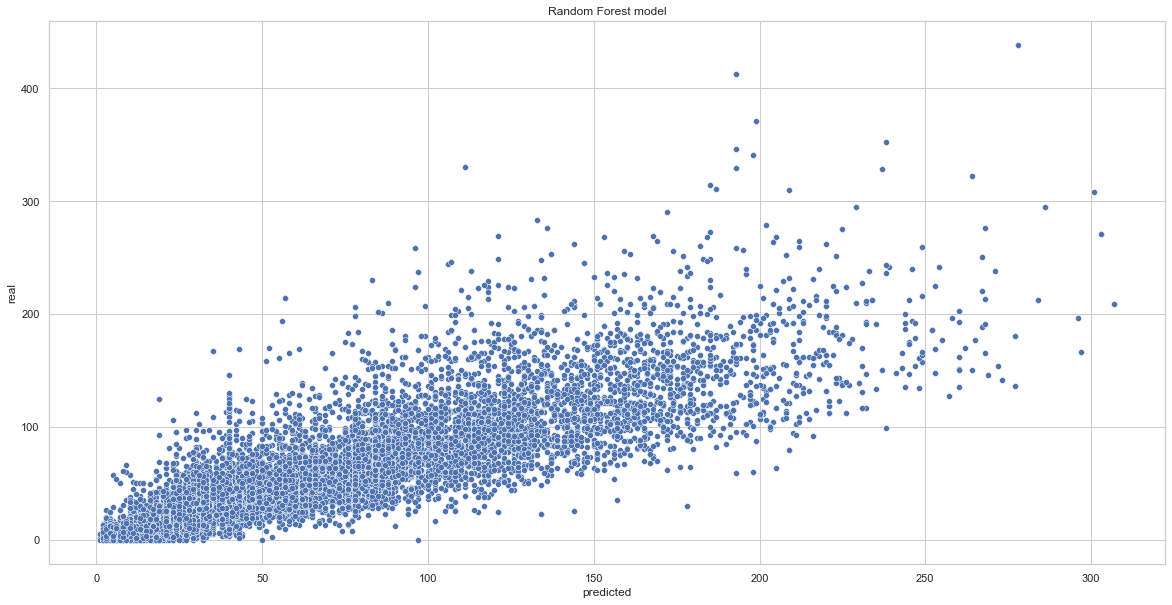

In [212]:
reals_vals = dict()
reals_vals['real'] =  testC_y.values
# reals_vals['index'] = range(0, len(testC_y))
# reals_vals['type'] = 'real'
predicted_vals = dict()
predicted_vals['predicted'] = random_forest_predicted_vals
# predicted_vals['index'] = range(0,len(random_forest_predicted_vals))
# predicted_vals['type'] = 'predicted'

real_df = pd.DataFrame(reals_vals)
pred_df = pd.DataFrame(predicted_vals)

evaluation_reg_df = pd.concat([real_df,pred_df], axis=1 )

plt.figure(figsize=(20, 10))
sns.scatterplot(data=evaluation_reg_df, x="predicted", y="real").set(title = 'Random Forest model')
plt.show()

<h5>features importance</h5>
<p>We chose to show only featuers that their importance is greater than 0.002 due to high dimensions</p>

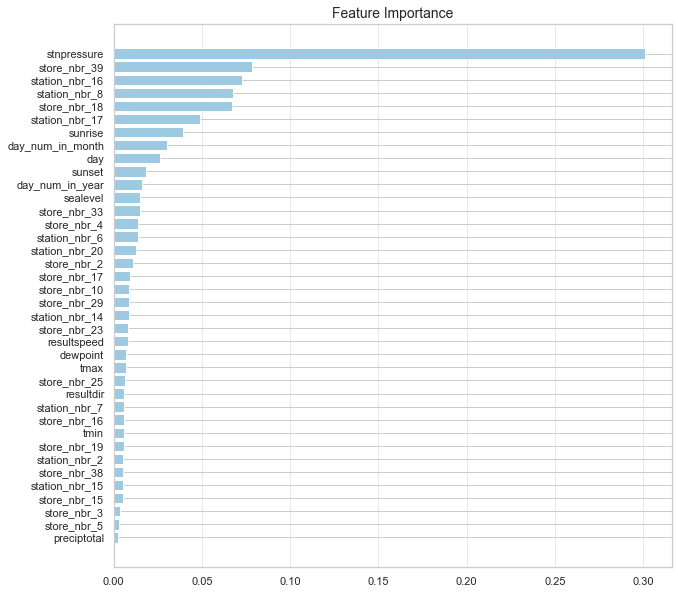

In [213]:
forest_imp = feat_importance(forset_gridsearch, trainC_x, trainC_y)

<h3>Ada boost</h3>

In [214]:
def ada_boost(train_x, train_y, test_x, test_y):
    # define model
    ab = AdaBoostRegressor(random_state=RSEED)

    # define parameter grid
    parameters_grid = {
        'n_estimators': [30, 15, 10]
    }

    # define grid search
    grid_search = GridSearchCV(estimator=ab, param_grid=parameters_grid, cv=10)
    # fit estimator
    start_time = time.time()
    grid_search.fit(train_x, train_y)
    print("sklearn Ada boost fit time %s seconds ---" % (time.time() - start_time))

    # get best estimator
    best = grid_search.best_estimator_

    # print best parameters
    print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

    # predict
    y_pred = best.predict(test_x)
    y_pred_after_exp = list()
    #return log predictions to the original range of values
    for pred in y_pred:
        y_pred_after_exp.append(exp(pred))

    MSE = round(mean_squared_error(test_y, y_pred_after_exp), 3)
    R2 = r2_score(test_y, y_pred_after_exp)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    df = pd.DataFrame([MSE, R2]).T
    df = df.rename(index={0: 'AdaBoost Regressor'}, columns={0: 'MSE', 1: 'R^2'})
    print(df)
    return MSE, R2, grid_search, y_pred_after_exp


<p>builidng adaboost then predicting values and printing MSE, R^2, and run time</p>

In [215]:
ada_MSE, ada_R2, ada_gridsearch , Adaboost_predicted_vals= ada_boost(trainC_x, trainC_y, testC_x, testC_y)

sklearn Ada boost fit time 74.80786991119385 seconds ---
                n_estimators
Selected Value            10
                        MSE   R^2
AdaBoost Regressor 1867.676 0.257


<p>Now we will print a plot that show the diffrences between the real and predicted values</p>

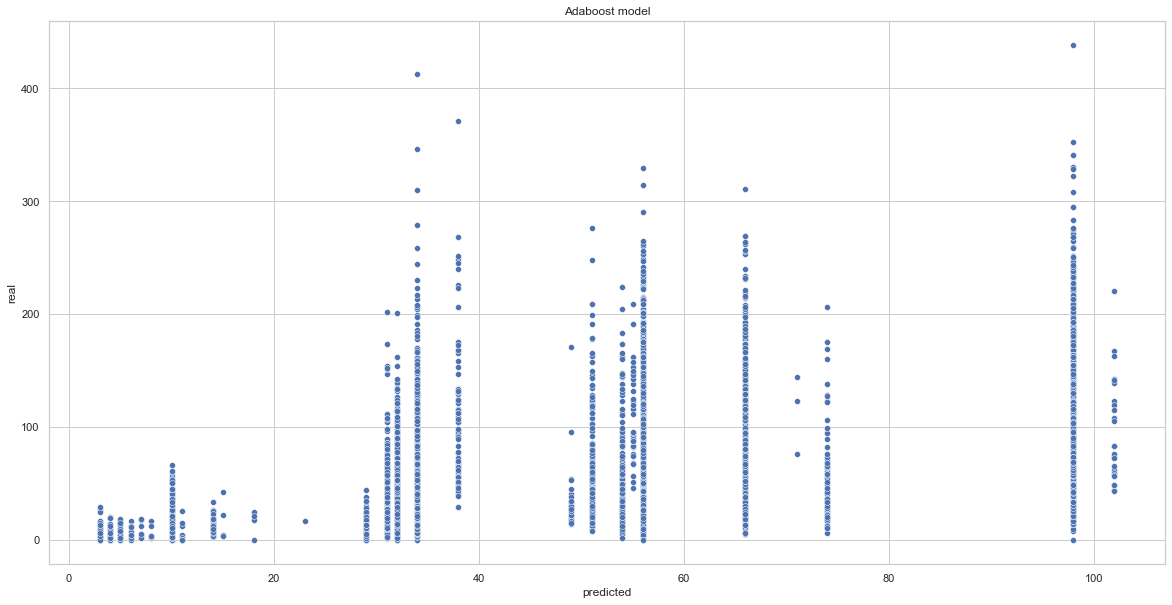

In [216]:
reals_vals = dict()
reals_vals['real'] =  testC_y.values
# reals_vals['index'] = range(0, len(testC_y))
# reals_vals['type'] = 'real'
predicted_vals = dict()
predicted_vals['predicted'] = Adaboost_predicted_vals
# predicted_vals['index'] = range(0,len(Adaboost_predicted_vals))
# predicted_vals['type'] = 'predicted'

real_df = pd.DataFrame(reals_vals)
pred_df = pd.DataFrame(predicted_vals)

evaluation_reg_df = pd.concat([real_df,pred_df], axis=1 )

plt.figure(figsize=(20, 10))
sns.scatterplot(data=evaluation_reg_df, x="predicted", y="real").set(title = 'Adaboost model')
plt.show()

<h5>features importance</h5>
<p>We chose to show only featuers that their importance is greater than 0.002 due to high dimensions</p>

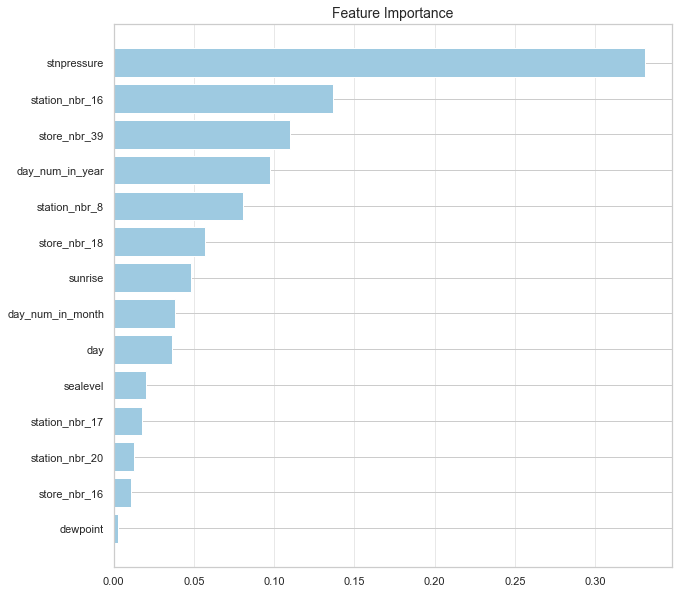

In [217]:
ada_imp = feat_importance(ada_gridsearch, trainC_x, trainC_y)

<h3 id="comparing">Comparing models results<h3>

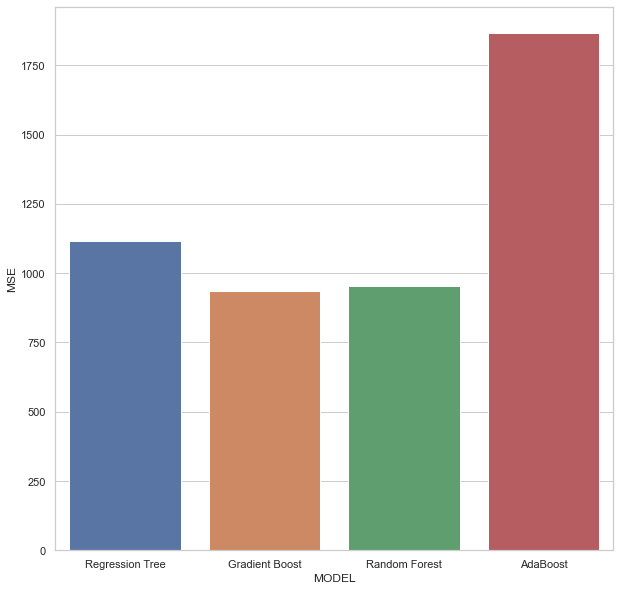

In [218]:
mse_dict = {"MSE": [regMSE, gradient_MSE, forset_MSE, ada_MSE],
            "MODEL": ["Regression Tree", "Gradient Boost", "Random Forest", "AdaBoost"]}
mse_df = pd.DataFrame(mse_dict)
# visualize the target variable
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="MODEL", y="MSE", data=mse_df)
plt.show()

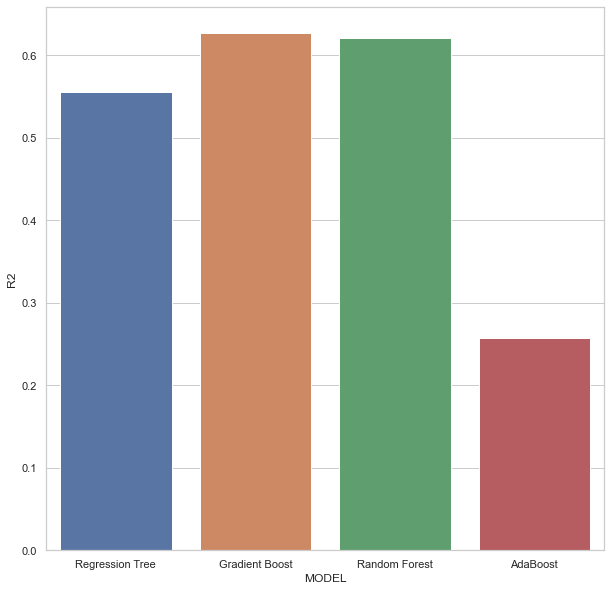

In [219]:
R2_dict = {"R2": [regR2, gradient_R2, forset_R2, ada_R2],
           "MODEL": ["Regression Tree", "Gradient Boost", "Random Forest", "AdaBoost"]}
R2_df = pd.DataFrame(R2_dict)
# visualize the target variable
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="MODEL", y="R2", data=R2_df)
plt.show()

<h3 id="summary">Models performances Summary</h3>
<p>
We tried 4 regression models to predict key sum values per store per date, <br>
based on weather and sales datasets.<br>
We evaluated them using R^2 and MSE metrics, As we can see at the plots above <br>
the best models are Gradient boost and Random forest after it.<br>
Now will try to maximazie the scores of those models.
</p>

<h3 id="featuresimportancerun">Running the 2 best models again with selecting features based on importance<h3>
<p>In order to try to minimazie the run time we selected
only the independent variables <br>that thier importance in building the previuse models was higher then 0.<br>
</p>

<h3>Selecting features</h3

In [220]:
grad_impfeatures = important_feaures(gradient_imp)
rand_impfeatures = important_feaures(forest_imp)

In [221]:
grad_impfeatures

['stnpressure',
 'station_nbr_8',
 'store_nbr_18',
 'station_nbr_16',
 'sunrise',
 'day',
 'day_num_in_month',
 'station_nbr_17',
 'store_nbr_39',
 'day_num_in_year',
 'store_nbr_19',
 'sunset',
 'station_nbr_20',
 'store_nbr_16',
 'store_nbr_25',
 'store_nbr_10',
 'store_nbr_4',
 'store_nbr_33',
 'store_nbr_24',
 'store_nbr_38',
 'store_nbr_15',
 'store_nbr_23',
 'store_nbr_2',
 'sealevel',
 'store_nbr_8',
 'station_nbr_4',
 'store_nbr_3',
 'store_nbr_34',
 'station_nbr_18',
 'store_nbr_17',
 'store_nbr_21',
 'tmax',
 'station_nbr_6',
 'store_nbr_5',
 'store_nbr_31',
 'dewpoint',
 'station_nbr_14',
 'snowfall',
 'tmin',
 'cool',
 'resultspeed',
 'store_nbr_20',
 'store_nbr_43',
 'resultdir',
 'store_nbr_22',
 'store_nbr_14',
 'store_nbr_9',
 'preciptotal',
 'store_nbr_45',
 'HZ',
 'store_nbr_27',
 'store_nbr_41',
 'store_nbr_6',
 'store_nbr_29',
 'store_nbr_32',
 'station_nbr_9',
 'store_nbr_13',
 'store_nbr_37',
 'BR',
 'store_nbr_40',
 'store_nbr_30',
 'store_nbr_44',
 'store_nbr_26

In [222]:
rand_impfeatures

['stnpressure',
 'store_nbr_39',
 'station_nbr_16',
 'station_nbr_8',
 'store_nbr_18',
 'station_nbr_17',
 'sunrise',
 'day_num_in_month',
 'day',
 'sunset',
 'day_num_in_year',
 'sealevel',
 'store_nbr_33',
 'store_nbr_4',
 'station_nbr_6',
 'station_nbr_20',
 'store_nbr_2',
 'store_nbr_17',
 'store_nbr_10',
 'store_nbr_29',
 'station_nbr_14',
 'store_nbr_23',
 'resultspeed',
 'dewpoint',
 'tmax',
 'store_nbr_25',
 'resultdir',
 'station_nbr_7',
 'store_nbr_16',
 'tmin',
 'store_nbr_19',
 'station_nbr_2',
 'store_nbr_38',
 'station_nbr_15',
 'store_nbr_15',
 'store_nbr_3',
 'store_nbr_5',
 'preciptotal',
 'store_nbr_26',
 'cool',
 'snowfall',
 'store_nbr_20',
 'FG',
 'store_nbr_43',
 'store_nbr_40',
 'store_nbr_22',
 'month',
 'FG+',
 'station_nbr_3',
 'store_nbr_24',
 'HZ',
 'store_nbr_34',
 'BR',
 'RA',
 'station_nbr_18',
 'MODERATE',
 'store_nbr_9',
 'DZ',
 'store_nbr_45',
 'store_nbr_8',
 'SN',
 'station_nbr_4',
 'VC',
 'store_nbr_36',
 'store_nbr_31',
 'TS',
 'DU',
 'station_nbr_

<h3>Define new train X and test X</h3>

In [223]:
new_grad_trainx = trainC_x[grad_impfeatures]
new_grad_testx = testC_x[grad_impfeatures]
new_rand_trainx = trainC_x[rand_impfeatures]
new_rand_testx = testC_x[rand_impfeatures]

<h3>checking the models</h3>

<h3>Gradient boost</h3>

In [224]:
new_gradient_MSE, new_gradient_R2, new_gradient_gridsearch, new_gradient_predicted_vals= g_boost(new_grad_trainx, trainC_y, new_grad_testx, testC_y)

sklearn gradiant boost fit time 323.155398607254 seconds ---
                learning_rate  n_estimators
Selected Value          0.500       100.000
                             MSE   R^2
Gradiant Boost Regressor 932.651 0.629


<h3>Random forest</h3>

In [225]:
new_forset_MSE, new_forset_R2, new_forset_gridsearch ,new_random_forest_predicted_vals= r_forest(new_rand_trainx, trainC_y, new_rand_testx, testC_y)

sklearn gradiant boost fit time 666.1491792201996 seconds ---
                max_depth  min_samples_split  n_estimators
Selected Value         14                 30            50
                            MSE   R^2
Random Forest Regressor 954.430 0.620


<p>We can see that the MSE and R^2 are the same, but we can see the run time is shorter by <br>
approximately 25%.</p>


<h2 id="sectiondpredicting">Section D - Rainy Day Prediction</h2>
<h3>Task</h3>
<p>
Based solely on the sales data table, use two different machine learning<br>
models to predict if on a given day it rained or not for store number 11.<br>
</p>
<h3 id="classifymodelspredicting">Checking different ML models</h3>
<p>we will use different ML models and evaluating them by measuring their accuracy, sensitivity and specifity values,<br>
the model that will give us the highest accuracy value will be chosen<br>
the sensitivity and specifity metrics are for giving us a evaluation of how much good is the model for predicting each class<br>
</p>

<h4>Classifiction Tree</h4>

building classify tree ended in 1.4162094593048096 seconds
                max_depth  min_samples_leaf  min_samples_split
Selected Value          4                 6                  2
                          Accuracy
Decision Tree Classifier     0.602


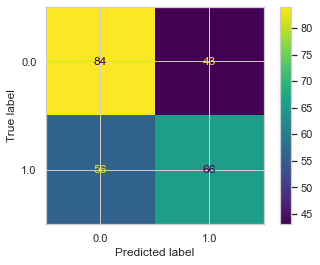

,sensitivity,specificity
0,0.661,0.541


In [226]:
##sclearn implementation
dt = DecisionTreeClassifier(random_state=RSEED)
# define parameter grid
parameters_grid = {
    'max_depth': [2,4],
    'min_samples_leaf': [2,4,6,8,15,20],
    'min_samples_split': [2, 4, 8,30],
}

# define grid search
grid_search = GridSearchCV(estimator=dt, param_grid=parameters_grid, cv=10)

# fit estimator
start_time = time.time()
grid_search.fit(trainD_x, trainD_y)
print("building classify tree ended in %s seconds" % (time.time() - start_time))
# get best estimator
best = grid_search.best_estimator_

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)
# predict
y_pred = best.predict(testD_x)

#evaluating
# calculate accuracy
acc = round(accuracy_score(testD_y, y_pred), 3)

df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'Decision Tree Classifier'}, columns={0: 'Accuracy'})
df
print(df)

#confusion_matrix
plot_confusion_matrix(grid_search, testD_x, testD_y)
plt.show()

tp, fn, fp, tn = confusion_matrix(testD_y, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

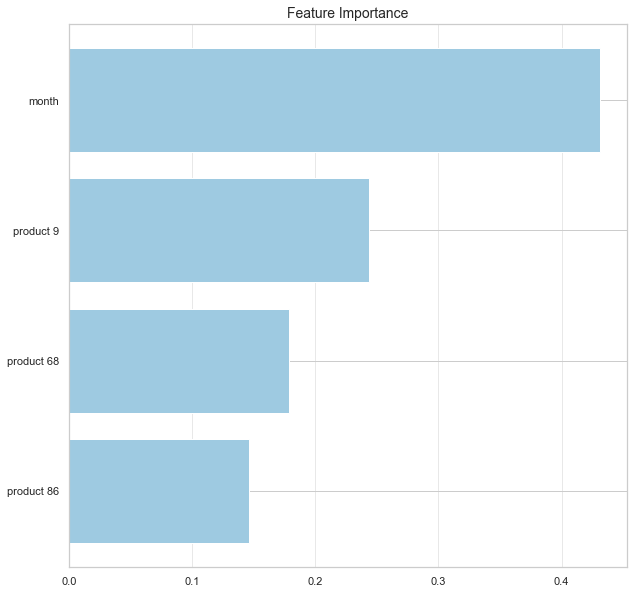

In [227]:
#get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(trainD_x, trainD_y).feature_importances_,
                   index=trainD_x.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
greater_then_0 = imp.loc[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(range(0, len(greater_then_0)), greater_then_0['Importance'], color='#9ecae1')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(greater_then_0)), greater_then_0.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

<h4>Random forest</h4>

building random forest ended in 175.6251037120819 seconds
                max_depth  min_samples_leaf  min_samples_split  n_estimators
Selected Value          5                 2                  8            50
                          Accuracy
Random Forest Classifier     0.594


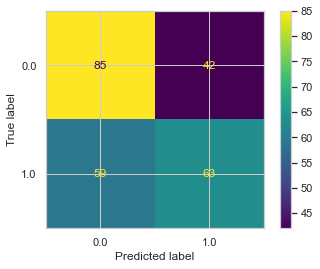

,sensitivity,specificity
0,0.669,0.516


In [228]:
# define model
rf = RandomForestClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 8,30],
    'min_samples_leaf': [2, 8, 10],
    'n_estimators': [20, 50,70,100]
}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)

# fit estimator
start_time = time.time()
grid_search.fit(trainD_x, trainD_y)
print("building random forest ended in %s seconds" % (time.time() - start_time))

# get best estimator
best = grid_search.best_estimator_

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

# predict
y_pred = best.predict(testD_x)

#Evaluate the Model
# calculate accuracy
acc = round(accuracy_score(testD_y, y_pred), 3)

df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'Random Forest Classifier'}, columns={0: 'Accuracy'})
print(df)

#confusion_matrix
plot_confusion_matrix(grid_search, testD_x, testD_y)
plt.show()

tp, fn, fp, tn = confusion_matrix(testD_y, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

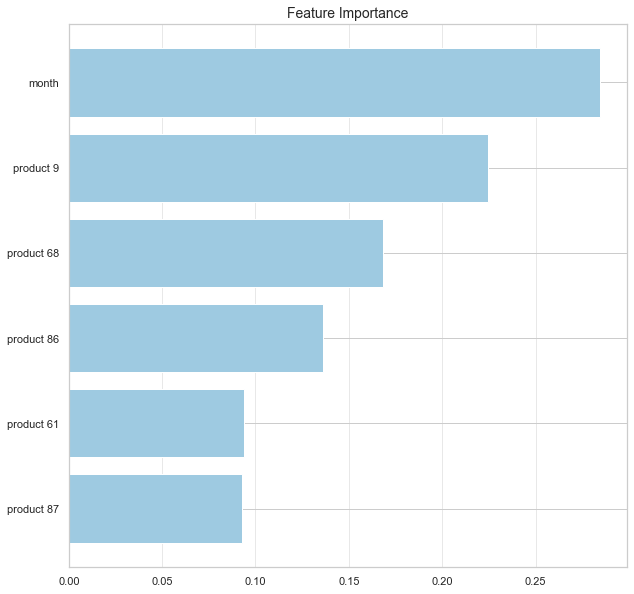

In [229]:
#get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(trainD_x, trainD_y).feature_importances_,
                   index=trainD_x.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
greater_then_0 = imp.loc[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(range(0, len(greater_then_0)), greater_then_0['Importance'], color='#9ecae1')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(greater_then_0)), greater_then_0.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

<h4>Gradiant Boost</h4>

building gradient boost ended in 10.118948936462402 seconds
                learning_rate  max_depth  n_estimators
Selected Value          0.500      2.000        50.000
                              Accuracy
Gradient Boosting Classifier     0.574


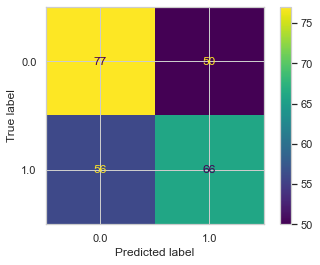

,sensitivity,specificity
0,0.606,0.541


In [230]:
# define model
gb = GradientBoostingClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'learning_rate': [0.5, 1, 1.5],
    'n_estimators': [50, 100,20],
    'max_depth':[2,3,4],
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)

#Fit the Model
# fit estimator
start_time = time.time()
grid_search.fit(trainD_x, trainD_y)
print("building gradient boost ended in %s seconds" % (time.time() - start_time))

# get best estimator
best = grid_search.best_estimator_
# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

#Predict
# predict
y_pred = best.predict(testD_x)

#Evaluate the Model
# calculate accuracy
acc = round(accuracy_score(testD_y, y_pred), 3)

df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'Gradient Boosting Classifier'}, columns={0: 'Accuracy'})
print(df)

#confusion_matrix
plot_confusion_matrix(grid_search, testD_x, testD_y)
plt.show()

tp, fn, fp, tn = confusion_matrix(testD_y, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

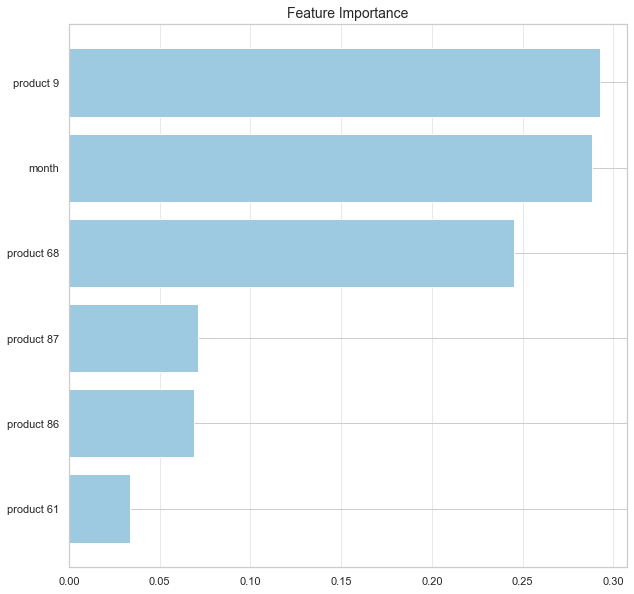

In [231]:
#get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(trainD_x, trainD_y).feature_importances_,
                   index=trainD_x.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
greater_then_0 = imp.loc[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(range(0, len(greater_then_0)), greater_then_0['Importance'], color='#9ecae1')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(greater_then_0)), greater_then_0.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

<h4>Ada Boost</h4>

building ada boost ended in 1.0731263160705566 seconds
                n_estimators
Selected Value            20
                     Accuracy
AdaBoost Classifier     0.582


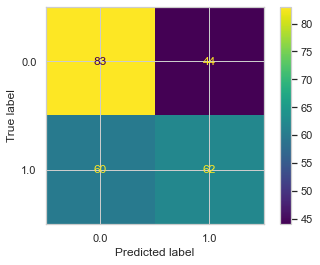

,sensitivity,specificity
0,0.654,0.508


In [232]:
from sklearn.ensemble import AdaBoostClassifier

#Define the Model
# define model
ab = AdaBoostClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_estimators': [15, 20, 50]
}

# define grid search
grid_search = GridSearchCV(estimator=ab, param_grid=parameters_grid, cv=10)

#Fit the Model
# fit estimator
start_time = time.time()
grid_search.fit(trainD_x, trainD_y)
print("building ada boost ended in %s seconds" % (time.time() - start_time))

# get best estimator
best = grid_search.best_estimator_
# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

# predict
y_pred = best.predict(testD_x)

#Evaluate the Model
# calculate accuracy
acc = round(accuracy_score(testD_y, y_pred), 3)

df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'AdaBoost Classifier'}, columns={0: 'Accuracy'})
print(df)

#confusion_matrix
plot_confusion_matrix(grid_search, testD_x, testD_y)
plt.show()

tp, fn, fp, tn = confusion_matrix(testD_y, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

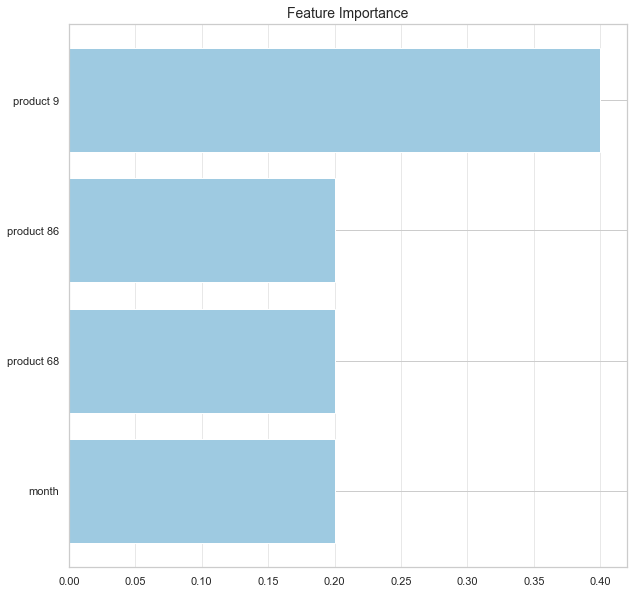

In [233]:
#get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(trainD_x, trainD_y).feature_importances_,
                   index=trainD_x.columns, columns=['Importance']).sort_values('Importance')
# plot feature importance
greater_then_0 = imp.loc[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(range(0, len(greater_then_0)), greater_then_0['Importance'], color='#9ecae1')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(greater_then_0)), greater_then_0.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

<h4>KNN</h4>

In [234]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(trainD_x)
Xtest_scaled = sc.fit_transform(testD_x)

               n_neighbors  weights
Selected Value           7  uniform
                Accuracy
KNN Classifier     0.635


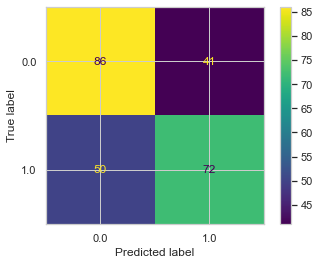

,sensitivity,specificity
0,0.677,0.590


In [235]:
knn = KNeighborsClassifier()

# define parameter grid
parameters_grid = {
    'n_neighbors': [5, 7, 10, 14, 15, 21],
    'weights': ['uniform', 'distance']
}

# define grid search
grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid, cv=10)


# fit estimator
grid_search.fit(Xtrain_scaled, trainD_y)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)


# predict
y_pred = best.predict(Xtest_scaled)


# calculate accuracy
acc = round(accuracy_score(testD_y, y_pred), 3)

df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'KNN Classifier'}, columns={0: 'Accuracy'})
print(df)

#confusion_matrix
plot_confusion_matrix(grid_search, Xtest_scaled, testD_y)
plt.show()

tp, fn, fp, tn = confusion_matrix(testD_y, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3 id="classifysummary">Models performances Summary</h3>
<p>
We tried 5 classificetion models to predict if a day was rainy or not, <br>
based on sales dataset.<br>
We evaluated them using accuracy, sensitivity and specificity metrics, As we can see at the plots above <br>
the best model is KNN<br>
</p>

<h2 id="sectionetask">Section E - Elevation Estimation</h2>
<h3>Task</h3>
<p>Estimate the elevation of each weather station based on the weather data</p>
<br>
<br>
<h3 id="formula">Barometric formula</h3>
<p>
The barometric formula, sometimes called the exponential atmosphere or isothermal atmosphere, is a formula used<br> to model how the pressure (or density) of the air changes with altitude. The pressure drops <br>approximately by 11.3 pascals per meter in first 1000 meters above sea level<br>
 <a href="https://www.mide.com/air-pressure-at-altitude-calculator">formula source</a>
</p>

<h3>The equation</h3>
<br>
<br>
 $\large P = P_b
 \left[ \dfrac{T_b +(h - h_b)L_b}{T_b} \right]  ^\dfrac{-g_0* M}{R*L_b}$
<br>
<br>
<p>
where:
<br>
<br>
$\large P_b =$ static pressure (pressure at sea level) [Pa]
<br>
<br>
$\large T_b =$ standart temperture at sea level[K] = 288.15
<br>
<br>
$\large L_b =$ standart temperture lapse rate [K/m] = -0.0065
<br>
<br>
$\large h =$ height
<br>
<br>
$\large h_b =$ height at bottom of atmospheric layer(0 at sea level)
<br>
<br>
$\large R =$ universal gas constant [N*m/mol*K] = 8.31432
<br>
<br>
$\large g_0 =$ gravitational acceleration rate constant [m/s^2] = 0.0289644
<br>
<br>
$\large M =$ molar mass of earth's air [Kg/mol] = 0.0289644
<br>
<br>
</p>
<p>if we isolate the height that we want to calculate we get:</p>
<br>
<br>
$\large h = h_b + \dfrac{T_b}{L_b} *
 \left[
 \left( \dfrac{P}{P_b} \right) ^\dfrac{-RL_b}{g_0*M} - 1 \right] $
<br>
<br>
<h3 id="IOMformula">Inches of Mercury to Pascals formula</h3>
<p><a href="https://www.metric-conversions.org/pressure/inches-of-mercury-to-pascals.htm">convert formula source</a></p>
<br>
<br>
$\large Pa = \dfrac{inHg}{0.00029530}$

In [236]:
imputed_e_df

,station_nbr,date,stnpressure,sealevel
0,1,2012-01-01,29.780,29.920
4884,1,2012-01-02,29.440,29.620
9768,1,2012-01-03,29.670,29.870
14652,1,2012-01-04,29.860,30.030
19536,1,2012-01-05,29.670,29.840
...,...,...,...,...
4597509,20,2014-10-27,29.110,29.820
4602504,20,2014-10-28,29.300,29.970
4607499,20,2014-10-29,29.420,30.120
4612494,20,2014-10-30,29.400,30.110


<h3 id="consts">Consts</h3>

In [237]:
#standart temperature lapse rate[K/m]
L_b = -0.0065
#universal gas constant[N*m/mol*K]
R = 8.31432
#gravitational acceleration rate constant[m/s^2]
G = 9.80665
#molar mass of earth's air[Kg/mol]
M = 0.0289644
#height at bottom of atmospheric layer(0 at sea level)
h_b = 0
#standart temperature at sea level[K]
T_b = 288.15

<h3 id="calcelevation">Elevation calculating</h3>

In [238]:
#convert Inches of Mercury to Pascals
def convert_iom_to_pasc(avg_pressure):

    return avg_pressure/0.00029530

In [239]:
#calculate the elevation of station based on the barometric formula
def calc_elevation(avg_stn_pressure, avg_see_level_pressure):

    #tb_lb = convert_temp(32)/L_b
    tb_lb = T_b/L_b
    p_pb = convert_iom_to_pasc(avg_stn_pressure)/convert_iom_to_pasc(avg_see_level_pressure)
    exponant = (-R*L_b)/(G*M)

    return h_b + tb_lb *(p_pb**exponant - 1)

In [240]:
#station ids
station_list = np.unique(imputed_e_df['station_nbr'].values)
#creating dict for station ids and their heights
station_height_dict = dict()
station_height_dict['station_nbr'] = list()
station_height_dict['elevation of station'] = list()
#calc height for each station
for station_id in station_list:
    #df of certain station
    station_df = imputed_e_df.loc[imputed_e_df['station_nbr'] == station_id]
    #avg station pressure of certain station
    avg_stn_pressure = station_df['stnpressure'].values.mean()
    #avg sea level pressure
    avg_see_level_pressure = station_df['sealevel'].values.mean()
    #station height
    station_height = calc_elevation(avg_stn_pressure, avg_see_level_pressure)
    #adding to dict
    station_height_dict['station_nbr'].append(station_id)
    station_height_dict['elevation of station'].append(station_height)

In [241]:
#creating df
station_height_df = pd.DataFrame.from_dict(station_height_dict)

<h3 id="visualizeresult">Visualize result</h3>

In [242]:
#printing the df
station_height_df

,station_nbr,elevation of station
0,1,47.144
1,2,314.451
2,3,204.052
3,4,194.946
4,6,147.830
5,7,391.098
6,8,112.080
7,9,220.931
8,10,7.367
9,11,15.564


No handles with labels found to put in legend.


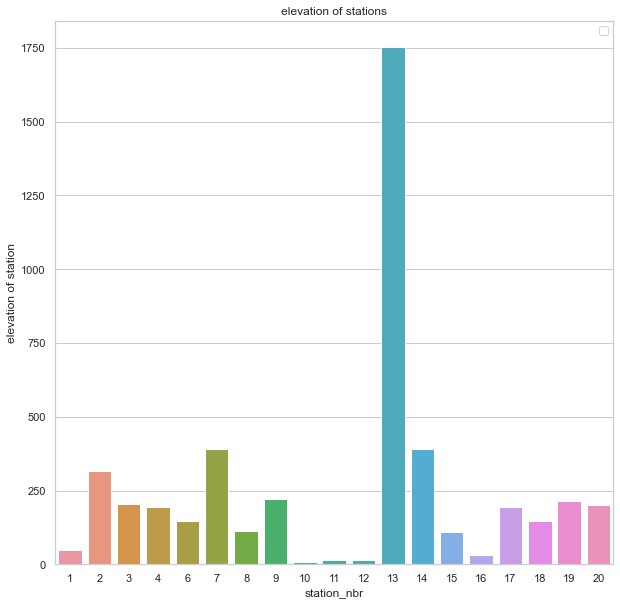

In [243]:
plt.figure(figsize=(10, 10))
sales = pd.concat([df_sales_2012,df_sales_2013,df_sales_2014])
sales_plot = sns.barplot(x="station_nbr", y="elevation of station",data=station_height_df).set(title='elevation of stations')
plt.legend(loc='upper right')

<p>As we assumed before the elavation of station 13 is drasticly higher then the others.<br>
<strong>Note:we removed station 5, becaues as we saw before more than 96% of its sample have<br>
at least 50% nulls in the columns, so an imputation in this case wont be precise.</strong></p>

<h2 id="#sectionFtask">Section F - Clustering the weather stations</h2>
<h3>Task</h3>
<p>
Apply a clustering algorithm on the weather data to cluster the weather <br>
stations. We will try to identify similarities inside the clusters or differences between<br>
them. Then we will discuss our findings and demonstrate visually what<br>
similarities the clusters may have.
</p>

In [244]:
# Mean Shift
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

In [245]:
clusters = imputed_f_df_scaled
clusters

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,station_nbr
0,-0.989,-1.026,-1.014,0.711,-0.595,-0.811,0.974,-0.763,0.518,-1.305,-0.112,-0.151,0.495,-0.474,-0.673,0.139,-0.841,1
1,-1.190,-0.921,-1.066,2.273,-0.543,-0.870,1.047,-0.763,1.592,-2.345,-0.112,-0.093,-0.276,-0.528,0.650,0.450,0.865,2
2,-0.838,-0.869,-0.857,1.212,-1.215,-1.045,0.756,-0.763,1.840,-1.224,-0.112,-0.296,0.487,2.478,0.842,1.279,0.534,3
3,-0.435,-0.190,-0.334,0.454,-1.008,-0.635,0.029,-0.763,1.749,-0.962,-0.112,-0.296,0.503,2.532,0.385,1.694,0.075,4
4,-0.435,-0.869,-0.648,-0.152,-0.853,-0.635,0.465,-0.763,1.736,-0.962,-0.112,-0.296,0.631,2.478,1.828,1.798,1.501,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,-0.938,-0.869,-0.909,-0.788,-0.647,-0.752,0.829,-0.763,-0.199,0.139,-0.112,-0.296,0.591,-0.099,-0.457,-1.624,-0.663,16
20513,-0.636,-0.869,-0.752,-0.429,-0.802,-0.752,0.611,-0.763,0.675,0.018,-0.112,-0.296,0.447,2.048,0.674,-1.831,0.355,17
20514,-0.233,-0.086,-0.177,-0.759,-0.388,-0.225,-0.189,-0.763,0.653,-1.010,-0.112,-0.296,0.495,1.458,1.011,1.798,0.839,18
20515,-1.341,-0.921,-1.171,-1.062,-1.215,-1.280,1.192,-0.763,0.392,-2.106,0.103,-0.238,0.278,1.243,3.368,1.590,3.309,19


In [246]:
clusters.isnull().sum()

tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
station_nbr    0
dtype: int64

In [247]:
clusters

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,station_nbr
0,-0.989,-1.026,-1.014,0.711,-0.595,-0.811,0.974,-0.763,0.518,-1.305,-0.112,-0.151,0.495,-0.474,-0.673,0.139,-0.841,1
1,-1.190,-0.921,-1.066,2.273,-0.543,-0.870,1.047,-0.763,1.592,-2.345,-0.112,-0.093,-0.276,-0.528,0.650,0.450,0.865,2
2,-0.838,-0.869,-0.857,1.212,-1.215,-1.045,0.756,-0.763,1.840,-1.224,-0.112,-0.296,0.487,2.478,0.842,1.279,0.534,3
3,-0.435,-0.190,-0.334,0.454,-1.008,-0.635,0.029,-0.763,1.749,-0.962,-0.112,-0.296,0.503,2.532,0.385,1.694,0.075,4
4,-0.435,-0.869,-0.648,-0.152,-0.853,-0.635,0.465,-0.763,1.736,-0.962,-0.112,-0.296,0.631,2.478,1.828,1.798,1.501,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,-0.938,-0.869,-0.909,-0.788,-0.647,-0.752,0.829,-0.763,-0.199,0.139,-0.112,-0.296,0.591,-0.099,-0.457,-1.624,-0.663,16
20513,-0.636,-0.869,-0.752,-0.429,-0.802,-0.752,0.611,-0.763,0.675,0.018,-0.112,-0.296,0.447,2.048,0.674,-1.831,0.355,17
20514,-0.233,-0.086,-0.177,-0.759,-0.388,-0.225,-0.189,-0.763,0.653,-1.010,-0.112,-0.296,0.495,1.458,1.011,1.798,0.839,18
20515,-1.341,-0.921,-1.171,-1.062,-1.215,-1.280,1.192,-0.763,0.392,-2.106,0.103,-0.238,0.278,1.243,3.368,1.590,3.309,19


<h3 id="pca">PCA</h3>
<p>
The data we want to display consists of 17 features, ie it is represented in 17 dimensions.<br>
In order to make data virtualization we must reduce the dimensions to a maximum of 3.<br>

We chose to perform a PCA in order to lower the dimensions.<br>
We will select the 3 PCs that take up most of the overall variance of the data.<br>
Our goal is to represent the data in 3 dimensions and see how it is divided into clusters.</p>

In [248]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(clusters)

PCA()

In [249]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[6.62777680e+01 1.55571962e+01 4.26431834e+00 2.34135040e+00
 2.25214952e+00 2.14402905e+00 1.87820182e+00 1.74123086e+00
 1.15041849e+00 9.59276202e-01 7.20144608e-01 3.28577732e-01
 1.71528211e-01 1.27410885e-01 7.99351323e-02 5.25858239e-03
 1.20591638e-03 2.41072700e-32]



In [250]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 66.27776803  81.83496424  86.09928259  88.44063299  90.69278251
  92.83681156  94.71501338  96.45624424  97.60666273  98.56593893
  99.28608354  99.61466127  99.78618948  99.91360037  99.9935355
  99.99879408 100.         100.        ]



Text(0, 0.5, 'Explained variance (%)')

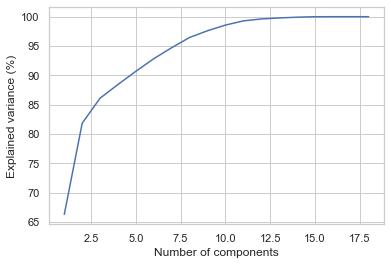

In [251]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[66.27776803 81.83496424]
Number of components: 2


Text(0, 0.5, 'Explained variance (%)')

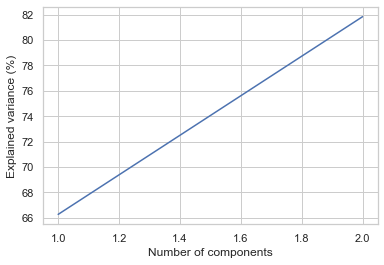

In [252]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(clusters)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


In [253]:
pca_components = abs(pca.components_)
print(pca_components)

[[1.05006745e-03 3.35896749e-03 2.18484767e-03 5.40205965e-05
  5.40661079e-03 4.27678394e-03 2.81646980e-03 3.84147424e-04
  6.66031847e-03 1.56025151e-03 1.32837501e-03 1.47412821e-03
  1.13304828e-02 6.21583903e-04 9.73026611e-04 4.93125033e-03
  9.21003688e-04 9.99860803e-01]
 [3.43500631e-01 3.49213609e-01 3.53186784e-01 1.72162709e-01
  3.39594275e-01 3.51893415e-01 3.30982013e-01 2.80455756e-01
  2.22320104e-01 2.96428004e-01 8.46568516e-02 3.38392205e-02
  4.35178181e-02 1.40260157e-01 3.62519669e-02 9.07676096e-02
  3.96195262e-02 4.63137763e-03]]


In [254]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]

    # print the top 4 feature names
    print(f'Component {row}: {clusters.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['station_nbr', 'stnpressure', 'sunrise', 'dewpoint']
Component 1: ['tavg', 'wetbulb', 'tmin', 'tmax']


We performed a PCA algorithm and saw that PC1 captures the most varience compare to all other PCs.
Let's take a look at the 4 most important features in the creation of PC1, and they are: 'tavg', 'wetbulb', 'tmin', 'tmax'.
We will now perform a clustering algorithm on the data and present the results in a two-dimensional graph
where the features describing the axis will be any pair out of 4 in the above features.

Let's stating with dropping the other features beside station number:

In [255]:
clusters = clusters[['tavg', 'wetbulb', 'tmin', 'tmax', 'station_nbr']]
clusters

,tavg,wetbulb,tmin,tmax,station_nbr
0,-1.014,-0.811,-1.026,-0.989,1
1,-1.066,-0.870,-0.921,-1.190,2
2,-0.857,-1.045,-0.869,-0.838,3
3,-0.334,-0.635,-0.190,-0.435,4
4,-0.648,-0.635,-0.869,-0.435,6
...,...,...,...,...,...
20512,-0.909,-0.752,-0.869,-0.938,16
20513,-0.752,-0.752,-0.869,-0.636,17
20514,-0.177,-0.225,-0.086,-0.233,18
20515,-1.171,-1.280,-0.921,-1.341,19


We will now group the data by station number
We chose to group our data for each station. The values of the features for each station will be the average value of all observations for that feature.


In [256]:
section_f_groupedby_station = clusters.groupby(['station_nbr'])
section_f_df_after_arrange = pd.DataFrame()
for key,item in section_f_groupedby_station:
    if key != 5:
        weather_per_station = section_f_groupedby_station.get_group(key)
        for f in weather_per_station.columns:
            if f != 'station_nbr': weather_per_station[f] = weather_per_station[f].mean()
        section_f_df_after_arrange = section_f_df_after_arrange.append(weather_per_station.iloc[0:1,:])

print(section_f_df_after_arrange)

section_f_df_after_arrange_for_clustering = section_f_df_after_arrange.iloc[:,0:4]
stations = section_f_df_after_arrange.iloc[:,4:5]

     tavg  wetbulb   tmin   tmax station_nbr
0  -0.475   -0.450 -0.421 -0.510           1
1  -0.599   -0.544 -0.477 -0.695           2
2   0.068    0.050  0.027  0.103           3
3   0.526    0.455  0.492  0.538           4
4   0.414    0.446  0.302  0.508           6
5   0.101    0.021  0.075  0.123           7
6   0.511    0.571  0.509  0.505           8
7  -0.710   -0.669 -0.640 -0.749           9
8   0.616    0.654  0.729  0.481          10
9   0.435    0.569  0.434  0.419          11
10  0.523    0.624  0.582  0.443          12
11 -0.502   -0.760 -0.670 -0.321          13
12  0.086    0.017  0.029  0.133          14
13 -0.691   -0.607 -0.748 -0.609          15
14 -0.539   -0.457 -0.484 -0.570          16
15  0.064    0.039 -0.024  0.147          17
16  0.423    0.311  0.434  0.395          18
17 -0.634   -0.569 -0.512 -0.728          19
18  0.391    0.307  0.370  0.395          20


<h3 id="clustersmodels">Checking different Clustering models</h3>

<h4>K-Means</h4>

To select the best value of K for our dataset, we first define a function to create an elbow plot.

In [257]:
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist


def elbow_met(df):

    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df)
        kmeanModel.fit(df)
        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()


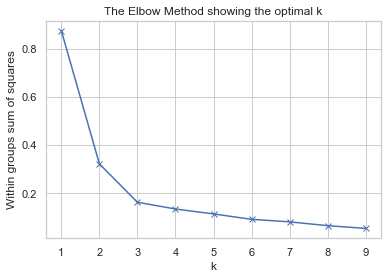

In [258]:
kmeans_df = pd.DataFrame(section_f_df_after_arrange_for_clustering)
elbow_met(kmeans_df)

We select K = 2 and fit the model

In [259]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(kmeans_df)

We can print the clusters' centroids:

In [260]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.07942022  0.03198844  0.0269331   0.12657317]
 [-0.59271256 -0.57944483 -0.56446941 -0.59740844]
 [ 0.47995906  0.49201645  0.48148475  0.46050087]]


In [261]:
labels = kmeans.predict(kmeans_df)
kmeans_df['cluster'] = labels
kmeans_df

,tavg,wetbulb,tmin,tmax,cluster
0,-0.475,-0.450,-0.421,-0.510,1
1,-0.599,-0.544,-0.477,-0.695,1
2,0.068,0.050,0.027,0.103,0
3,0.526,0.455,0.492,0.538,2
4,0.414,0.446,0.302,0.508,2
5,0.101,0.021,0.075,0.123,0
6,0.511,0.571,0.509,0.505,2
7,-0.710,-0.669,-0.640,-0.749,1
8,0.616,0.654,0.729,0.481,2
9,0.435,0.569,0.434,0.419,2


In [262]:
section_f_df_view = pd.concat([stations, kmeans_df], axis = 1)
section_f_df_view

,station_nbr,tavg,wetbulb,tmin,tmax,cluster
0,1,-0.475,-0.450,-0.421,-0.510,1
1,2,-0.599,-0.544,-0.477,-0.695,1
2,3,0.068,0.050,0.027,0.103,0
3,4,0.526,0.455,0.492,0.538,2
4,6,0.414,0.446,0.302,0.508,2
5,7,0.101,0.021,0.075,0.123,0
6,8,0.511,0.571,0.509,0.505,2
7,9,-0.710,-0.669,-0.640,-0.749,1
8,10,0.616,0.654,0.729,0.481,2
9,11,0.435,0.569,0.434,0.419,2


<Figure size 720x720 with 0 Axes>

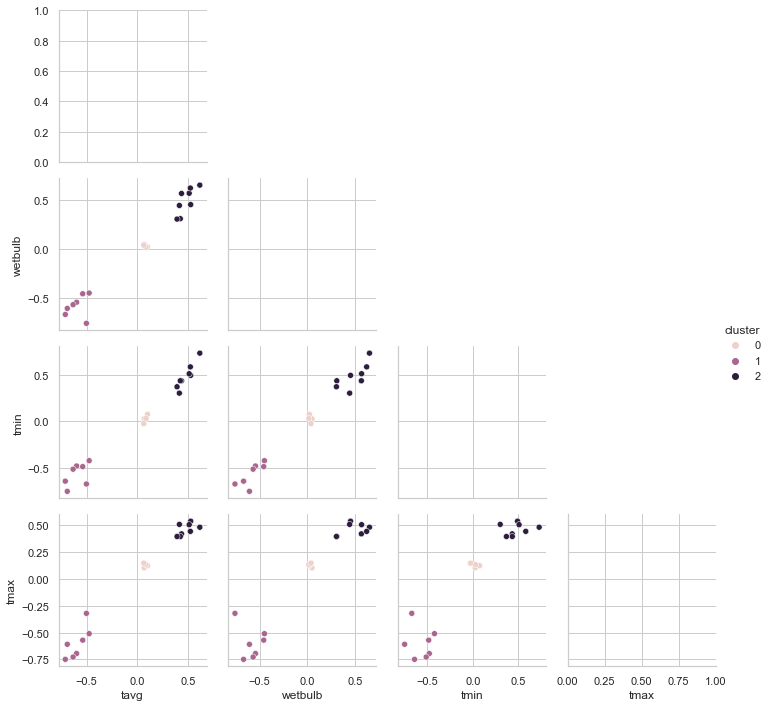

In [263]:
plt.figure(figsize=(10, 10))
g = sns.PairGrid(section_f_df_view.iloc[:,1:], hue="cluster",corner=True)
g.map_offdiag(sns.scatterplot)
g.add_legend()

We see that the stations are divided into 3 clusters in a more or less similar way.
Selected to display the graph described by the following features: tmin, tmax

Text(0, 0.5, 'tmax')

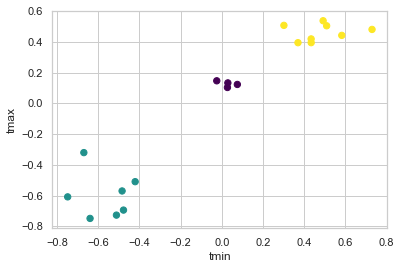

In [264]:
plt.scatter(section_f_df_view.to_numpy()[:, 3], section_f_df_view.to_numpy()[:, 4], c=labels, s=40, cmap='viridis');
plt.xlabel('tmin')
plt.ylabel('tmax')

In [265]:
print('Partiotion to clusters by Kmeans Algorithm: ')
print('Cluster 0 stations are:  ', section_f_df_view.loc[section_f_df_view['cluster']==0]['station_nbr'].to_numpy() )
print('Cluster 1 stations are:  ', section_f_df_view.loc[section_f_df_view['cluster']==1]['station_nbr'].to_numpy()  )
print('Cluster 2 stations are:  ', section_f_df_view.loc[section_f_df_view['cluster']==2]['station_nbr'].to_numpy() )

Partiotion to clusters by Kmeans Algorithm: 
Cluster 0 stations are:   [ 3  7 14 17]
Cluster 1 stations are:   [ 1  2  9 13 15 16 19]
Cluster 2 stations are:   [ 4  6  8 10 11 12 18 20]


<h3>GMM</h3>
<p>We use the same data to fit a GMM model.</p>

In [266]:
from sklearn.mixture import GaussianMixture

GMM_df = pd.DataFrame(section_f_df_after_arrange_for_clustering)
gmm = GaussianMixture(n_components=3, random_state=42).fit(GMM_df)
labels = gmm.predict(GMM_df)

In [267]:
GMM_df['cluster'] = labels
GMM_df['station_nbr'] = stations
GMM_df

,tavg,wetbulb,tmin,tmax,cluster,station_nbr
0,-0.475,-0.450,-0.421,-0.510,1,1
1,-0.599,-0.544,-0.477,-0.695,1,2
2,0.068,0.050,0.027,0.103,2,3
3,0.526,0.455,0.492,0.538,0,4
4,0.414,0.446,0.302,0.508,0,6
5,0.101,0.021,0.075,0.123,2,7
6,0.511,0.571,0.509,0.505,0,8
7,-0.710,-0.669,-0.640,-0.749,1,9
8,0.616,0.654,0.729,0.481,0,10
9,0.435,0.569,0.434,0.419,0,11


<Figure size 720x720 with 0 Axes>

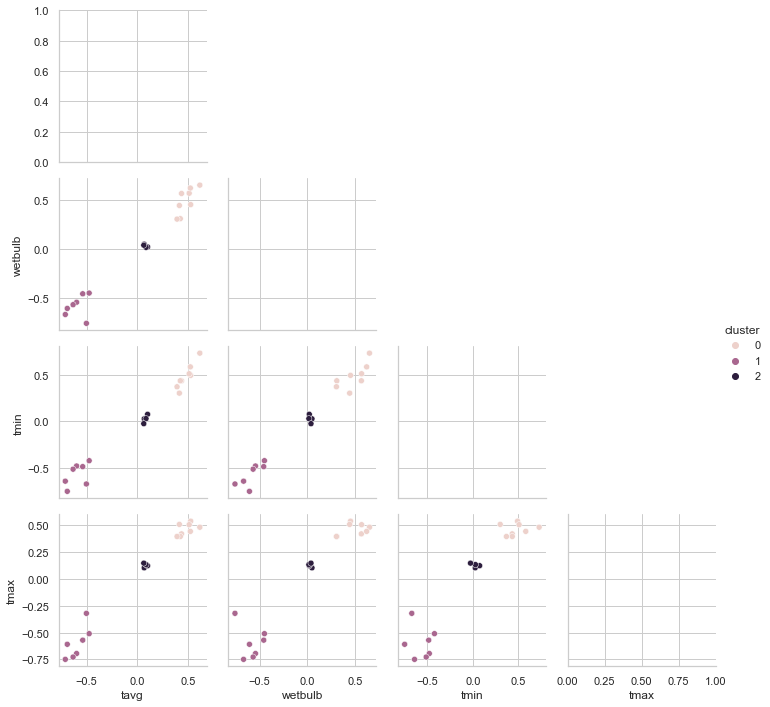

In [268]:
plt.figure(figsize=(10, 10))
g = sns.PairGrid(GMM_df.iloc[:,:5], hue="cluster",corner=True)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Text(0, 0.5, 'tmax')

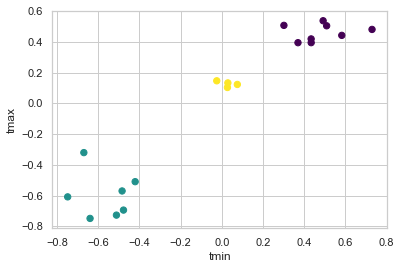

In [269]:
plt.scatter(GMM_df.to_numpy()[:, 2], GMM_df.to_numpy()[:, 3], c=labels, s=40, cmap='viridis');
plt.xlabel('tmin')
plt.ylabel('tmax')

In [270]:
print('Partiotion to clusters by GMM Algorithm: ')
print('Cluster 0 stations are:  ', GMM_df.loc[GMM_df['cluster']==0]['station_nbr'].to_numpy() )
print('Cluster 1 stations are:  ', GMM_df.loc[GMM_df['cluster']==1]['station_nbr'].to_numpy()  )
print('Cluster 2 stations are:  ', GMM_df.loc[GMM_df['cluster']==2]['station_nbr'].to_numpy() )

Partiotion to clusters by GMM Algorithm: 
Cluster 0 stations are:   [ 4  6  8 10 11 12 18 20]
Cluster 1 stations are:   [ 1  2  9 13 15 16 19]
Cluster 2 stations are:   [ 3  7 14 17]


<h3 id="clusterssummary">Summary</h3>
We identified that the stations could be divided into 3 clusters
according to the four most dominant features we found by running a PCA algorithm.